<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Epitope-edit-distance-for-normal-vs-decoy-data" data-toc-modified-id="Epitope-edit-distance-for-normal-vs-decoy-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Epitope edit distance for normal vs decoy data</a></span><ul class="toc-item"><li><span><a href="#Interaction-map-shuffled-negatives" data-toc-modified-id="Interaction-map-shuffled-negatives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interaction map shuffled negatives</a></span><ul class="toc-item"><li><span><a href="#Interaction-map-shuffled-negatives-strong-down" data-toc-modified-id="Interaction-map-shuffled-negatives-strong-down-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Interaction map shuffled negatives strong down</a></span></li></ul></li><li><span><a href="#Dual-input-shuffled-negatives" data-toc-modified-id="Dual-input-shuffled-negatives-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dual input shuffled negatives</a></span><ul class="toc-item"><li><span><a href="#Dual-input-shuffled-negatives-strong-down" data-toc-modified-id="Dual-input-shuffled-negatives-strong-down-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dual input shuffled negatives strong down</a></span></li></ul></li><li><span><a href="#Interaction-map-reference-negatives" data-toc-modified-id="Interaction-map-reference-negatives-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Interaction map reference negatives</a></span></li><li><span><a href="#Dual-input-reference-negatives" data-toc-modified-id="Dual-input-reference-negatives-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Dual input reference negatives</a></span></li></ul></li><li><span><a href="#Negative-data-types-for-normal-versus-decoy-data" data-toc-modified-id="Negative-data-types-for-normal-versus-decoy-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Negative data types for normal versus decoy data</a></span><ul class="toc-item"><li><span><a href="#Interaction-map---moderate-down" data-toc-modified-id="Interaction-map---moderate-down-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Interaction map - moderate down</a></span></li><li><span><a href="#Dual-input---moderate-down" data-toc-modified-id="Dual-input---moderate-down-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dual input - moderate down</a></span></li><li><span><a href="#Interaction-map---strong-down" data-toc-modified-id="Interaction-map---strong-down-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Interaction map - strong down</a></span></li><li><span><a href="#Dual-input---strong-down" data-toc-modified-id="Dual-input---strong-down-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dual input - strong down</a></span></li><li><span><a href="#Interaction-map---kfold" data-toc-modified-id="Interaction-map---kfold-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Interaction map - kfold</a></span></li></ul></li><li><span><a href="#TRA-TRB-comparisons" data-toc-modified-id="TRA-TRB-comparisons-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TRA TRB comparisons</a></span><ul class="toc-item"><li><span><a href="#Epitope-grouped" data-toc-modified-id="Epitope-grouped-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Epitope-grouped</a></span></li><li><span><a href="#Known-epitope" data-toc-modified-id="Known-epitope-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Known-epitope</a></span></li></ul></li><li><span><a href="#COVID-data" data-toc-modified-id="COVID-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>COVID data</a></span></li><li><span><a href="#Downsampling-comparisons" data-toc-modified-id="Downsampling-comparisons-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Downsampling comparisons</a></span><ul class="toc-item"><li><span><a href="#Epitope-grouped" data-toc-modified-id="Epitope-grouped-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Epitope-grouped</a></span></li><li><span><a href="#k-fold" data-toc-modified-id="k-fold-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>k-fold</a></span></li></ul></li><li><span><a href="#Position-perturbation" data-toc-modified-id="Position-perturbation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Position perturbation</a></span><ul class="toc-item"><li><span><a href="#Full-model---training-example" data-toc-modified-id="Full-model---training-example-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Full model - training example</a></span></li></ul></li></ul></div>

# Imports

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import scipy

from src.scripts.evaluate.visualize import predict_variations
from src.config import PROJECT_ROOT

In [2]:
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from pathlib import Path

from src.config import PROJECT_ROOT
from src.scripts.preprocessing import preprocess_vdjdb

In [3]:
plt.rcParams.update({"font.size": 14})  # 20})
# plt.rcParams["title_fontsize"] = 10
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Source Sans Pro"  # ['Fira Sans', 'Source Sans Pro']
font = {"weight": "normal"}  # ,'size'   : 22}

# Epitope edit distance for normal vs decoy data

## Interaction map shuffled negatives

In [4]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shuffle-map-decoy"
decoy_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - shuffled negatives - decoy/2020-07-14_17-25-59_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - shuffled negatives/2020-07-14_17-07-02_evaluate_test_folds/metrics_per_epitope.csv")

Text(0.5, 1.0, 'r=-0.267701, p=0.027311')

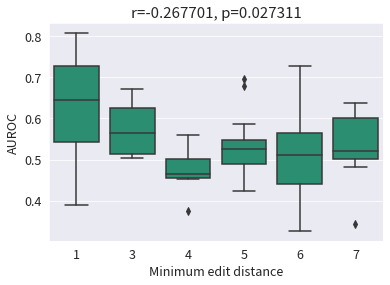

In [5]:
eval_df = normal_metrics
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

g = sns.boxplot(
    y="roc_auc", x="min_dist", data=eval_df, color=sns.color_palette("Dark2")[0],
)
# sns.swarmplot(y="roc_auc", x="min_dist", data=eval_df, color=".25")
g.set_xlabel("Minimum edit distance")
g.set_ylabel("AUROC")

r, p = scipy.stats.spearmanr(eval_df["roc_auc"], eval_df["min_dist"])
# annot_kws = {"prop": {"family": "monospace", "weight": "bold", "size": 15}}
# phantom = g.plot([], [], linestyle="", alpha=0)
# g.legend([phantom], ["r={:f}, p={:f}".format(r, p)], **annot_kws)
g.set_title("r={:f}, p={:f}".format(r, p))

In [6]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

Text(0.5, 1.0, 'r=0.173121, p=0.042299')

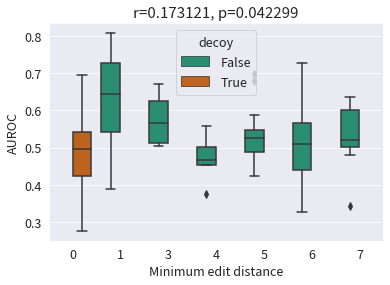

In [7]:
eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

g = sns.boxplot(
    y="roc_auc", x="min_dist", data=eval_df, hue="decoy", palette=sns.color_palette("Dark2"),
)
# sns.swarmplot(y="roc_auc", x="min_dist", data=eval_df, color=".25")
g.set_xlabel("Minimum edit distance")
g.set_ylabel("AUROC")

r, p = scipy.stats.spearmanr(eval_df["roc_auc"], eval_df["min_dist"])
# annot_kws = {"prop": {"family": "monospace", "weight": "bold", "size": 15}}
# phantom = g.plot([], [], linestyle="", alpha=0)
# g.legend([phantom], ["r={:f}, p={:f}".format(r, p)], **annot_kws)
g.set_title("r={:f}, p={:f}".format(r, p))

/home/pieter/miniconda3/envs/deepTCR/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


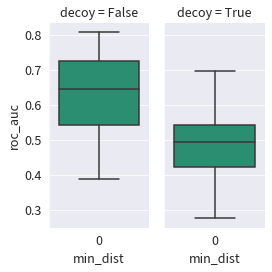

In [8]:
g = sns.FacetGrid(eval_df, col="decoy", height=4, aspect=.5)
g.map(sns.boxplot, "min_dist", "roc_auc");

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


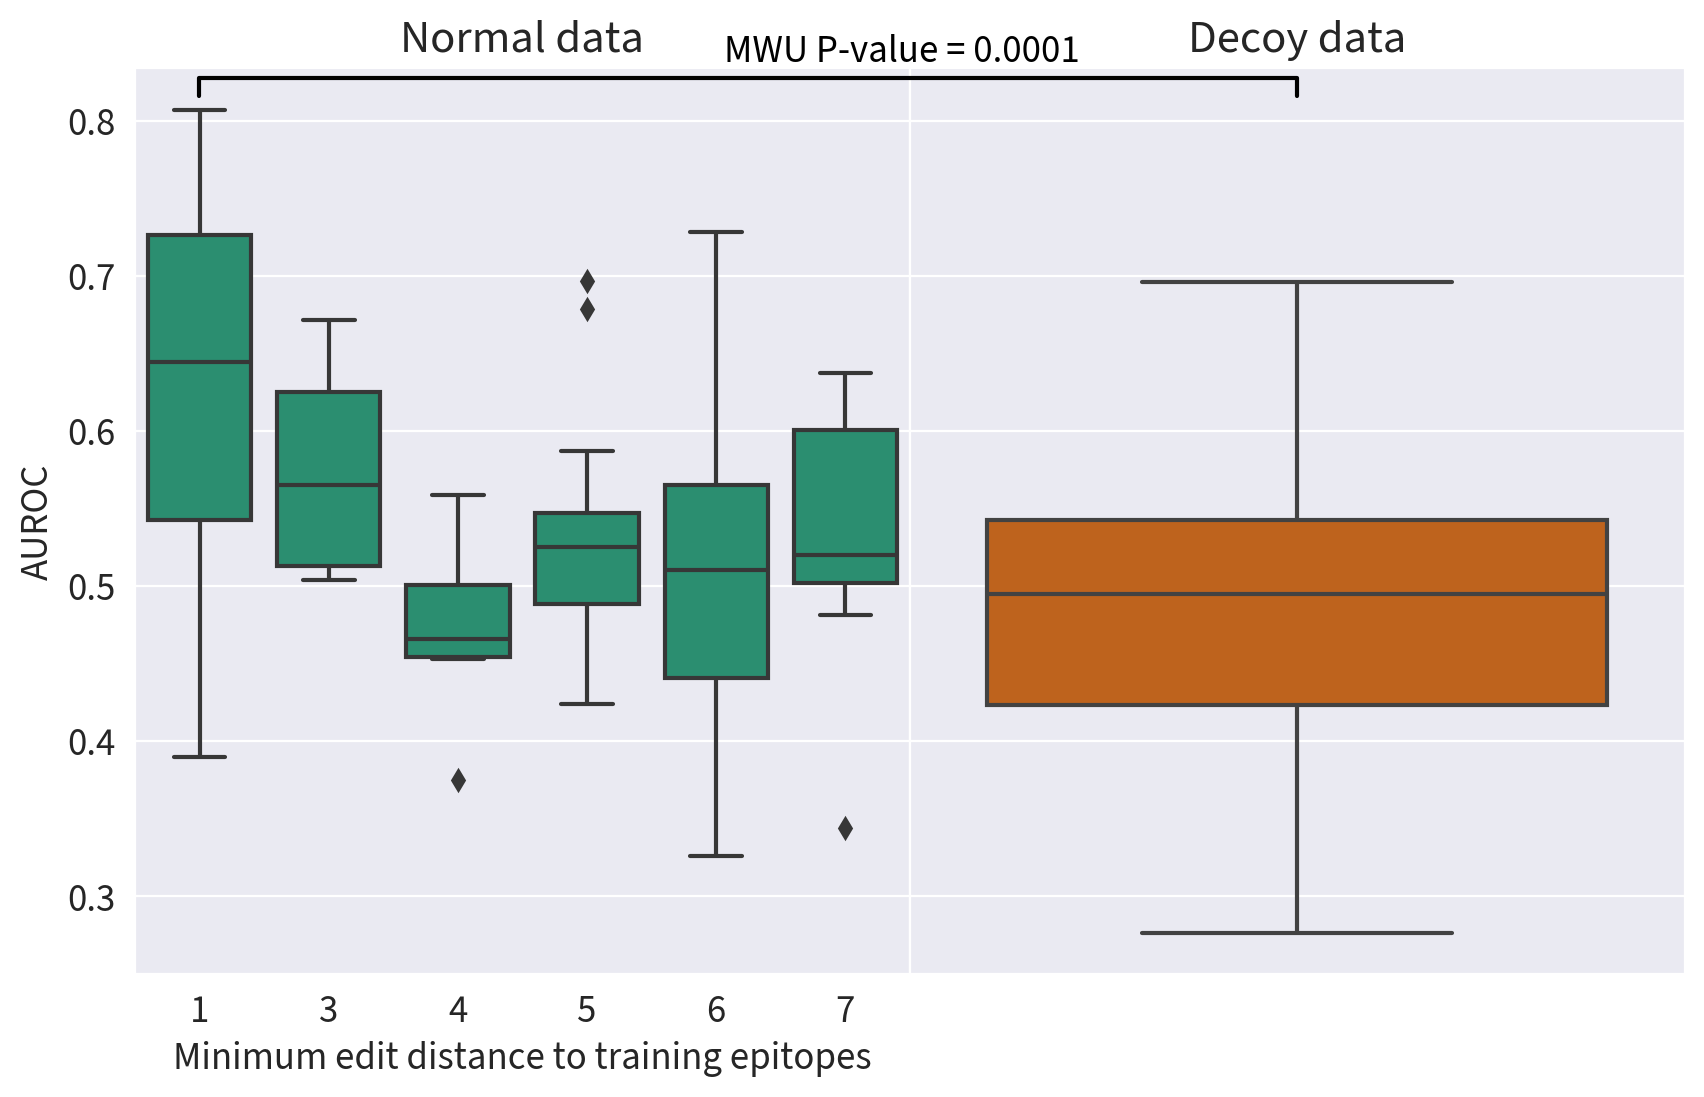

In [9]:
fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .05, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = [line,]

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.18, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

####

# # statistical annotation
# y, h, col = eval_df.loc[eval_df["decoy"]==True, "roc_auc"].max() + .06, .015, 'k'
# # y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# # ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# # ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

# x1, x2 = 0.222, .706
# line2 = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
# fig.lines.append(line2)

# m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 3), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

# plt.text(-x1-x2/2, x2*1.07, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-map-decoy-min-dist-aurroc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-map-decoy-min-dist-aurroc-boxplot.png", bbox_inches="tight")

In [10]:
scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 3), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

MannwhitneyuResult(statistic=74.0, pvalue=0.016396977036589204)

In [11]:
eval_df[eval_df["decoy"]==False].groupby("min_dist").roc_auc.mean()

min_dist
1    0.631184
3    0.575899
4    0.471459
5    0.532245
6    0.513256
7    0.527176
Name: roc_auc, dtype: float64

In [12]:
eval_df[eval_df["decoy"]==True].groupby("min_dist").roc_auc.mean()

min_dist
0    0.485073
Name: roc_auc, dtype: float64

### Interaction map shuffled negatives strong down

In [13]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shuffle-map-decoy-strongdown"
decoy_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - shuffled negatives - decoy/2020-07-23_16-44-50_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - shuffled negatives/2020-07-23_16-43-16_evaluate_test_folds/metrics_per_epitope.csv")

In [14]:
eval_df.loc[eval_df["decoy"]==True, "roc_auc"].max()

0.6964285373687744

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


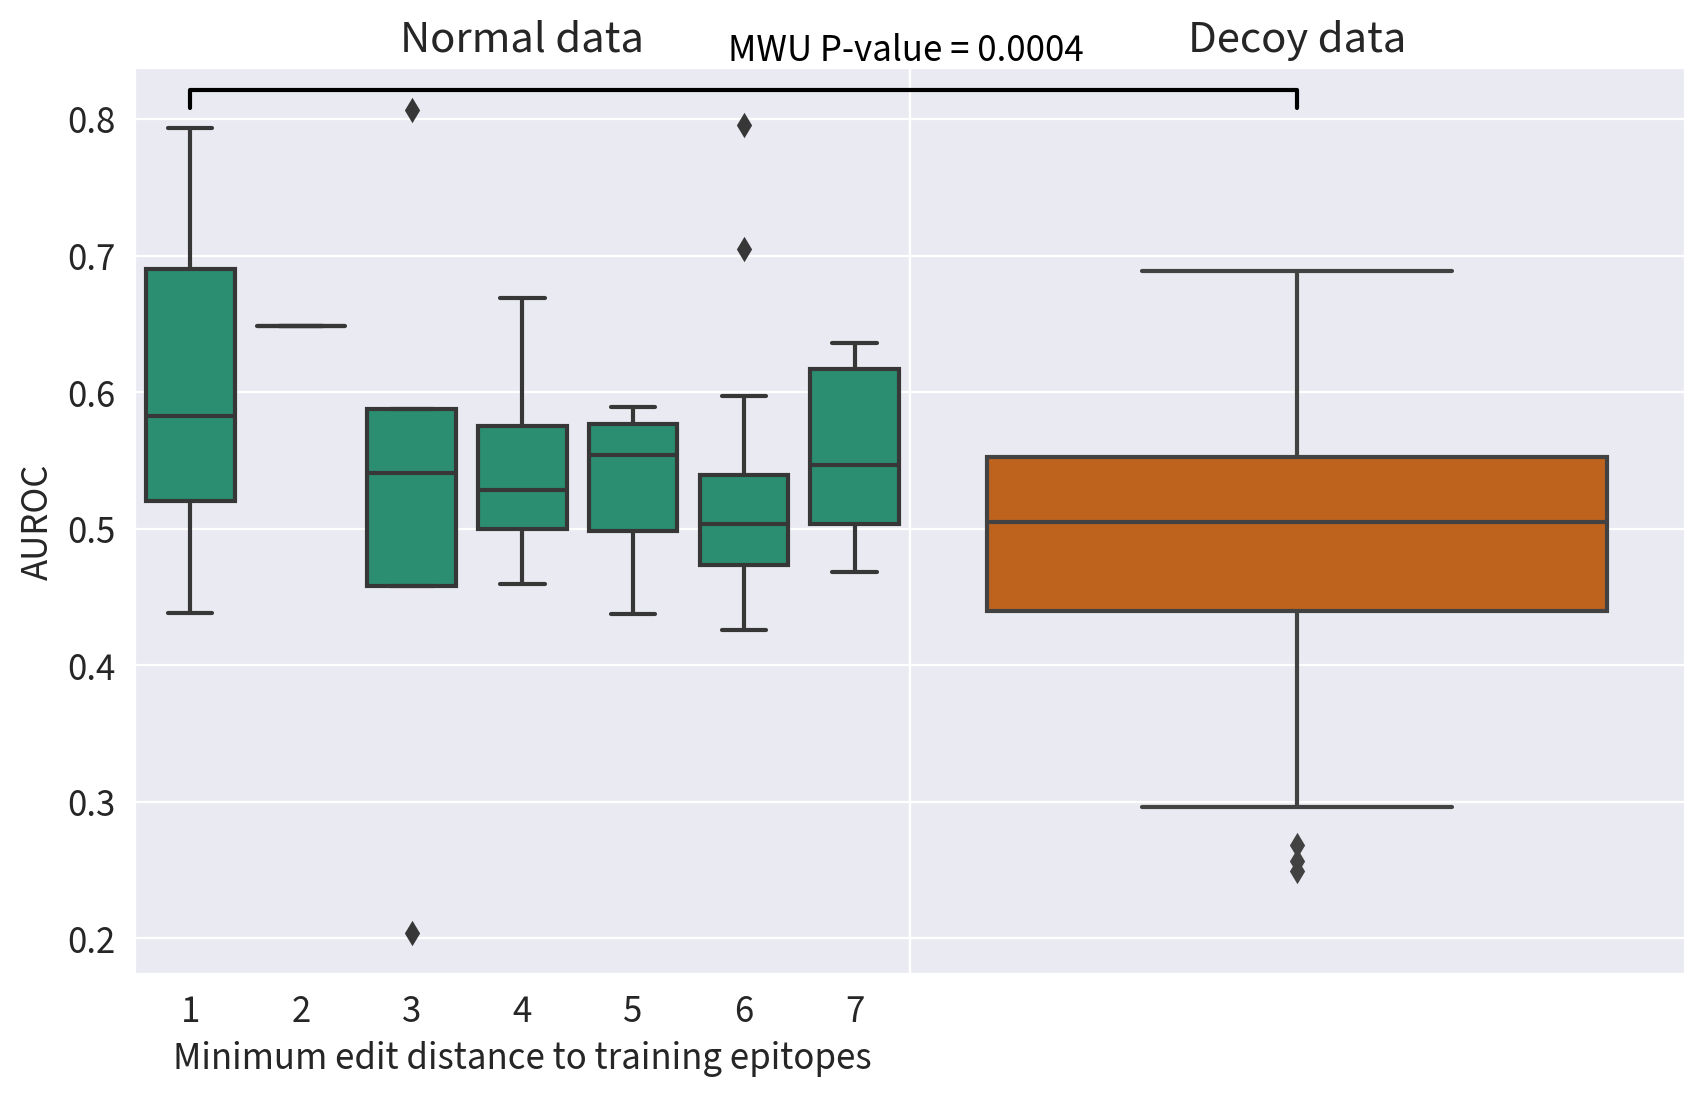

In [36]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + 0.04, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.1525, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.185, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-map-decoy-min-dist-aurroc-boxplot-strongdown.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-map-decoy-min-dist-aurroc-boxplot-strongdown.png", bbox_inches="tight")

In [40]:
eval_df[eval_df["decoy"]==True].roc_auc.median()

0.5046627819538116

In [37]:
eval_df[eval_df["decoy"]==True].roc_auc.mean()

0.4874489259990779

In [38]:
eval_df[eval_df["decoy"]==False].groupby("min_dist").roc_auc.mean()

min_dist
1    0.610828
2    0.648232
3    0.519454
4    0.546573
5    0.533958
6    0.523124
7    0.555822
Name: roc_auc, dtype: float64

In [39]:
eval_df[eval_df["decoy"]==True].groupby("min_dist").roc_auc.mean()

min_dist
0    0.487449
Name: roc_auc, dtype: float64

## Dual input shuffled negatives

In [41]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shuffle-dual-decoy"
decoy_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - shuffled negatives - decoy/2020-07-15_16-31-20_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - shuffled negatives/2020-07-15_16-29-08_evaluate_test_folds/metrics_per_epitope.csv")

In [42]:
eval_df.loc[eval_df["decoy"]==True, "roc_auc"].max()

0.6888888478279114

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


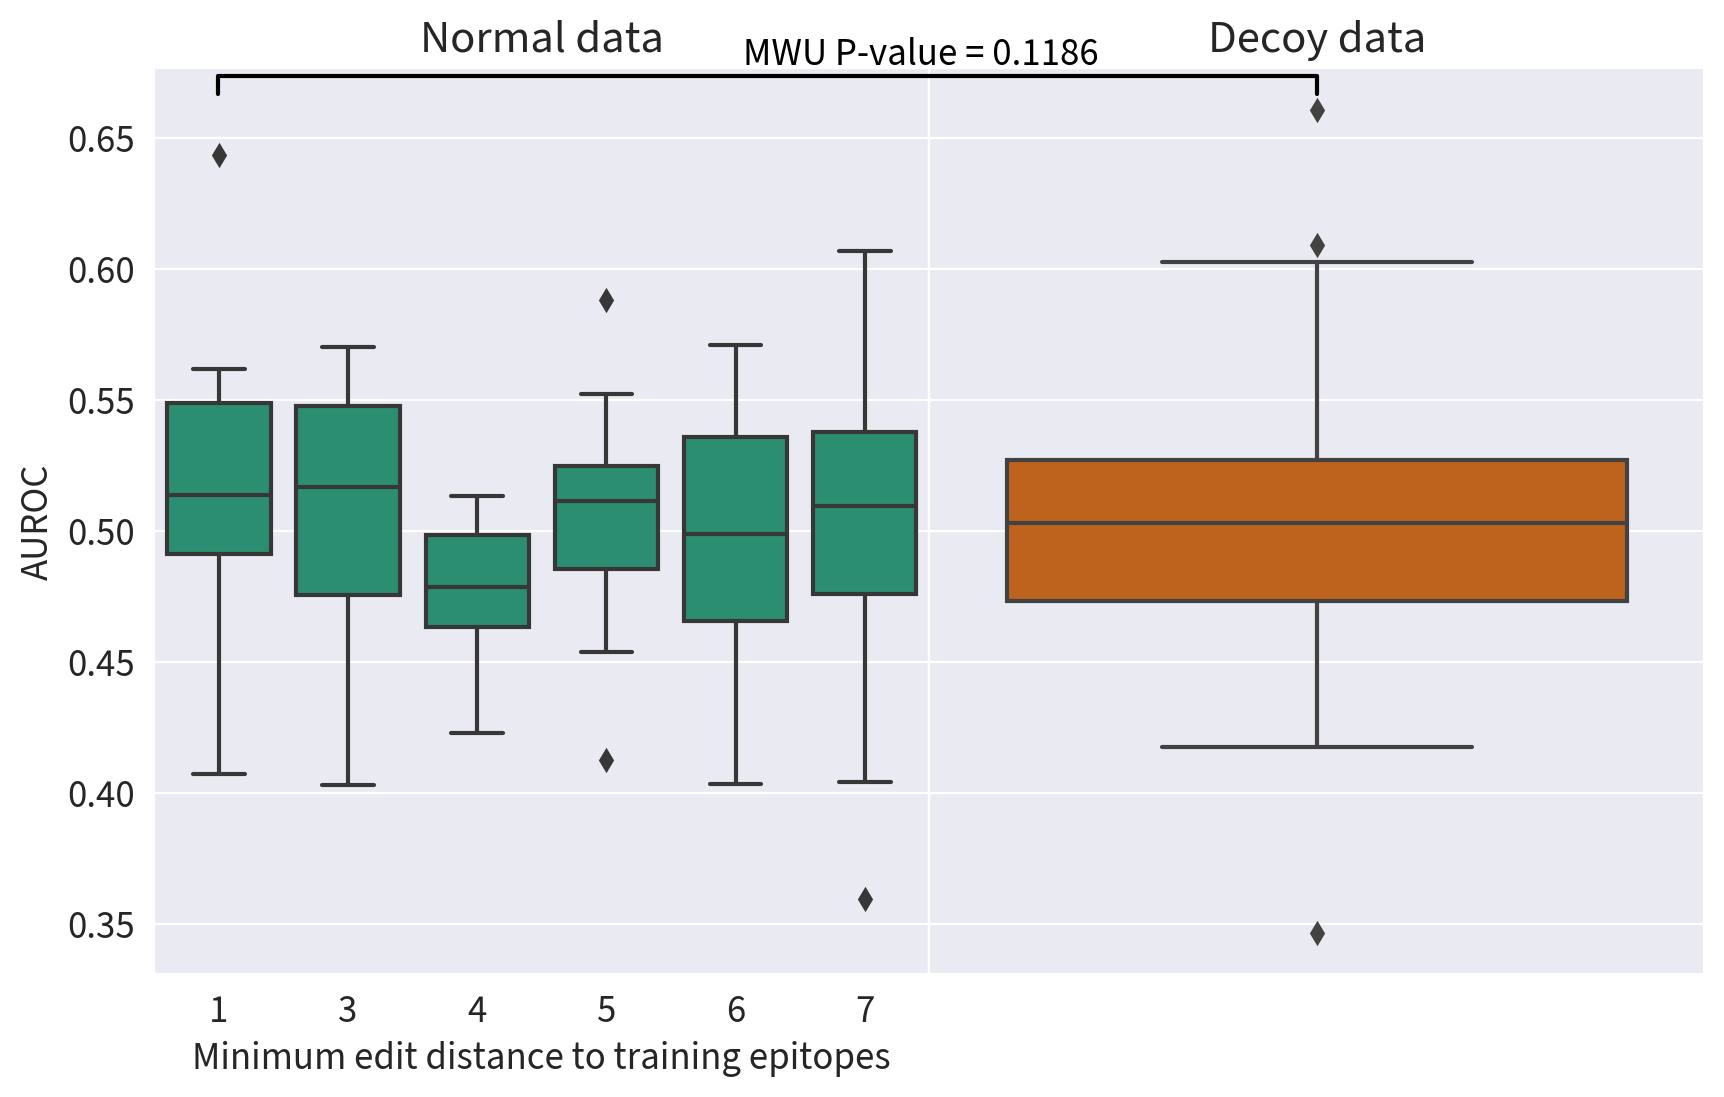

In [43]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==True, "roc_auc"].max() + 0.198, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .7065
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*.955, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-dual-decoy-min-dist-aurroc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-dual-decoy-min-dist-aurroc-boxplot.png", bbox_inches="tight")

In [44]:
eval_df[eval_df["decoy"]==True].roc_auc.mean()

0.5031211631638663

In [45]:
eval_df[eval_df["decoy"]==False].groupby("min_dist").roc_auc.mean()

min_dist
1    0.520015
3    0.502577
4    0.476020
5    0.506665
6    0.500183
7    0.497768
Name: roc_auc, dtype: float64

In [46]:
eval_df[eval_df["decoy"]==True].groupby("min_dist").roc_auc.mean()

min_dist
0    0.503121
Name: roc_auc, dtype: float64

### Dual input shuffled negatives strong down

In [47]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shuffle-dual-decoy-strongdown"
decoy_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - shuffled negatives - decoy/2020-07-23_16-30-21_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - shuffled negatives/2020-07-23_16-27-51_evaluate_test_folds/metrics_per_epitope.csv")

In [48]:
eval_df.loc[eval_df["decoy"]==True, "roc_auc"].max()

0.6607142686843872

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


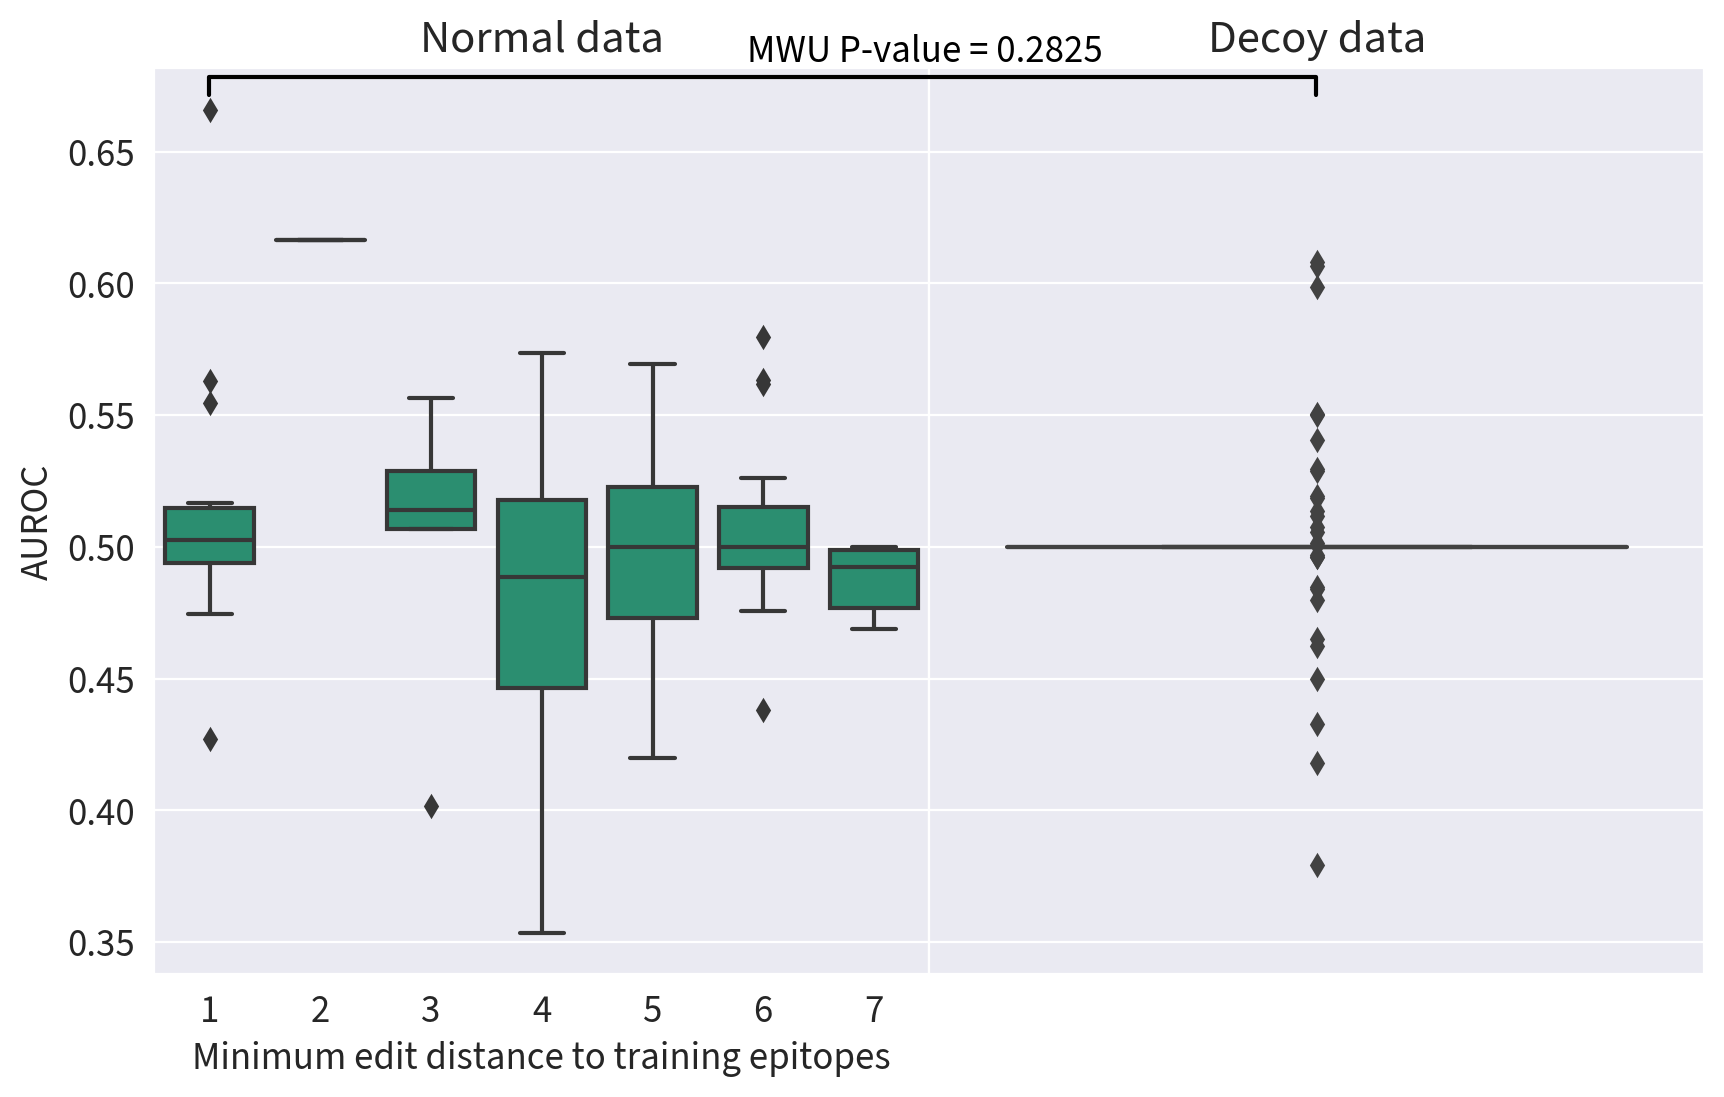

In [61]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==True, "roc_auc"].max() + 0.25, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.1525, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*.965, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-dual-decoy-min-dist-aurroc-boxplot-strongdown.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-dual-decoy-min-dist-aurroc-boxplot-strongdown.png", bbox_inches="tight")

In [50]:
eval_df[eval_df["decoy"]==True].roc_auc.mean()

0.5020729434309583

In [51]:
eval_df[eval_df["decoy"]==False].groupby("min_dist").roc_auc.mean()

min_dist
1    0.513931
2    0.616667
3    0.501737
4    0.475981
5    0.496753
6    0.505101
7    0.487510
Name: roc_auc, dtype: float64

In [52]:
eval_df[eval_df["decoy"]==True].groupby("min_dist").roc_auc.mean()

min_dist
0    0.502073
Name: roc_auc, dtype: float64

## Interaction map reference negatives

In [132]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-negref-map-decoy"
decoy_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - reference negatives - decoy/2020-07-14_17-09-17_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - reference negatives/2020-07-14_17-08-06_evaluate_test_folds/metrics_per_epitope.csv")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


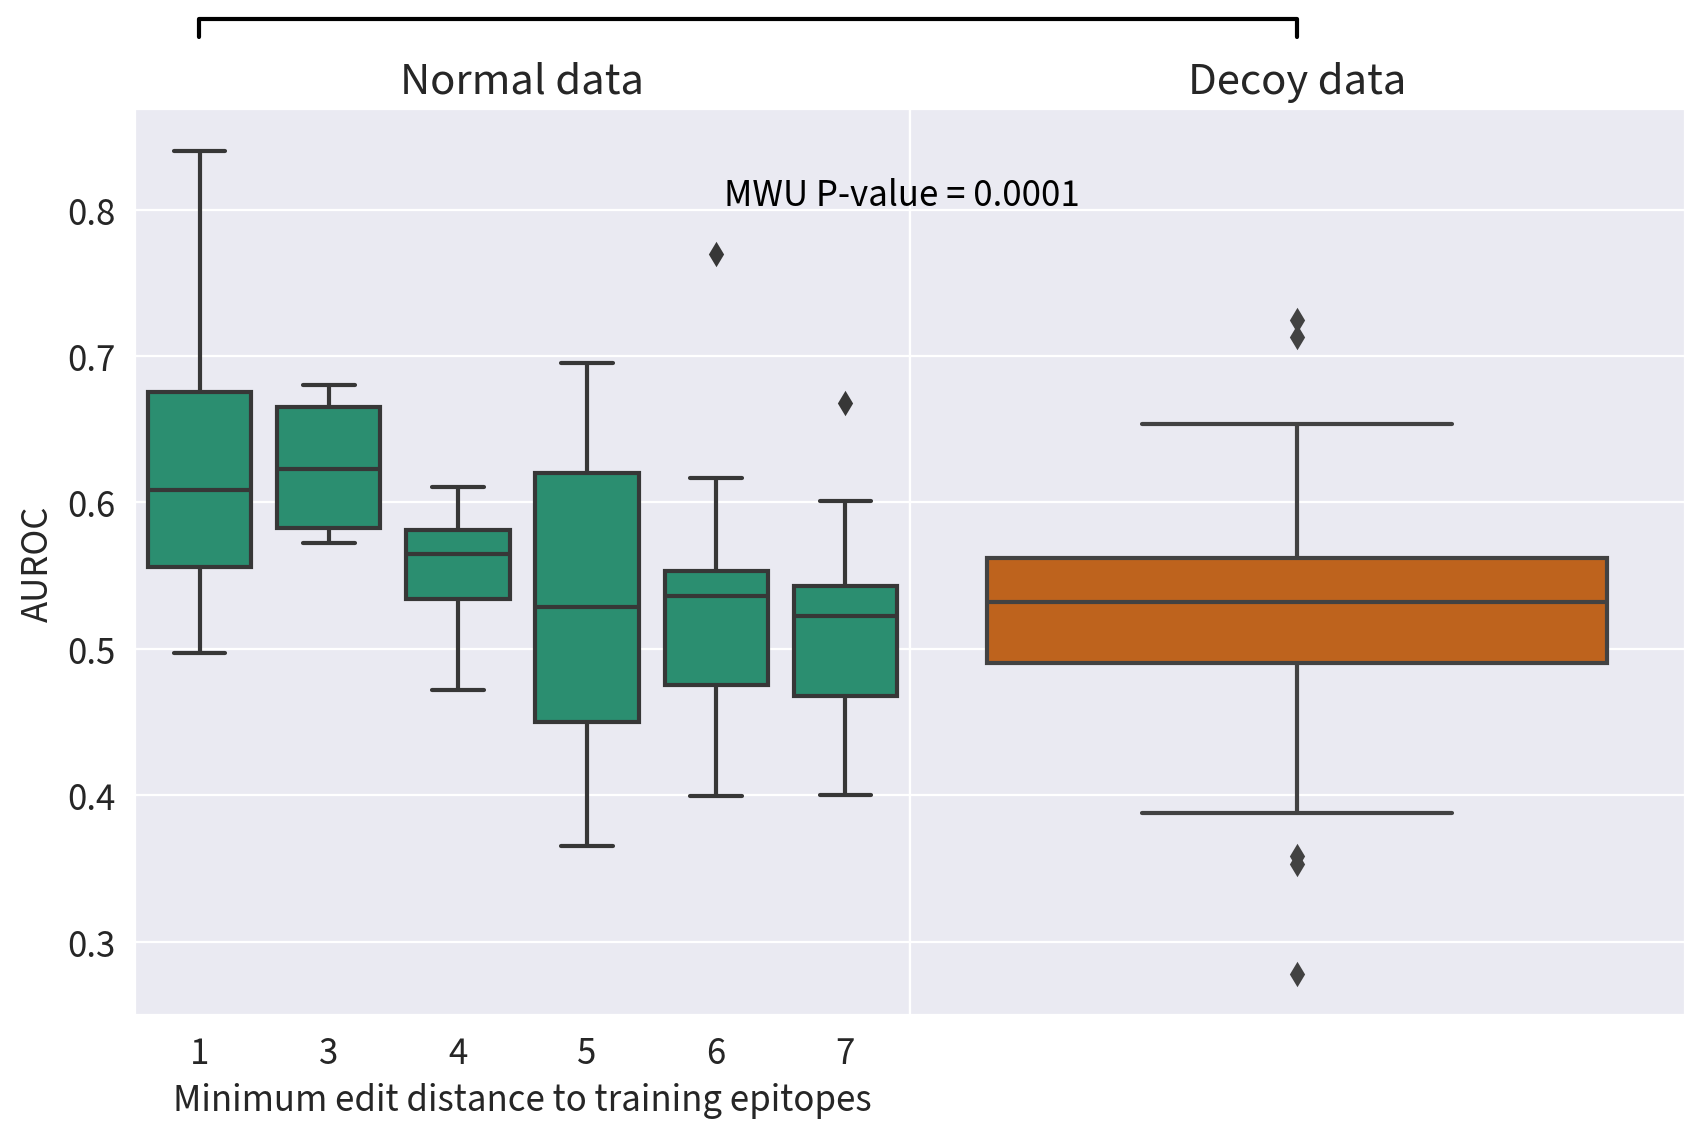

In [133]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.13, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-map-decoy-min-dist-aurroc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-map-decoy-min-dist-aurroc-boxplot.png", bbox_inches="tight")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


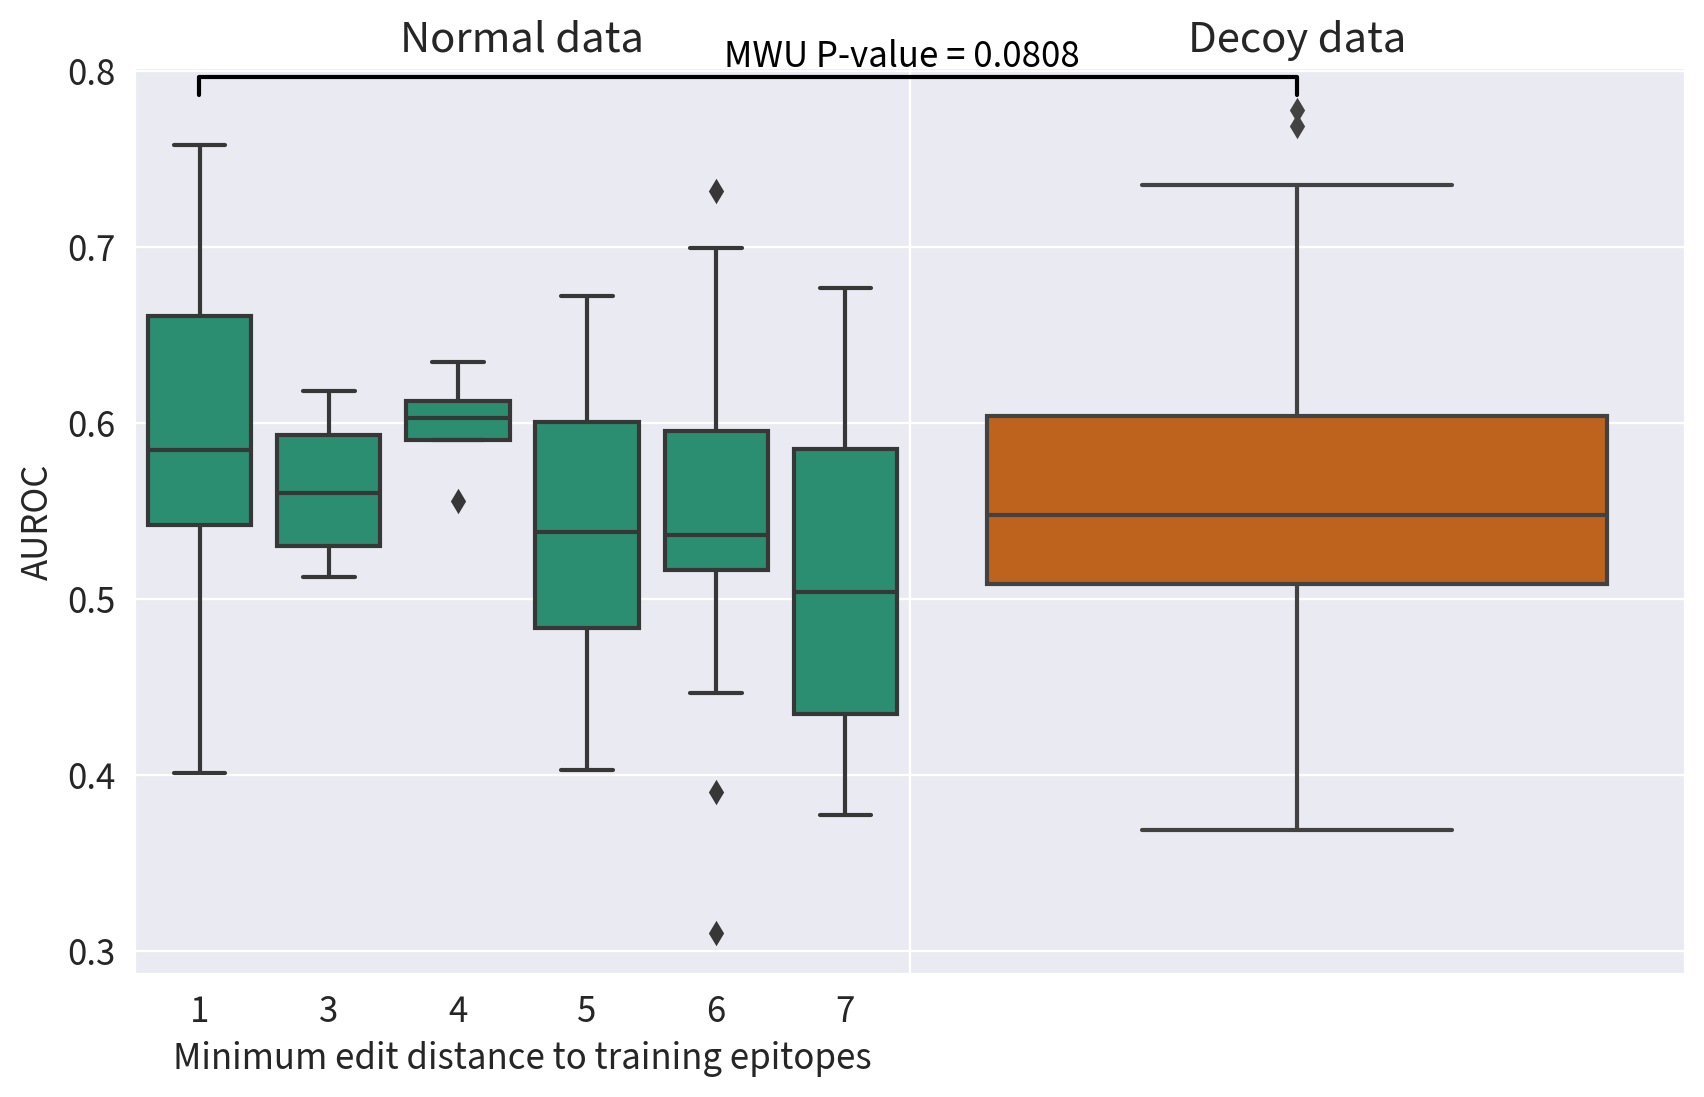

In [13]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.13, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-map-decoy-min-dist-aurroc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-map-decoy-min-dist-aurroc-boxplot.png", bbox_inches="tight")

## Dual input reference negatives

In [134]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-negref-dual-decoy"
decoy_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - reference negatives - decoy/2020-07-15_16-32-35_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - reference negatives/2020-07-15_16-30-10_evaluate_test_folds/metrics_per_epitope.csv")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


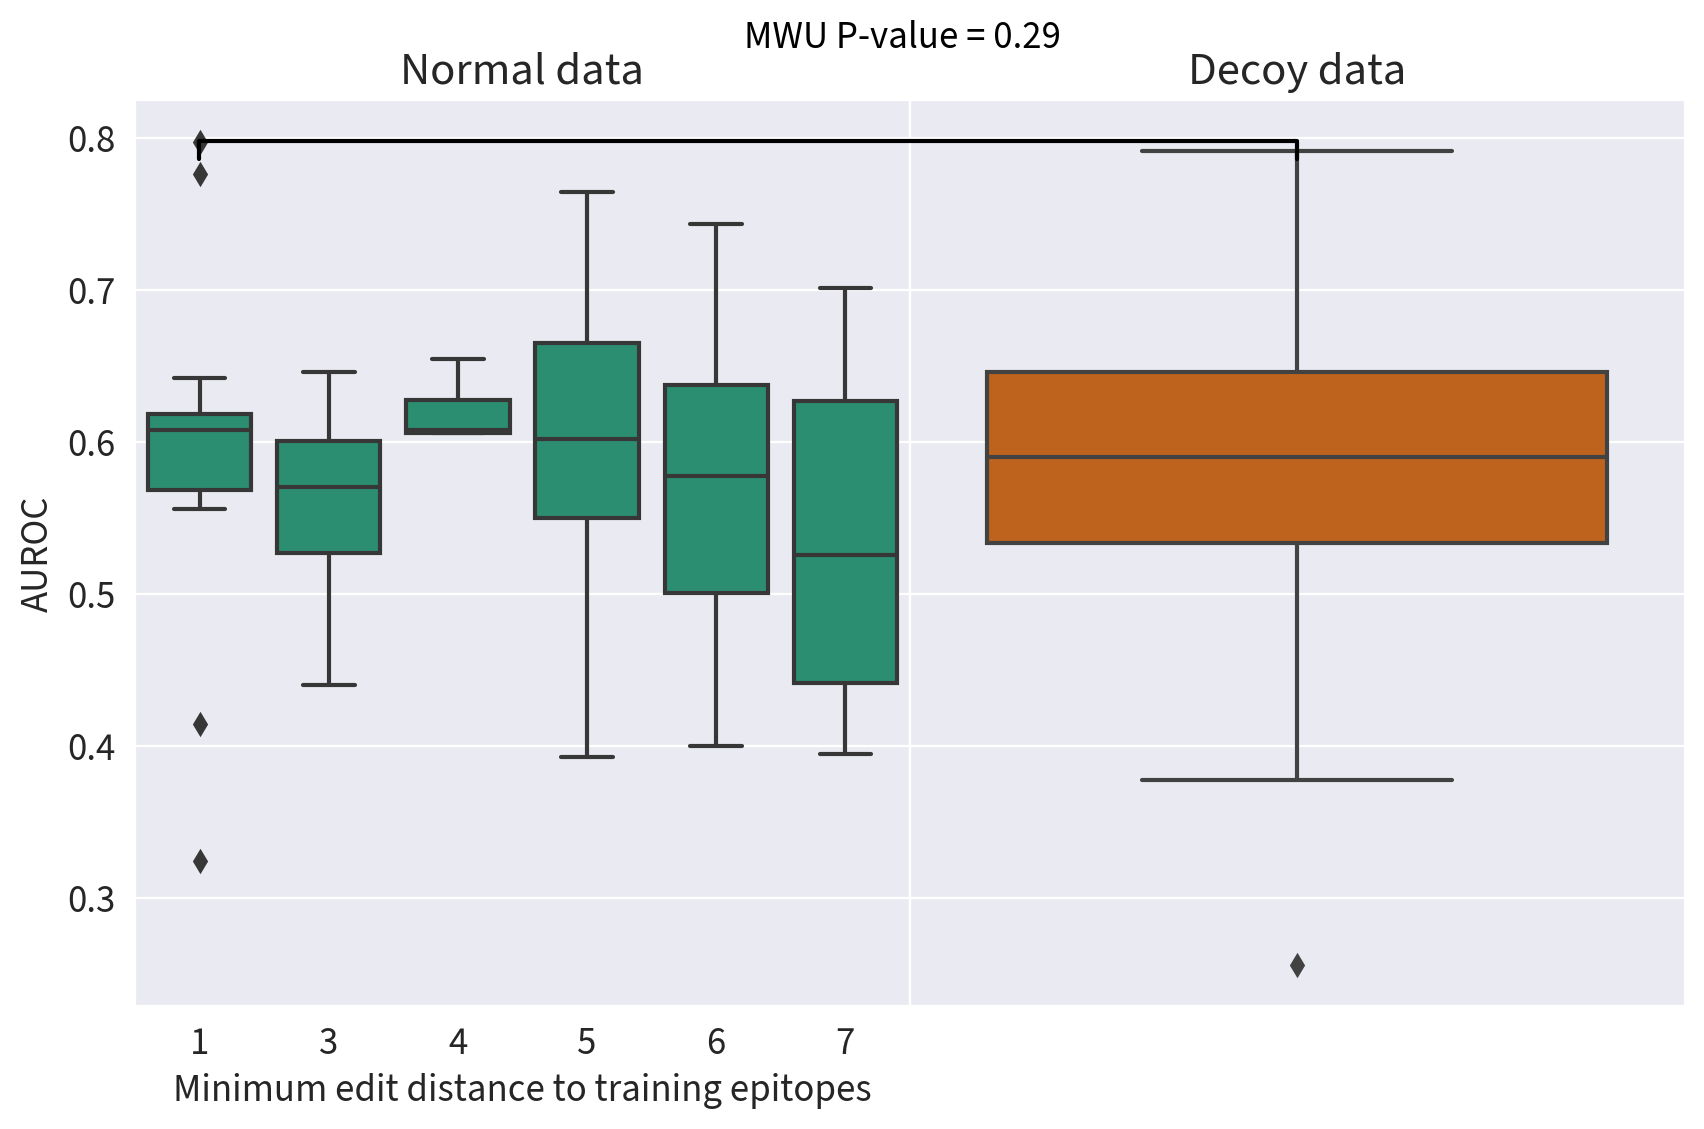

In [135]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df["roc_auc"].max() + .033, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.21, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-dual-decoy-min-dist-aurroc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-dual-decoy-min-dist-aurroc-boxplot.png", bbox_inches="tight")

# Negative data types for normal versus decoy data

## Interaction map - moderate down

In [4]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shufflenegref-map-decoy"

In [5]:
df = pd.read_csv(directory / "auc_per_iteration.csv")

In [6]:
df.type.unique()

array(['Interaction map - TRB - epitope-grouped - reference negatives',
       'Interaction map - TRB - epitope-grouped - reference negatives - decoy',
       'Interaction map - TRB - epitope-grouped - shuffled negatives',
       'Interaction map - TRB - epitope-grouped - shuffled negatives - decoy'],
      dtype=object)

In [7]:
unique_values = sorted(df["type"].unique())

# if len(unique_values) < 8:
#     pal = custom_palette
# else:
#     pal = sns.color_palette("Set1", n_colors=len(unique_values))

pal = sns.color_palette("Dark2", n_colors=len(unique_values))

palette_dict = dict(zip(unique_values, pal))

In [8]:
# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

In [9]:
negref = ['Interaction map - TRB - epitope-grouped - reference negatives',
       'Interaction map - TRB - epitope-grouped - reference negatives - decoy']
shuffle = ['Interaction map - TRB - epitope-grouped - shuffled negatives',
       'Interaction map - TRB - epitope-grouped - shuffled negatives - decoy']

[[]]

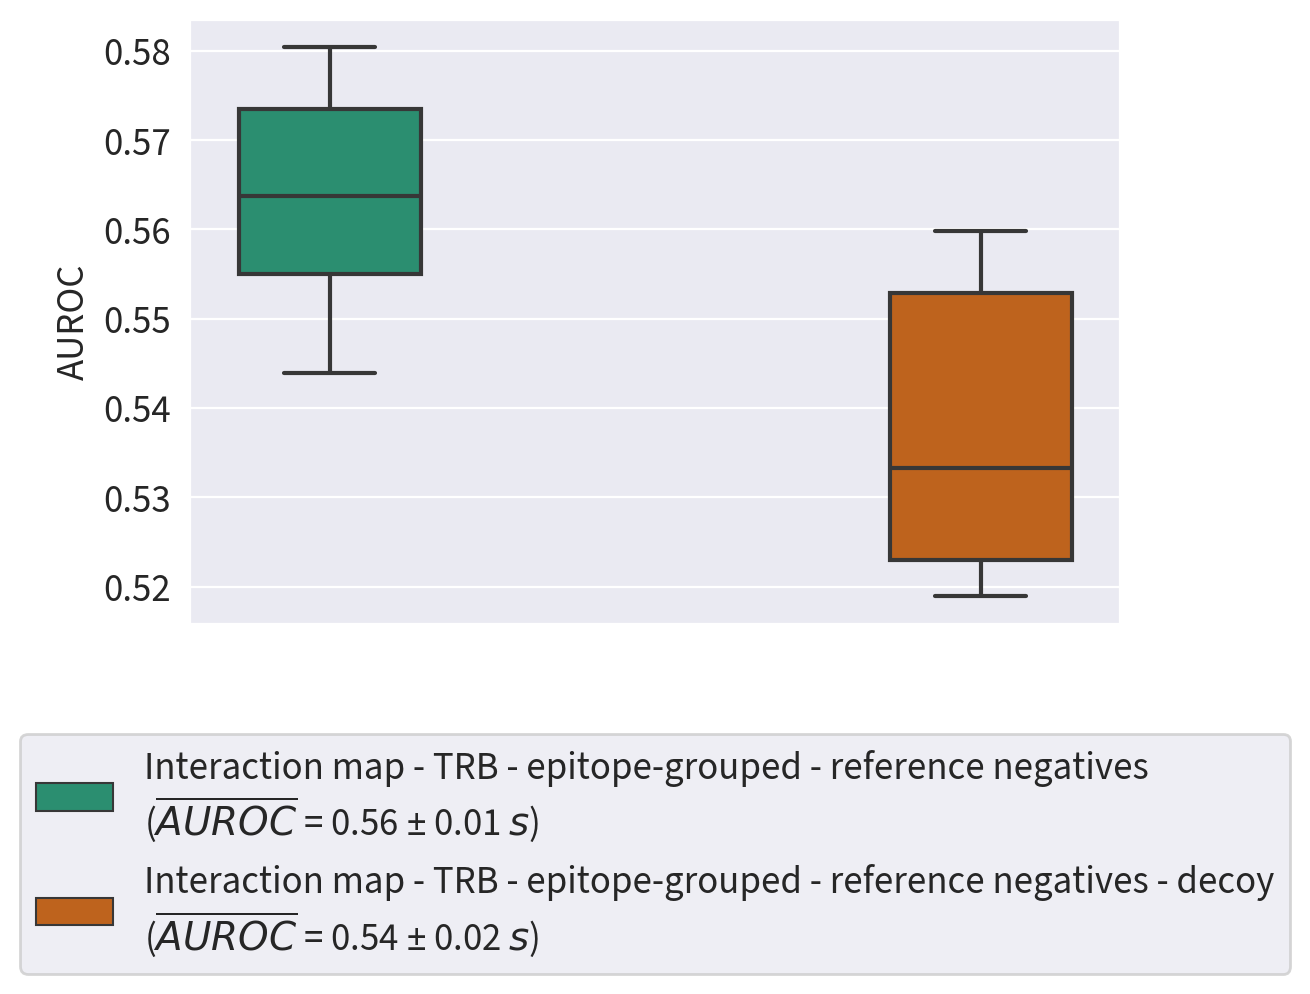

In [10]:
fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))

sns_plot = sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
)


plt.setp(
    ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
)

plt.xlabel(None)
plt.ylabel("AUROC")

# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, 0.7))
# plt/sns_plot.legend() overrides custom legend
# for lh in plt.legend().legendHandles:
#     lh.set_alpha(0.7)

# add legend and remove x labels
# must be called after setting alpha or it will override location again
## ax.legend()

# legend below figure, requires hue to be set
sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
sns_plot.set(xticklabels=[])

[[]]

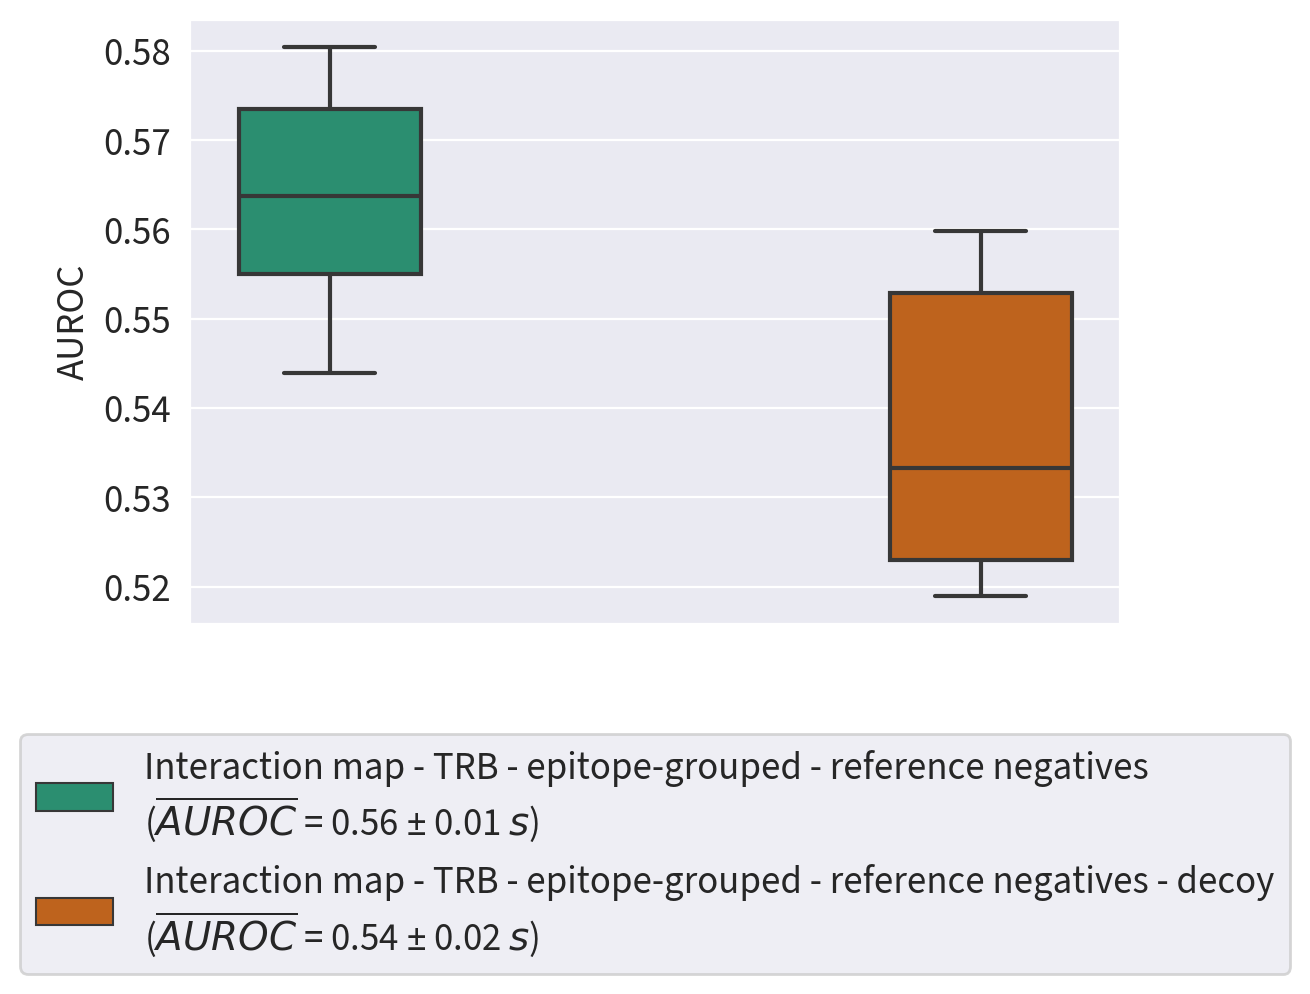

In [11]:
fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))

sns_plot = sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
)


plt.setp(
    ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
)

plt.xlabel(None)
plt.ylabel("AUROC")

# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, 0.7))
# plt/sns_plot.legend() overrides custom legend
# for lh in plt.legend().legendHandles:
#     lh.set_alpha(0.7)

# add legend and remove x labels
# must be called after setting alpha or it will override location again
## ax.legend()

# legend below figure, requires hue to be set
sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
sns_plot.set(xticklabels=[])

In [12]:
# # increase font size for larger figure

# plt.rcParams.update({"font.size": 14})  # 20})
# # plt.rcParams["title_fontsize"] = 10
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = "Source Sans Pro"  # ['Fira Sans', 'Source Sans Pro']
# font = {"weight": "normal"}  # ,'size'   : 22}

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


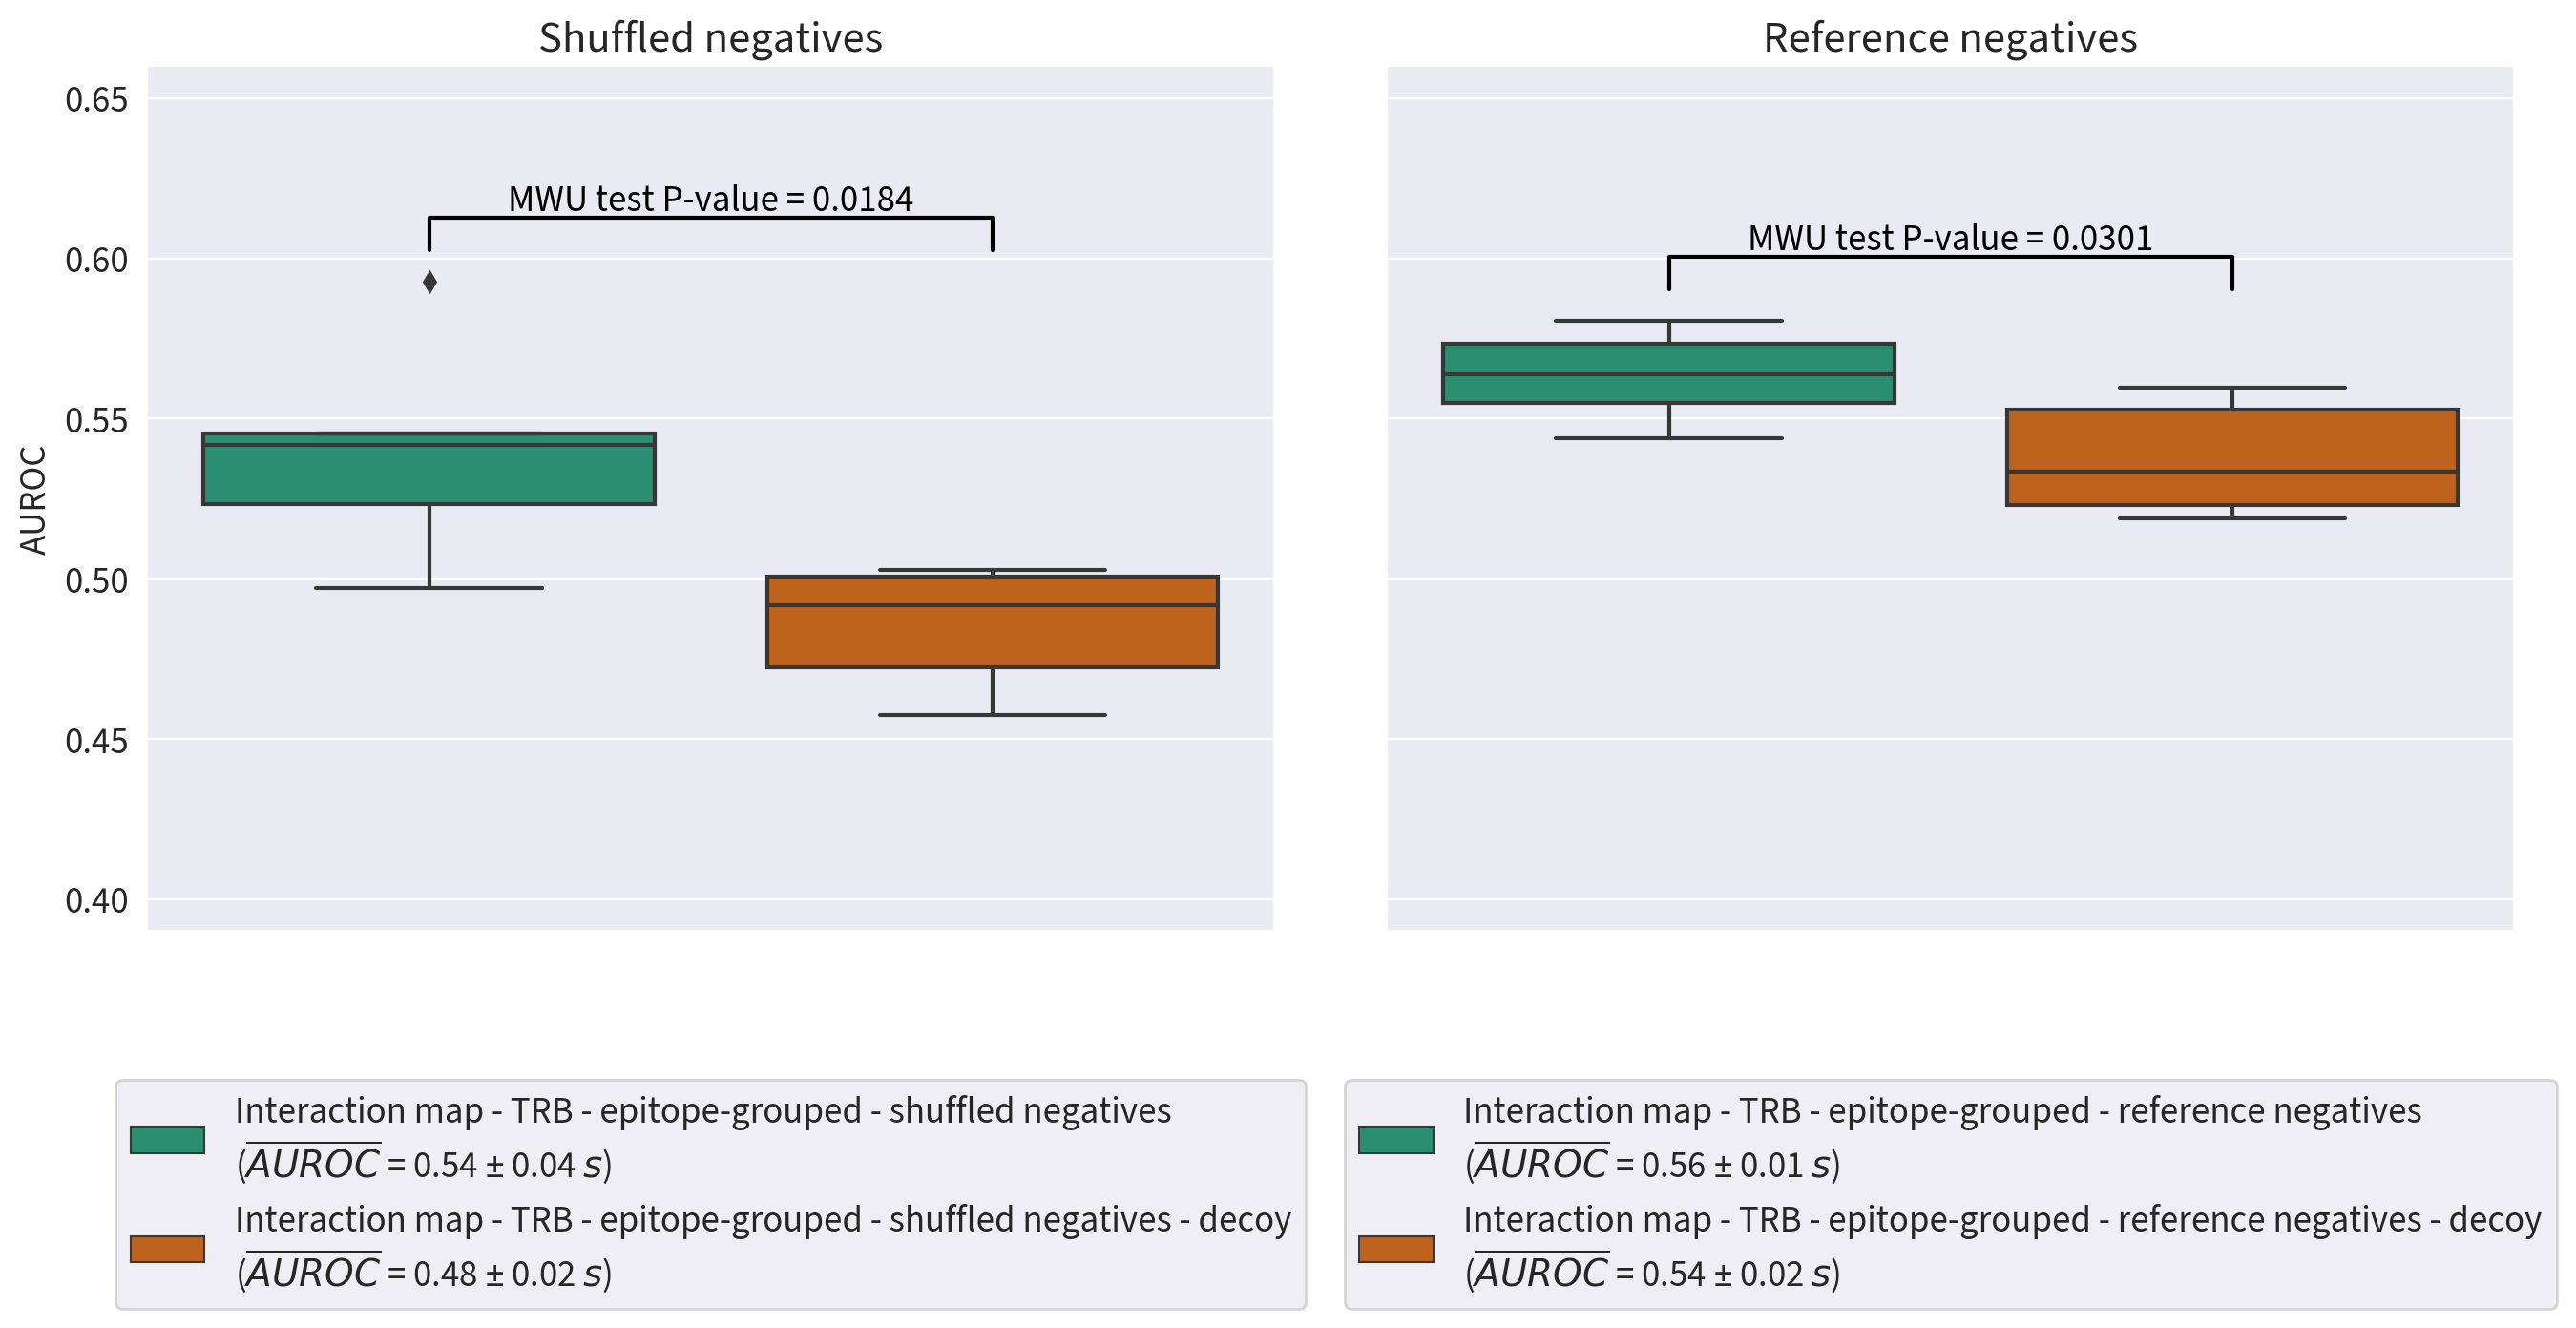

In [13]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .01, .01, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)


## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + .01, .01, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-map-decoy-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-map-decoy-roc-boxplot.png", bbox_inches="tight")

In [24]:
df_shuffle.auc.max()

0.5952719885293676

In [25]:
# unique_values = sorted(df["type-mean-std"].unique())

# # if len(unique_values) < 8:
# #     pal = custom_palette
# # else:
# #     pal = sns.color_palette("Set1", n_colors=len(unique_values))

# pal = sns.color_palette("Dark2", n_colors=len(unique_values))

# palette_dict = dict(zip(unique_values, pal))




# fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))

# # labels = list()
# for tpe in df.type.unique():
#     df_label = df[df.type == tpe]
#     auc_mean = df_label.auc.mean()
#     auc_std = df_label.auc.std()
#     model_name = (
#         f"{tpe}\n"
#         + r"($\overline{AUROC}$"
#         + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
#         + r"$s$)"
#     )
#     # labels.append(model_name)
#     # labels = [fill(l, 50) for l in labels]

#     df.loc[df.type == tpe, "type-mean-std"] = model_name

# sns_plot = sns.boxplot(
#     x="type-mean-std",
#     y="auc",
#     data=df.sort_values(by=["type-mean-std"]),
#     order=sorted(df["type-mean-std"].unique()),
#     palette=pal,
#     hue="type-mean-std",
# )
# # color=palette_single[3])
# # hue="type-mean-std" for legend, optionally use custom labels

# plt.setp(
#     ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
# )

# plt.xlabel(None)
# plt.ylabel("AUROC")

# # for patch in ax.artists:
# #     r, g, b, a = patch.get_facecolor()
# #     patch.set_facecolor((r, g, b, 0.7))
# # plt/sns_plot.legend() overrides custom legend
# # for lh in plt.legend().legendHandles:
# #     lh.set_alpha(0.7)

# # add legend and remove x labels
# # must be called after setting alpha or it will override location again
# ## ax.legend()

# # legend below figure, requires hue to be set
# sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
# sns_plot.set(xticklabels=[])

In [26]:
# fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))
#     df = pd.read_csv(os.path.join(directory, "auc_per_iteration.csv"))

#     # labels = list()
#     for tpe in df.type.unique():
#         df_label = df[df.type == tpe]
#         auc_mean = df_label.auc.mean()
#         auc_std = df_label.auc.std()
#         model_name = (
#             f"{tpe}\n"
#             + r"($\overline{AUROC}$"
#             + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
#             + r"$s$)"
#         )
#         # labels.append(model_name)
#         # labels = [fill(l, 50) for l in labels]

#         df.loc[df.type == tpe, "type-mean-std"] = model_name

#     sns_plot = sns.boxplot(
#         x="type-mean-std",
#         y="auc",
#         data=df.sort_values(by=["type-mean-std"]),
#         order=sorted(df["type-mean-std"].unique()),
#         palette=get_palette(df, "type-mean-std"),
#         hue="type-mean-std",
#     )
#     # color=palette_single[3])
#     # hue="type-mean-std" for legend, optionally use custom labels

#     plt.setp(
#         ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
#     )

#     plt.xlabel(None)
#     plt.ylabel("AUROC")

#     # for patch in ax.artists:
#     #     r, g, b, a = patch.get_facecolor()
#     #     patch.set_facecolor((r, g, b, 0.7))
#     # plt/sns_plot.legend() overrides custom legend
#     # for lh in plt.legend().legendHandles:
#     #     lh.set_alpha(0.7)

#     # add legend and remove x labels
#     # must be called after setting alpha or it will override location again
#     ## ax.legend()

#     # legend below figure, requires hue to be set
#     sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
#     sns_plot.set(xticklabels=[])

#     # add wmu test

#     if df["type"].nunique() == 2:
#         # sort the values
#         df = df.sort_values(["iteration", "type"]).reset_index(drop=True)
#         # and calculate the difference in auroc between the model types per iteration
#         df["diff"] = df.groupby("iteration")["auc"].transform(lambda x: x.diff())

#         # # wilcoxon signed rank test
#         # # compute wilcoxon test and add p-value to legend
#         # p = scipy.stats.wilcoxon(df["diff"].dropna(), correction=True, mode="exact")[1]
#         # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

#         # # sign test
#         # x = (df["diff"].dropna() > 0).sum()
#         # n = len(df["diff"].dropna())
#         # p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
#         # ax.legend(title=f"Sign test {p}")

#         # MWU test
#         auroc_lists = [df.loc[df["type"] == i, "auc"] for i in df["type"].unique()]
#         p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])  # [1]
#         ax.legend(title=f"MWU test {p}")

#     sns_plot.get_figure().savefig(
#         get_output_path(
#             directory,
#             "roc_boxplot"
#             + "-"
#             + str(Path(directory).absolute().name).replace(" ", "-"),
#         ),
#         bbox_inches="tight",
#     )


## Dual input - moderate down

In [147]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shufflenegref-dual-decoy"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

array(['Dual input - TRB - epitope-grouped - reference negatives',
       'Dual input - TRB - epitope-grouped - reference negatives - decoy',
       'Dual input - TRB - epitope-grouped - shuffled negatives',
       'Dual input - TRB - epitope-grouped - shuffled negatives - decoy'],
      dtype=object)

In [148]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

negref = ['Dual input - TRB - epitope-grouped - reference negatives',
       'Dual input - TRB - epitope-grouped - reference negatives - decoy']
shuffle = ['Dual input - TRB - epitope-grouped - shuffled negatives',
       'Dual input - TRB - epitope-grouped - shuffled negatives - decoy']

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


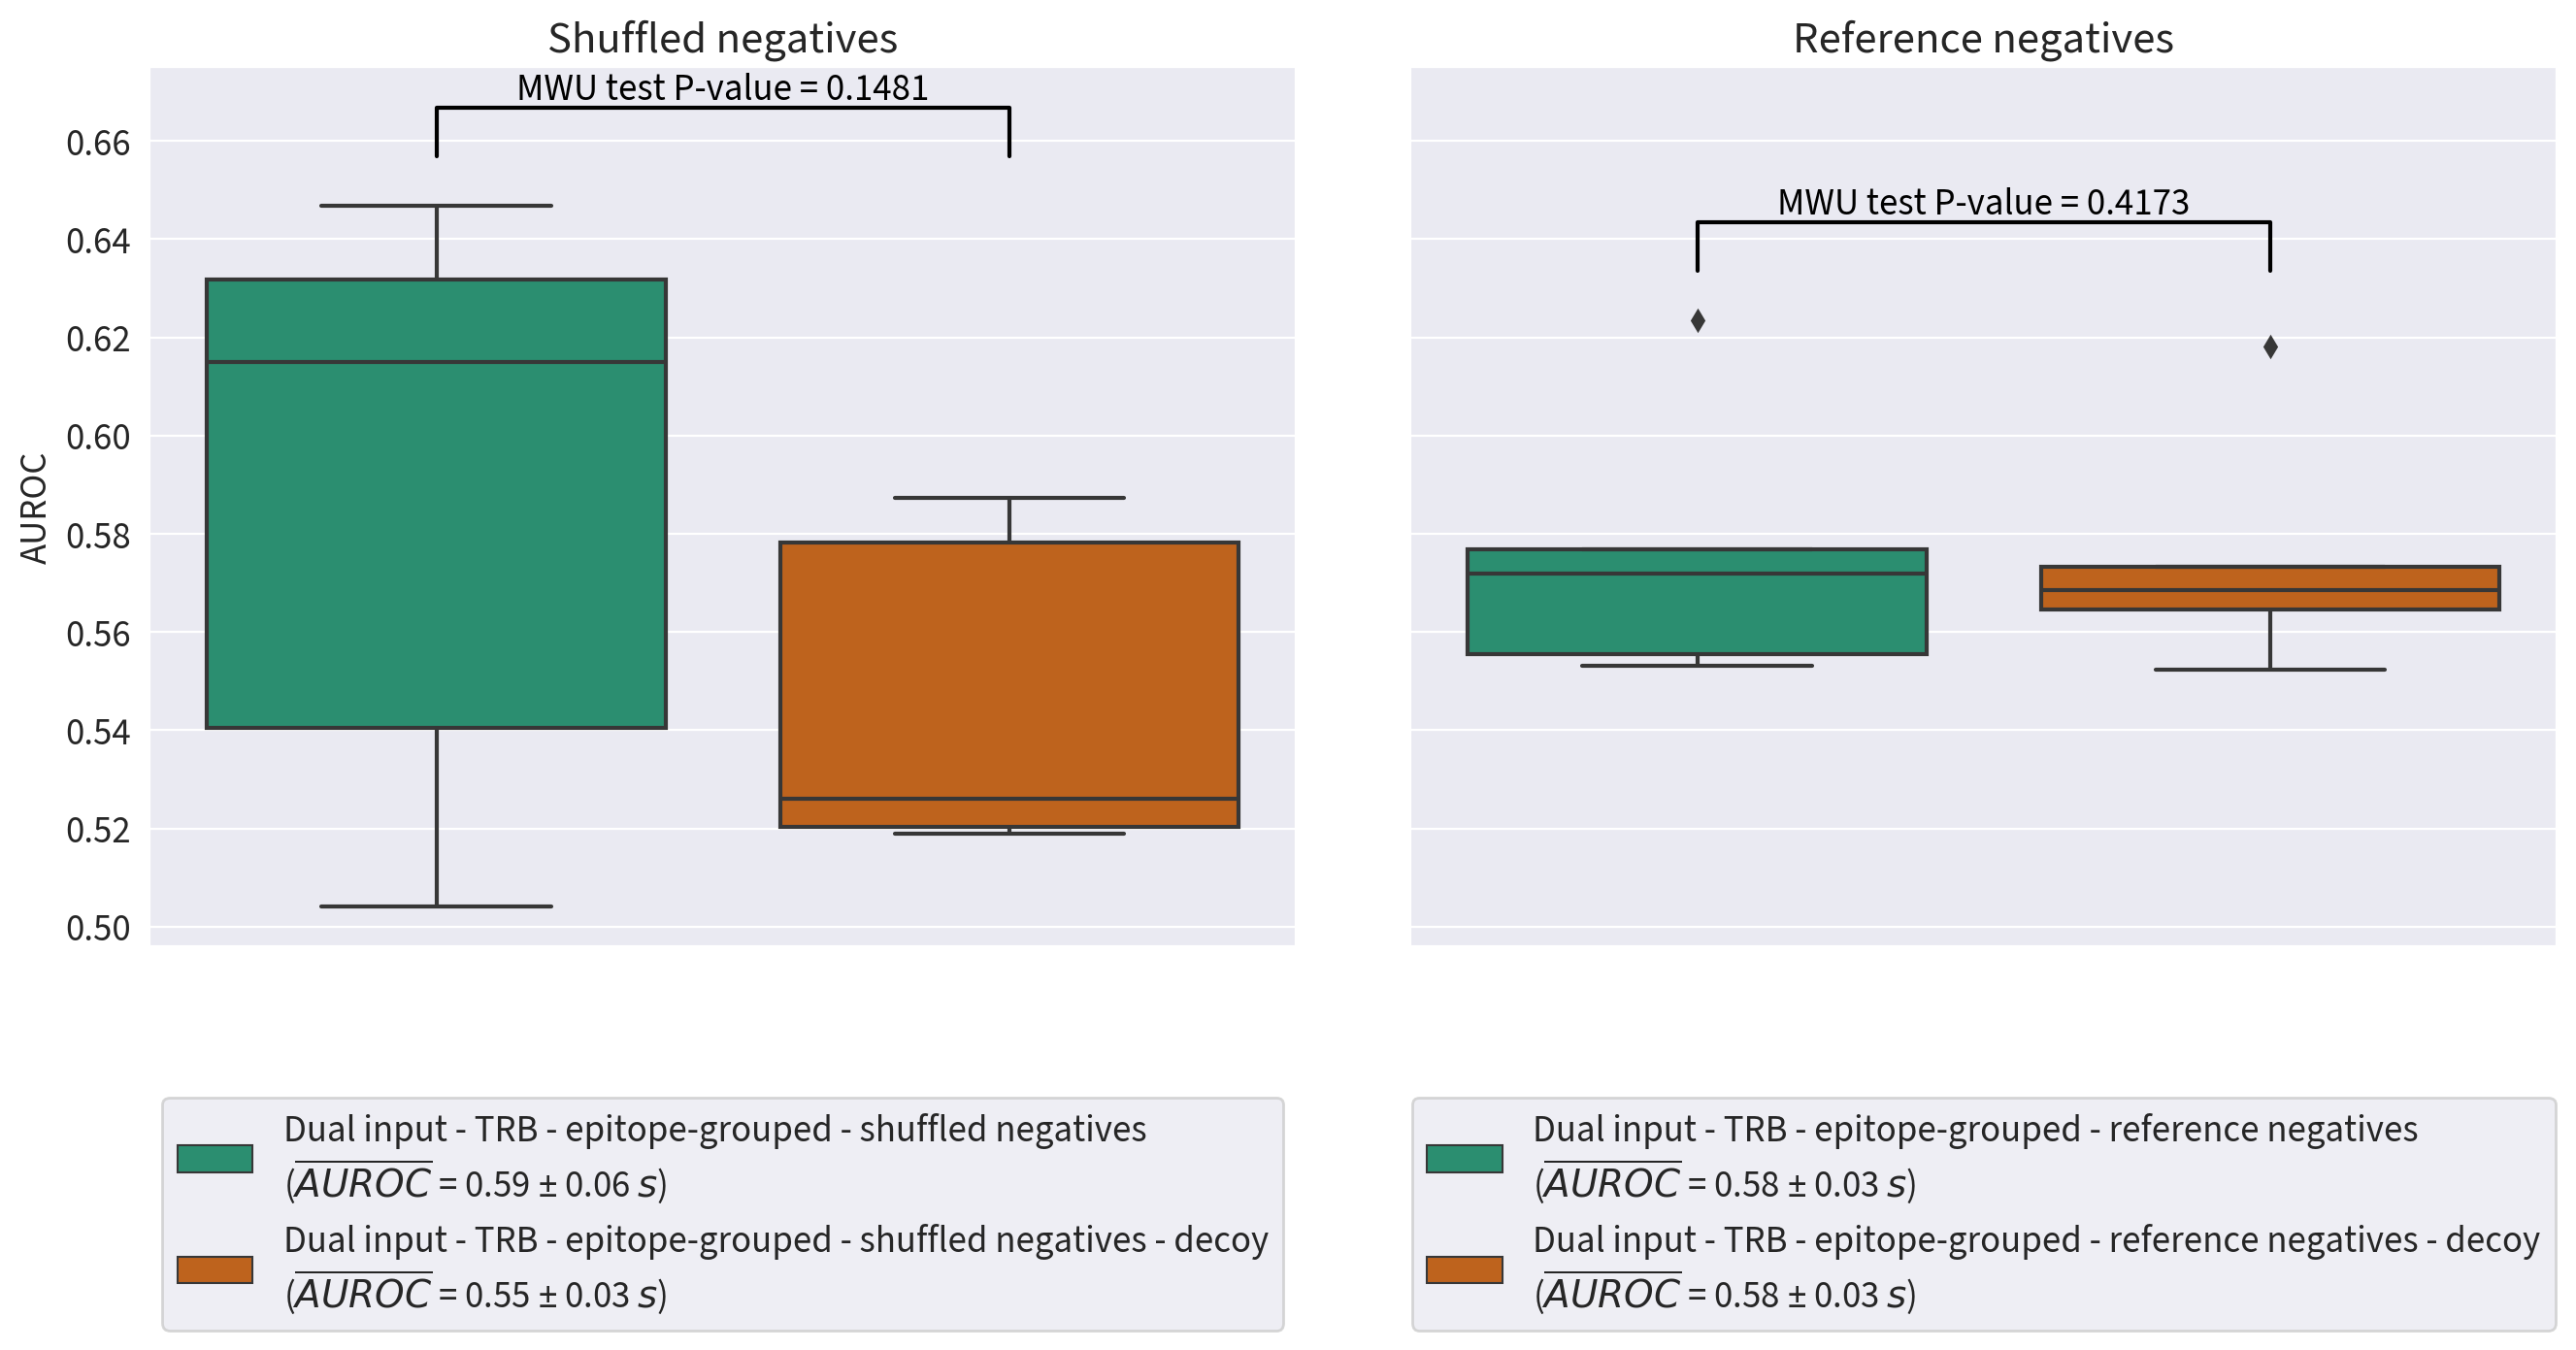

In [149]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

# plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .01, .01, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)


## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + .01, .01, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-dual-decoy-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-dual-decoy-roc-boxplot.png", bbox_inches="tight")

In [47]:
scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]

0.10503752039332925

In [52]:
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]

[i for i in auroc_lists[0]]

[0.5589727422504024,
 0.5662762406495692,
 0.5639636484184919,
 0.5472546501022801,
 0.6223757007062287]

In [53]:
[i for i in auroc_lists[1]]

[0.5603192417734487,
 0.5587002866095865,
 0.5636546362295389,
 0.5251802753364218,
 0.5533861518171572]

WMU requires homoskedasticity, otherwise welch's anova should be used. Not an issue here. See R code.

In [38]:
# > a <- c(0.6122143863452232,
# +  0.6139794114770689,
# +  0.4606634357343695,
# +  0.6142484301774618,
# +  0.506155091624145)
# > b <- c(0.3826730085507953,
# +  0.40071054056511424,
# +  0.5843434553311788,
# +  0.5139219520821766,
# +  0.470069560549673)
# > df <- data.frame(data=c(rep("true",times=length(a)),rep("decoy",times=length(b))),auroc=c(a,b))
# > oneway.test(auroc~data,data=df,var.equal=FALSE)

# 	One-way analysis of means (not assuming equal variances)

# data:  auroc and data
# F = 3.4041, num df = 1.0000, denom df = 7.8771, p-value = 0.1028

# > library(car)
# > leveneTest(auroc~data,data=df)
# Levene's Test for Homogeneity of Variance (center = median)
#       Df F value Pr(>F)
# group  1  0.0812 0.7829
#        8               
# > bartlett.test(auroc~data,data=df)

# 	Bartlett test of homogeneity of variances

# data:  auroc by data
# Bartlett's K-squared = 0.055889, df = 1, p-value = 0.8131


## Interaction map - strong down

In [62]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shufflenegref-map-decoy-strongdown"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

array(['Interaction map - TRB - epitope-grouped - reference negatives',
       'Interaction map - TRB - epitope-grouped - reference negatives - decoy',
       'Interaction map - TRB - epitope-grouped - shuffled negatives',
       'Interaction map - TRB - epitope-grouped - shuffled negatives - decoy'],
      dtype=object)

In [63]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

negref = ['Interaction map - TRB - epitope-grouped - reference negatives',
       'Interaction map - TRB - epitope-grouped - reference negatives - decoy']
shuffle = ['Interaction map - TRB - epitope-grouped - shuffled negatives',
       'Interaction map - TRB - epitope-grouped - shuffled negatives - decoy']

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


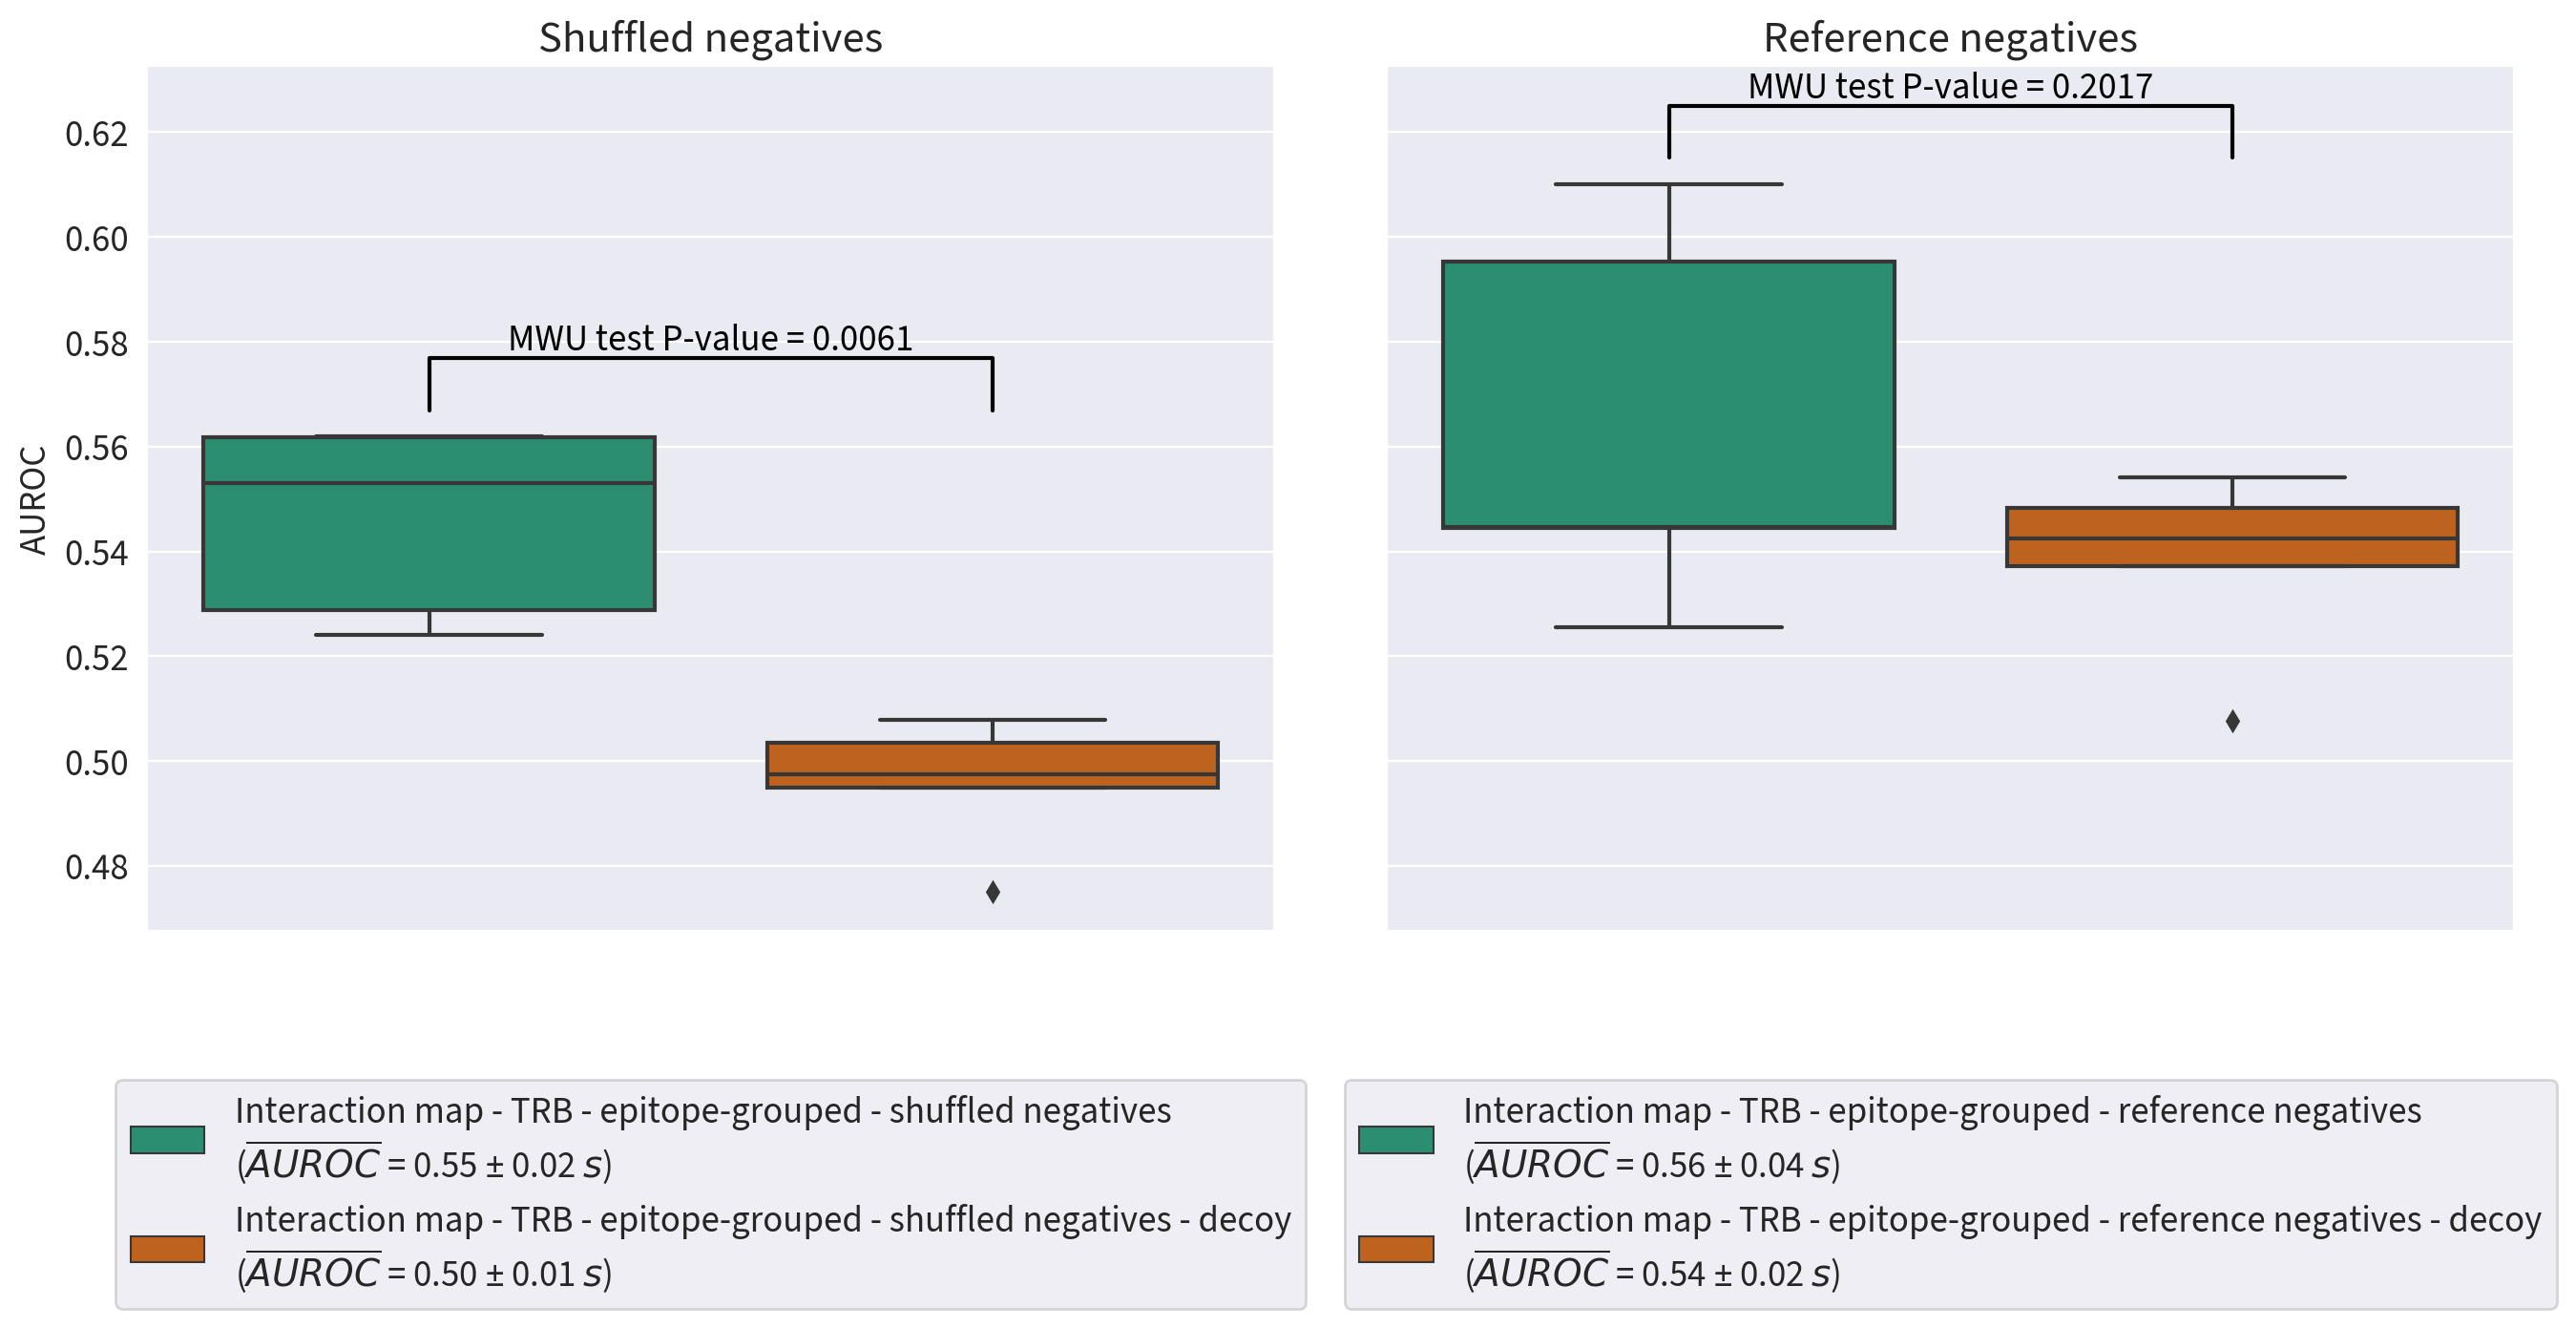

In [66]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

# plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .005, .01, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + 0.005, .01, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-strongdown-shufflenegref-map-decoy-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-strongdown-shufflenegref-map-decoy-roc-boxplot.png", bbox_inches="tight")

In [24]:
scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]

0.20169765244631416

In [25]:
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]

[i for i in auroc_lists[0]]

[0.5255852672635701,
 0.6100909702098838,
 0.5444224771664068,
 0.5952795722878146,
 0.5446630652706617]

In [26]:
[i for i in auroc_lists[1]]

[0.5482396800055164,
 0.554115847300839,
 0.5076208509690354,
 0.5372505012252172,
 0.5425066830028961]

WMU requires homoskedasticity, otherwise welch's anova should be used. Not an issue here. See R code.

## Dual input - strong down

In [27]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-down-shufflenegref-dual-decoy-strongdown"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

array(['Dual input - TRB - epitope-grouped - reference negatives',
       'Dual input - TRB - epitope-grouped - reference negatives - decoy',
       'Dual input - TRB - epitope-grouped - shuffled negatives',
       'Dual input - TRB - epitope-grouped - shuffled negatives - decoy'],
      dtype=object)

In [28]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

negref = ['Dual input - TRB - epitope-grouped - reference negatives',
       'Dual input - TRB - epitope-grouped - reference negatives - decoy']
shuffle = ['Dual input - TRB - epitope-grouped - shuffled negatives',
       'Dual input - TRB - epitope-grouped - shuffled negatives - decoy']

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


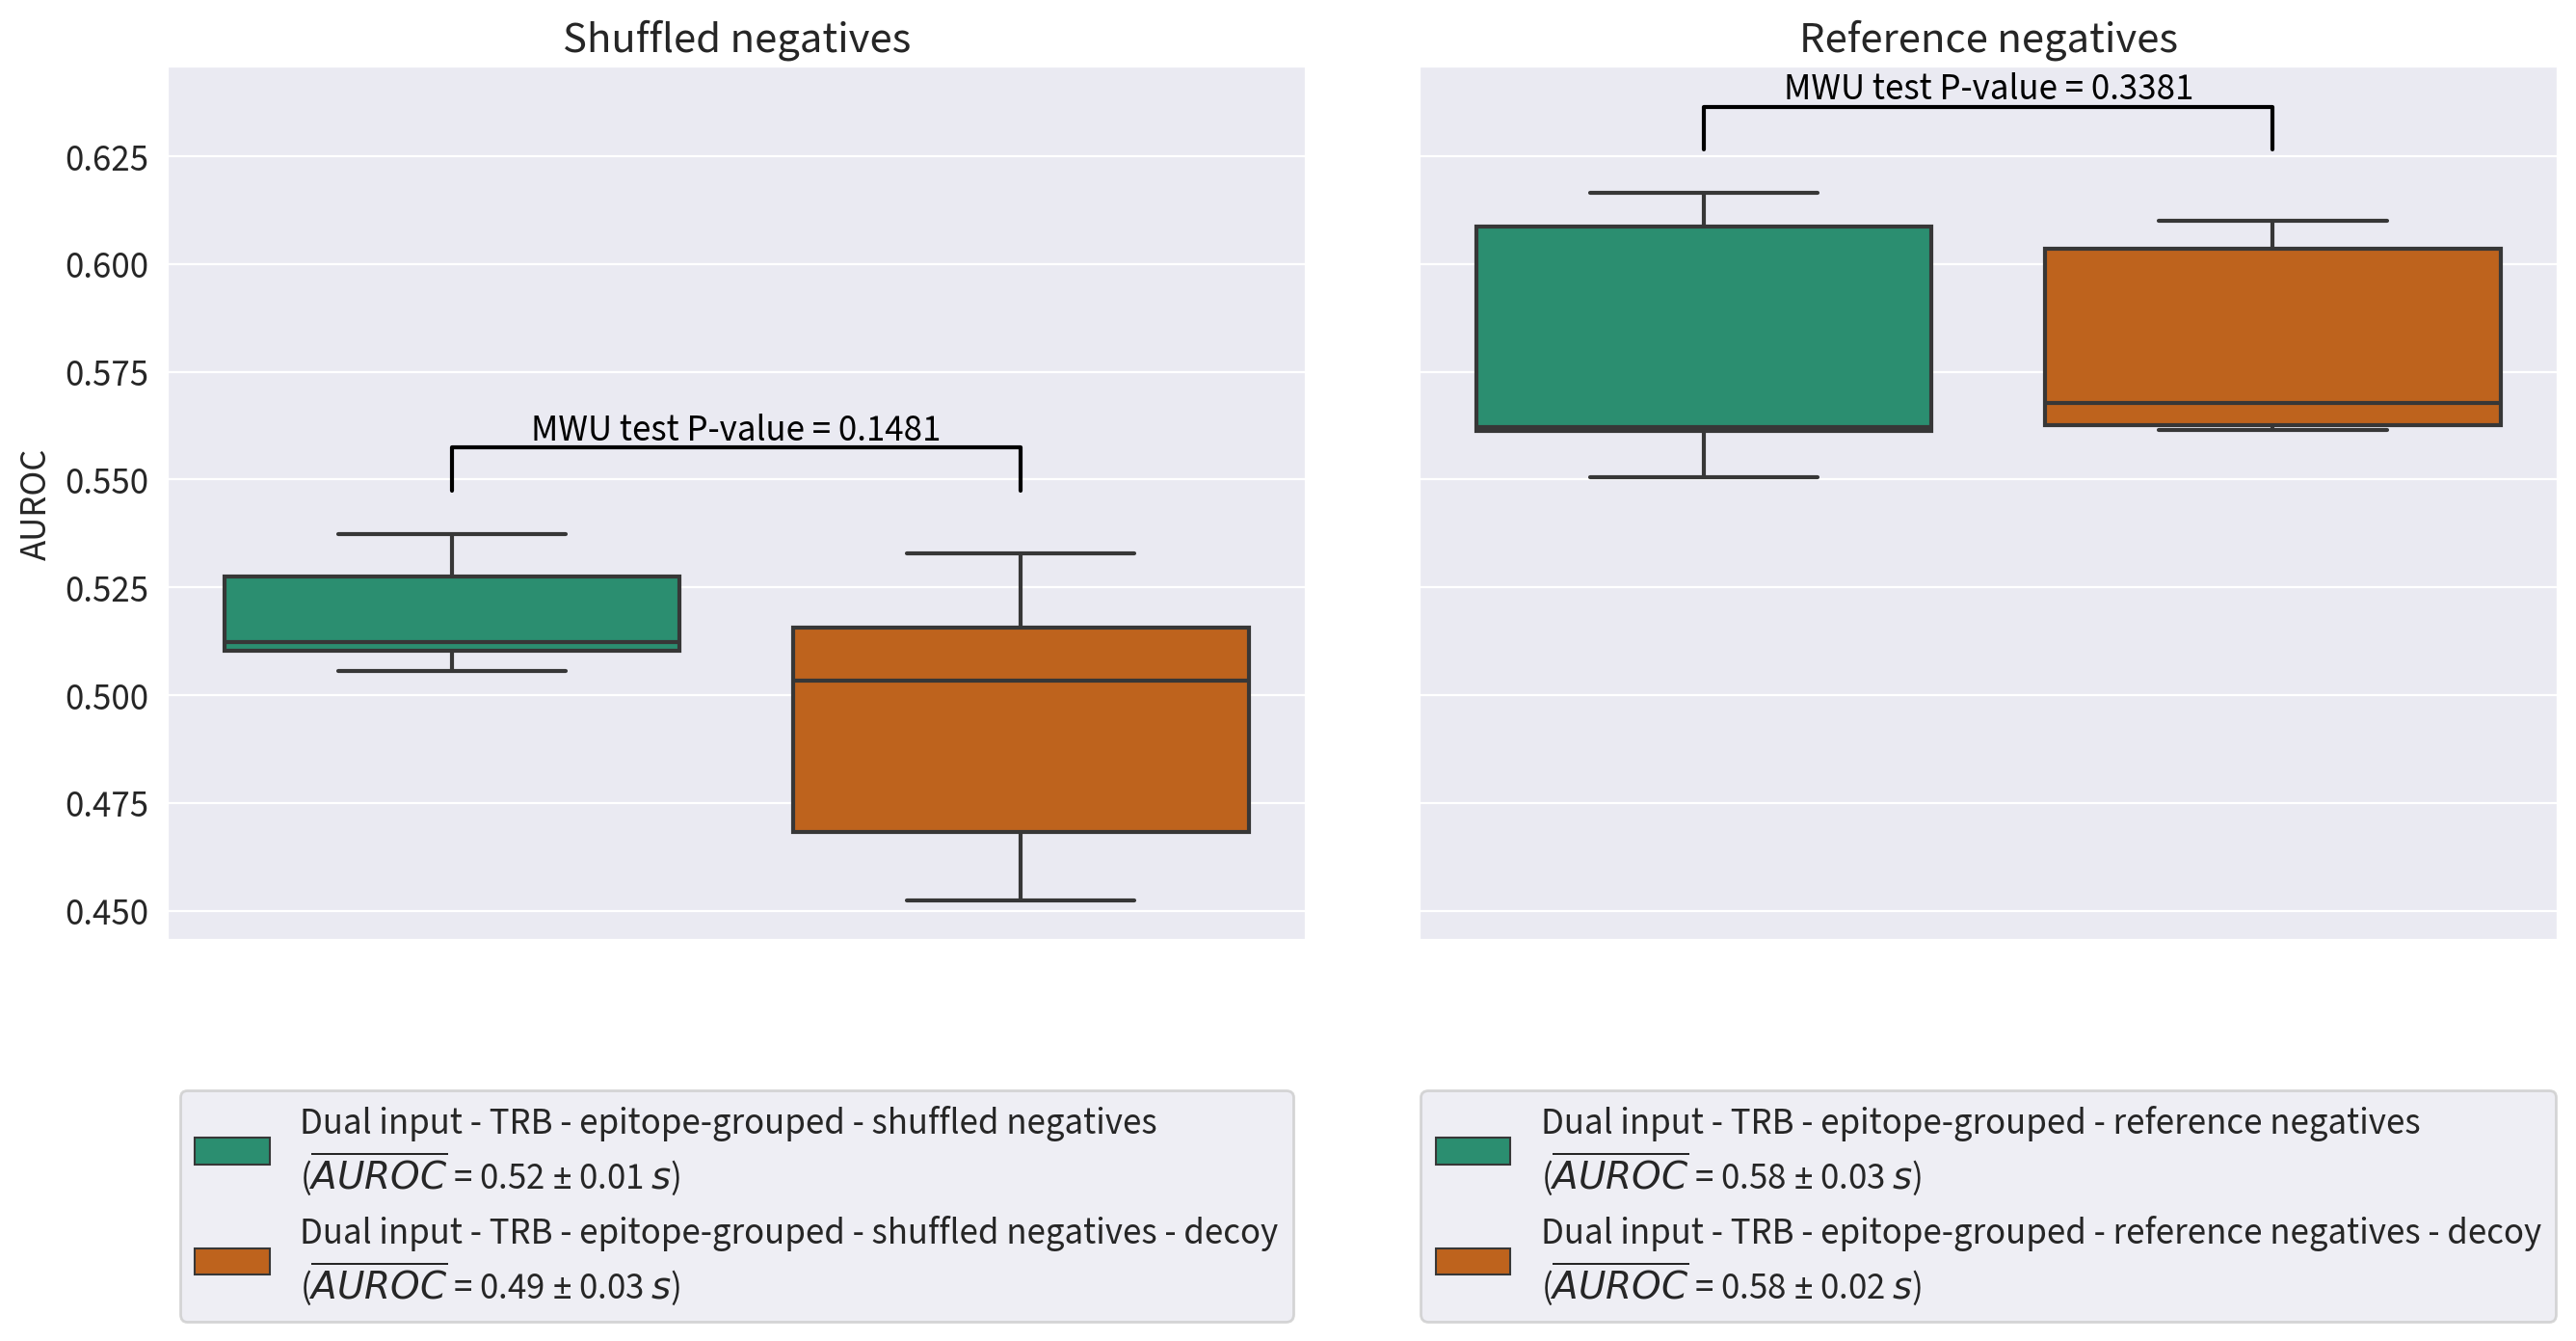

In [29]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

# plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .01, .01, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)


## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + .01, .01, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-downstrong-shufflenegref-dual-decoy-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-downstrong-shufflenegref-dual-decoy-roc-boxplot.png", bbox_inches="tight")

In [30]:
scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]

0.33805165701157347

In [31]:
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]

[i for i in auroc_lists[0]]

[0.5612637846921588,
 0.6165059854383158,
 0.5621758743595455,
 0.608738583203386,
 0.5505140343060815]

In [32]:
[i for i in auroc_lists[1]]

[0.5615735249385385,
 0.6035619572247051,
 0.5677745600356428,
 0.6100261750946758,
 0.5626701381153931]

## Interaction map - kfold

In [36]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-5fold-shufflenegref-map-decoy"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

array(['Interaction map - TRB - reference negatives',
       'Interaction map - TRB - reference negatives - decoy',
       'Interaction map - TRB - shuffled negatives',
       'Interaction map - TRB - shuffled negatives - decoy'], dtype=object)

In [37]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

negref = ['Interaction map - TRB - reference negatives',
       'Interaction map - TRB - reference negatives - decoy']
shuffle = ['Interaction map - TRB - shuffled negatives',
       'Interaction map - TRB - shuffled negatives - decoy']

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


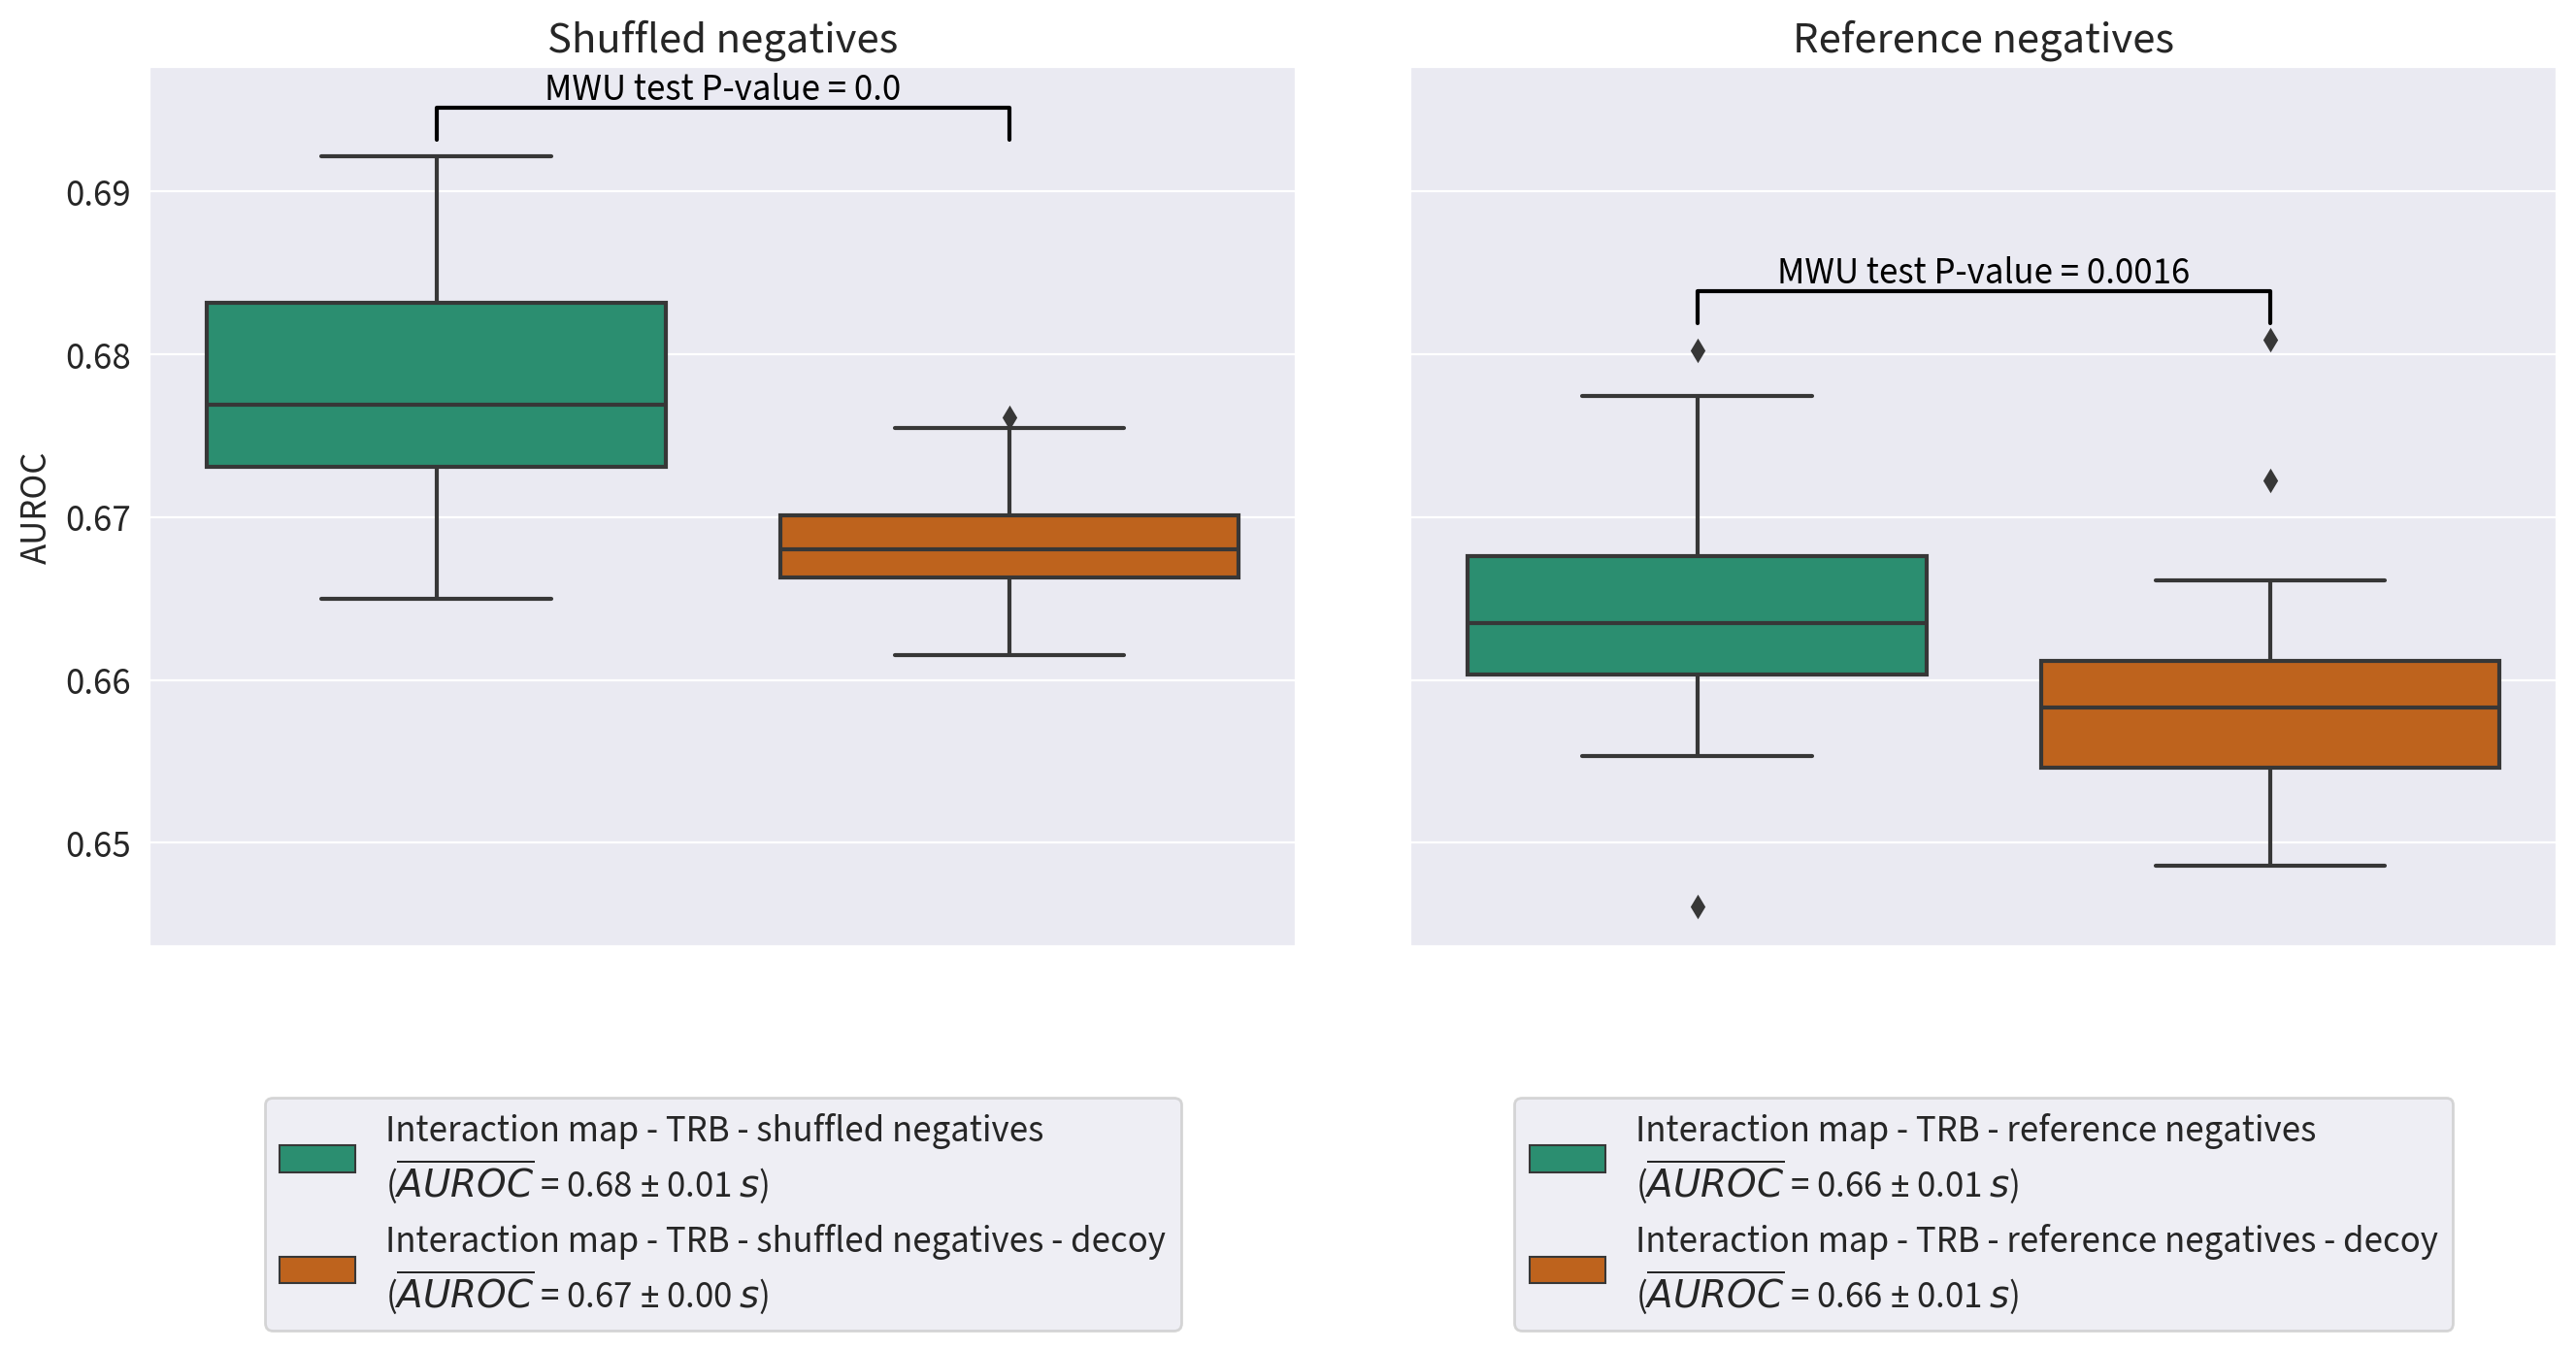

In [43]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

# plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .001, .002, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)


## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + .001, .002, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-repeated5fold-shufflenegref-map-decoy-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-repeated5fold-shufflenegref-map-decoy-roc-boxplot.png", bbox_inches="tight")

In [44]:
scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]

0.0015928174852030076

In [45]:
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]

[i for i in auroc_lists[0]]

[0.6553274924360248,
 0.6757819554942769,
 0.6568780696522059,
 0.6625226204301142,
 0.6597306058573664,
 0.669431138341871,
 0.6660416580734198,
 0.6603177315080848,
 0.6679727137934126,
 0.6651904504605219,
 0.6634784039745381,
 0.6608494917155813,
 0.6619942976206801,
 0.6774626343091413,
 0.6460803067825849,
 0.6630650006446186,
 0.6604866613648521,
 0.6591975138745988,
 0.6654989859811238,
 0.6684487902408187,
 0.6669859290292619,
 0.6802783368343239,
 0.6652694777377588,
 0.6676049827996424,
 0.6554254625402918]

In [46]:
[i for i in auroc_lists[1]]

[0.6587600296250523,
 0.6592686925900394,
 0.6530126483701447,
 0.6559990560589217,
 0.6507249670864694,
 0.6644869858822963,
 0.6565419167405064,
 0.6583301712821852,
 0.6624398830811161,
 0.658396837522436,
 0.6580388138487813,
 0.6595642162005582,
 0.6567740719101928,
 0.6809071811158927,
 0.6505560210704291,
 0.6533486501639367,
 0.6545908770528072,
 0.6603316017926811,
 0.6541891289921946,
 0.6722663751356768,
 0.6661354250222885,
 0.6611613371323494,
 0.6580716383192199,
 0.6629618054425523,
 0.6486160744784583]

# TRA TRB comparisons

## Epitope-grouped

In [12]:
from src.visualisation.plot import (
    derive_roc,
    derive_pr,
    plot_predictions,
    consolidate_all,
    concatenate,
#     consolidate_auc,
#     plot_metrics,
    plot_roc_pr,
    plot_metrics,
    plot_loss,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix
)

In [89]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate"

In [90]:
fit_dir = directory / "Interaction map - TRB - epitope-grouped - shuffled negatives - TRA evaluation/"

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


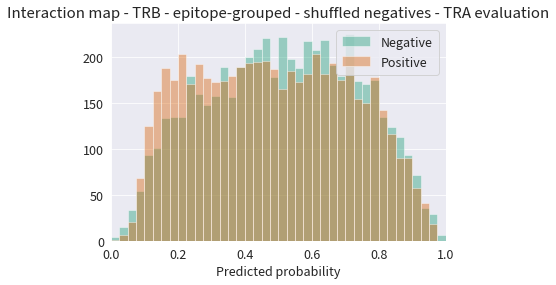

In [91]:
# read predictions from csv
predictions = pd.read_csv(fit_dir / "predictions.csv", sep=",")
y_pred, y_true = predictions.y_pred, predictions.y_true

derive_roc(fit_dir, y_true, y_pred, force=True)
derive_pr(fit_dir, y_true, y_pred, force=True)

plot_predictions(fit_dir)

'SourceSansPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/src/visualisation/plot.py:595: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  bbox_inches="tight",
'SourceSansPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/pieter/miniconda3/envs/deepTCR/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


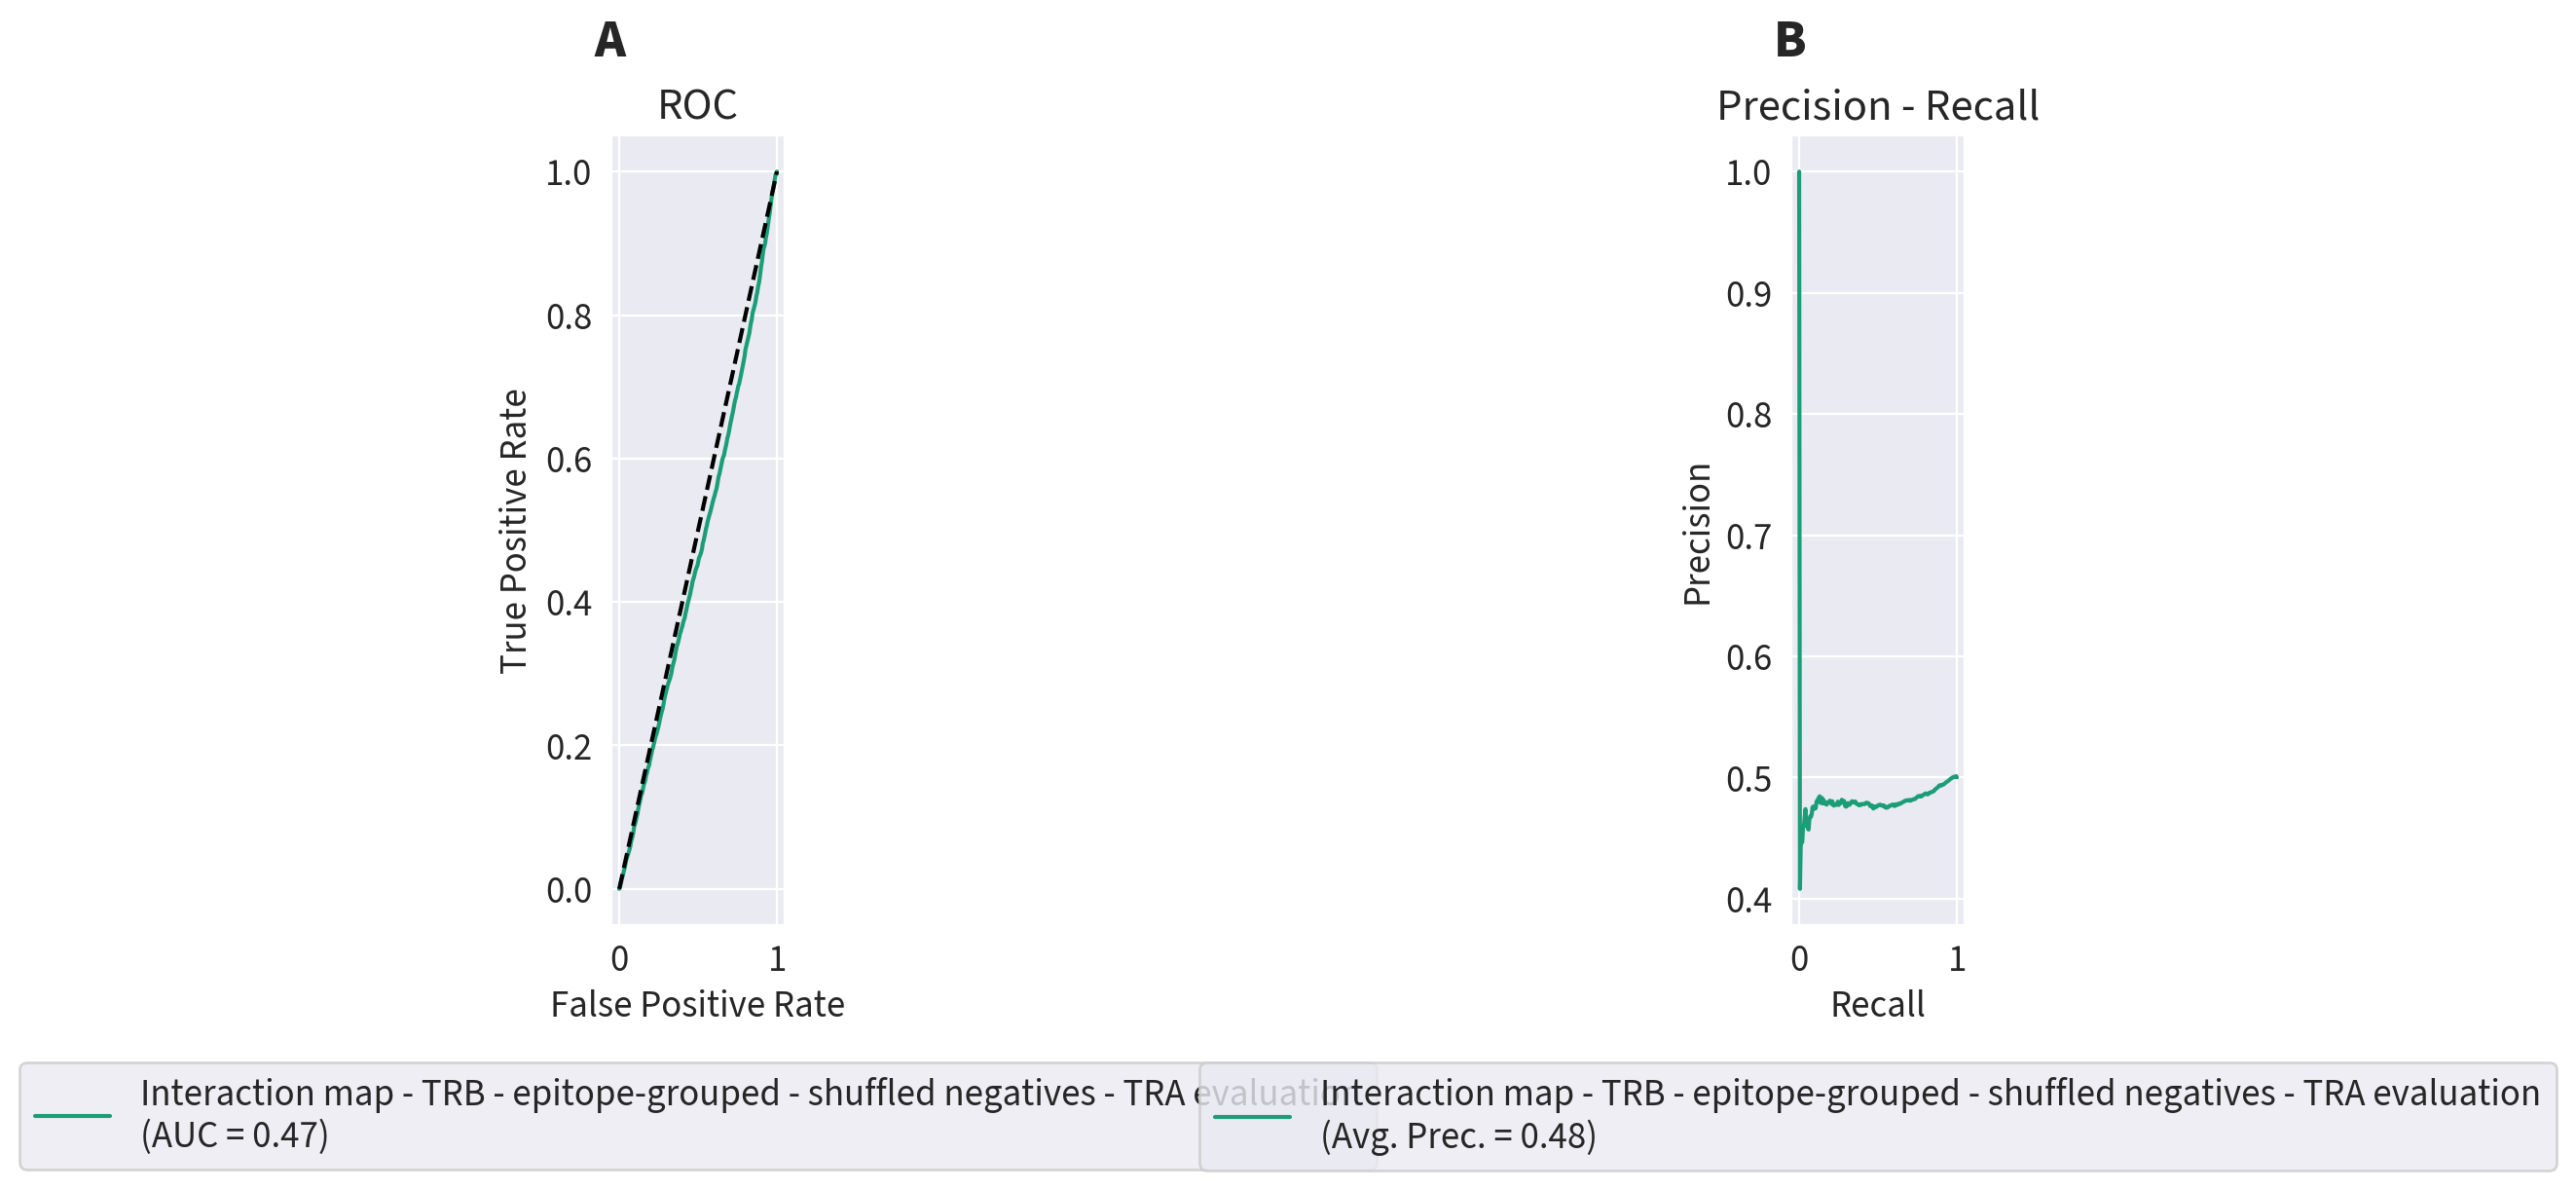

<Figure size 460.8x460.8 with 0 Axes>

In [92]:
plot_roc_pr(fit_dir)

In [97]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

def get_output_path(directory, title, extension=".pdf"):
    return os.path.join(directory, title + extension)

def plot_roc_pr(directory):

    # define facet figure
    fig = plt.figure(
        constrained_layout=True,
        dpi=200,
        figsize=(14, 8),  # (12, 6),  # (14,8) is better for overlapping legends
    )
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    # create roc plot
    roc_success = plot_roc(directory, ax=ax1, legend=True)

    # create precision-recall plot
    pr_success = plot_precision_recall(directory, ax=ax2, legend=True)

    # skip if either roc or pr are not present
    if not roc_success or not pr_success:
        return

    # add labels
    import string

    for n, ax in enumerate(fig.axes):
        ax.text(
            -0.1,
            1.1,
            string.ascii_uppercase[n],
            transform=ax.transAxes,
            size=20,
            weight="bold",
        )

    # for ax in fig.axes:
    #     plt.setp(
    #         ax.get_legend().get_texts(), fontsize="10.5"
    #     )  # "13")  # for legend text
    #     # plt.setp(ax.get_legend().get_title(), fontsize="11")  # "13")
    #     # ax.axis("equal")

    fig.savefig(
        get_output_path(
            directory,
            "roc-pr" + "-" + str(Path(directory).absolute().name).replace(" ", "-"),
        ),
        bbox_inches="tight",
    )

In [98]:
for d in [x for x in Path(directory).iterdir() if x.is_dir()]:
    if d.name.startswith("_"):
        print(
            "Found directory:", directory, "which starts with underscore, skipping"
        )
        continue

    print(f"Consolidating metrics of {directory}")
    consolidate_all(d, force=True)

print(f"Concatenating metrics of root: {directory}")

FILES = [
    ("metrics.csv", "epoch"),
    ("roc.csv", "index"),
    ("auc.csv", "index"),
    ("precision_recall.csv", "index"),
    ("average_precision.csv", "index"),
    ("predictions.csv", None),
]

for file, col in FILES + [("auc_per_iteration.csv", "index")]:
    # Can't concatenate unagregated csv's
    if col is None:
        continue

    output_path = directory / file

    concatenate(directory, file)

print("Plotting")
y_lim_loss = None
plot_metrics(directory, y_lim_loss=y_lim_loss)
plt.close("all")
plot_loss(directory, y_lim_loss=y_lim_loss)
plt.close("all")
plot_roc(directory)
plt.close("all")
plot_precision_recall(directory)
plt.close("all")
plot_roc_pr(directory)
plt.close("all")
plot_predictions(directory)
plt.close("all")
plot_confusion_matrix(directory)
plt.close("all")
# plot_roc_boxplot(directory)
# plt.close("all")

Consolidating metrics of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate
Consolidating metrics of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate
Consolidating metrics of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate
No metrics.csv found in any subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate/Interaction map - TRB - epitope-grouped - shuffled negatives - TRA evaluation, skipping...
No roc.csv found in any subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 f

/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate/predictions.csv not found, skipping predictions plot...
/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate/predictions.csv not found, skipping confusion matrix plot...


In [99]:
print("Ignoring min_iterations since grouped=True.")
min_iterations = 1
min_obs = 30

df_list = list()

for d in [x for x in Path(directory).iterdir() if x.is_dir()]:
    if d.name.startswith("_"):
        print(
            "Found directory:", d, "which starts with underscore, skipping"
        )
        continue

    print(
        f"Retrieving metrics per epitope from evaluate_test_folds subdirectory of {d}"
    )

    eval_list = [
        i
        for i in d.rglob("*metrics_per_epitope*.csv")
        if not i.parent.name.startswith("_")
    ]

    assert (
        len(eval_list) == 1
    ), f"Found no or multiple evaluate_test_folds.csv files in {directory}, aborting..."

    df = pd.read_csv(eval_list[0])
    df["type"] = d.name
    df_list.append(df)

df_concat = pd.concat(df_list)

# get number of testing data points
df_concat["n"] = df_concat.pos_data + df_concat.neg_data

# minimum number of data points required to include
df_concat = df_concat[df_concat["n"] >= min_obs].reset_index(drop=True)

# create output name
import os
output_path = os.path.join(
    directory,
    "roc_per_epitope-"
    + "min_obs"
    + str(min_obs)
    + "-min_iterations"
    + str(min_iterations)
    + "-"
    + str(Path(directory).absolute().name).replace(" ", "-")
    + ".pdf",
)

# roc_per_epitope(
#     eval_df=df_concat,
#     output_path=output_path,
#     min_iterations=min_iterations,
#     comparison=True,
#     grouped=grouped,
#     decoy=decoy,
# )

eval_df = df_concat

# only include epitopes that occurred in at least m iterations (= folds within a model)
eval_df = eval_df[
        eval_df.groupby(["epitope", "type"])["epitope"].transform("count")
        >= min_iterations
    ]
hue = "type"
    
# omit all epitopes for which the highest auroc is lower than 0.5
eval_df = eval_df[
        eval_df.groupby("epitope")["roc_auc"].transform(lambda x: max(x) > 0.5)
    ]

# only include epitopes that have m iterations in each of the different models
# n_types = eval_df.type.nunique()
# eval_df = eval_df[
#     eval_df.groupby("epitope").type.transform(
#         lambda x: x.nunique() == n_types
#     )
# ]

fig, ax = plt.subplots(
    constrained_layout=True, dpi=200, figsize=(14, 6)
)  # (16, 8))

plotter = sns.barplot# if grouped else sns.boxplot

# sort by highest mean auroc across types
order = (
    eval_df.groupby(["epitope", "type"])["roc_auc"]
    .mean()
    .sort_values(ascending=False)
    .groupby(level=0)
    .head(1)
    .index.get_level_values(0)
)

def get_palette(df, value):
    unique_values = sorted(df[value].unique())

    # if len(unique_values) < 8:
    #     pal = custom_palette
    # else:
    #     pal = sns.color_palette("Set1", n_colors=len(unique_values))

    pal = sns.color_palette("Dark2", n_colors=len(unique_values))

    palette_dict = dict(zip(unique_values, pal))
    return palette_dict

colour_palette = get_palette(eval_df, "type")

plotter(
    x="epitope",
    y="roc_auc",
    hue=hue,
    data=eval_df,
    palette=colour_palette,
    order=order,
    # alpha=0.7
    # boxprops=dict(alpha=0.7),
)

# remove legend title (do not use for single model type plot, this will result in an empty rectangle)
l = ax.legend()
l.set_title("")

plt.setp(
    ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default",
)

ax.set(ylim=(eval_df.roc_auc.min() * 0.9, 1))

ax.set_ylabel("AUROC")
ax.set_xlabel("Epitope")

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

plt.yticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.1f"))

plt.savefig(output_path, bbox_inches="tight")

plt.close("all")

Ignoring min_iterations since grouped=True.
Retrieving metrics per epitope from evaluate_test_folds subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate/Interaction map - TRA TRB - epitope-grouped - shuffled negatives
Retrieving metrics per epitope from evaluate_test_folds subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate/Interaction map - TRB - epitope-grouped - shuffled negatives
Retrieving metrics per epitope from evaluate_test_folds subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-epitopegrouped-shuffle-map-strongdown-evaluate/Interaction map - TRB - epitope-grouped - shuffled negatives - TRA evaluation
Found directory: /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTC

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


## Known-epitope

    python ../../../../src/scripts/evaluate/evaluate.py --model_type padded --min_length_cdr3 10 --max_length_cdr3 20 --min_length_epitope 8 --max_length_epitope 11 --features 'hydrophob,isoelectric,mass,hydrophil' --operator absdiff --model 2020-07-30_11-30-27_trbmhci-shuffle-padded-b32-lre4-reg001.h5 --name train-trb-fit-tra --data_path ../../../../data/interim/vdjdb-2019-08-08/vdjdb-human-tra-mhci-no10x-size.csv --neg_shuffle --full_dataset_path ../../../../data/interim/vdjdb-2019-08-08/vdjdb-human.csv --per_epitope --train_dataset iteration_no_validation/train.csv

In [13]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate"

In [14]:
fit_dir = directory / "Interaction map - TRB - shuffled negatives - TRA evaluation/"

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


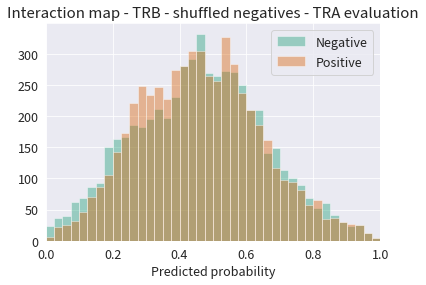

In [15]:
# read predictions from csv
predictions = pd.read_csv(fit_dir / "predictions.csv", sep=",")
y_pred, y_true = predictions.y_pred, predictions.y_true

derive_roc(fit_dir, y_true, y_pred, force=True)
derive_pr(fit_dir, y_true, y_pred, force=True)

plot_predictions(fit_dir)

'SourceSansPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


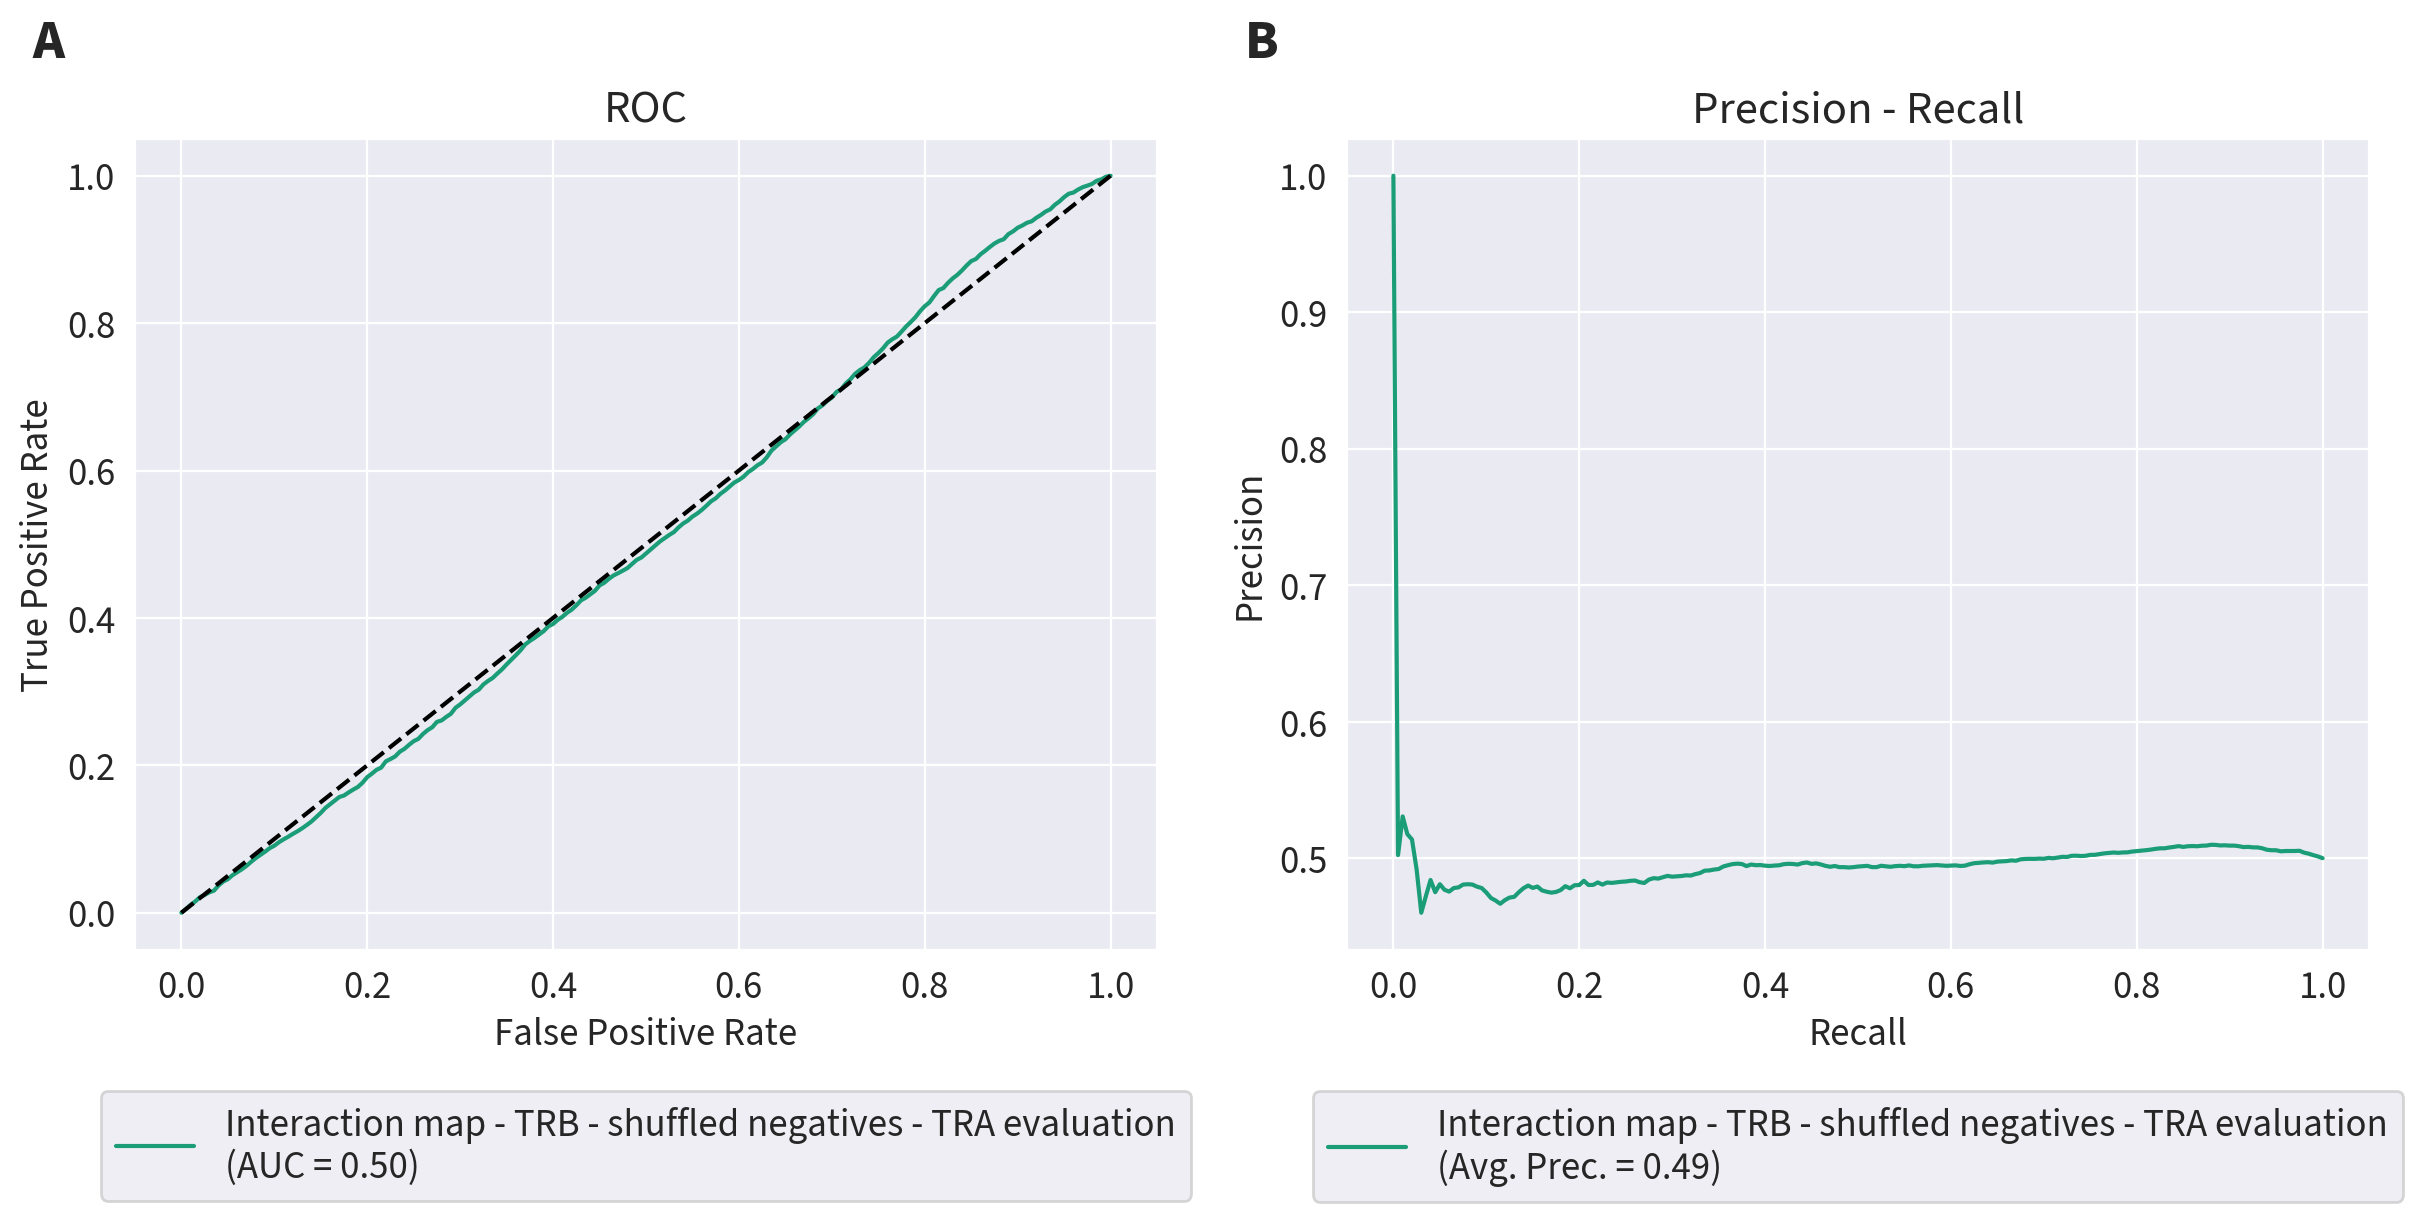

<Figure size 460.8x460.8 with 0 Axes>

In [16]:
plot_roc_pr(fit_dir)

In [17]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

def get_output_path(directory, title, extension=".pdf"):
    return os.path.join(directory, title + extension)

def plot_roc_pr(directory):

    # define facet figure
    fig = plt.figure(
        constrained_layout=True,
        dpi=200,
        figsize=(14, 8),  # (12, 6),  # (14,8) is better for overlapping legends
    )
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    # create roc plot
    roc_success = plot_roc(directory, ax=ax1, legend=True)

    # create precision-recall plot
    pr_success = plot_precision_recall(directory, ax=ax2, legend=True)

    # skip if either roc or pr are not present
    if not roc_success or not pr_success:
        return

    # add labels
    import string

    for n, ax in enumerate(fig.axes):
        ax.text(
            -0.1,
            1.1,
            string.ascii_uppercase[n],
            transform=ax.transAxes,
            size=20,
            weight="bold",
        )

    # for ax in fig.axes:
    #     plt.setp(
    #         ax.get_legend().get_texts(), fontsize="10.5"
    #     )  # "13")  # for legend text
    #     # plt.setp(ax.get_legend().get_title(), fontsize="11")  # "13")
    #     # ax.axis("equal")

    fig.savefig(
        get_output_path(
            directory,
            "roc-pr" + "-" + str(Path(directory).absolute().name).replace(" ", "-"),
        ),
        bbox_inches="tight",
    )

In [20]:
import os

for d in [x for x in Path(directory).iterdir() if x.is_dir()]:
    if d.name.startswith("_"):
        print(
            "Found directory:", directory, "which starts with underscore, skipping"
        )
        continue

    print(f"Consolidating metrics of {directory}")
    consolidate_all(d, force=True)

print(f"Concatenating metrics of root: {directory}")

FILES = [
    ("metrics.csv", "epoch"),
    ("roc.csv", "index"),
    ("auc.csv", "index"),
    ("precision_recall.csv", "index"),
    ("average_precision.csv", "index"),
    ("predictions.csv", None),
]

for file, col in FILES + [("auc_per_iteration.csv", "index")]:
    # Can't concatenate unagregated csv's
    if col is None:
        continue

    output_path = directory / file

    concatenate(directory, file)

print("Plotting")
y_lim_loss = None
plot_metrics(directory, y_lim_loss=y_lim_loss)
plt.close("all")
plot_loss(directory, y_lim_loss=y_lim_loss)
plt.close("all")
plot_roc(directory)
plt.close("all")
plot_precision_recall(directory)
plt.close("all")
plot_roc_pr(directory)
plt.close("all")
plot_predictions(directory)
plt.close("all")
plot_confusion_matrix(directory)
plt.close("all")
# plot_roc_boxplot(directory)
# plt.close("all")

Consolidating metrics of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate
Consolidating metrics of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate
Consolidating metrics of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate
No metrics.csv found in any subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/Interaction map - TRB - shuffled negatives - TRA evaluation, skipping...
No roc.csv found in any subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/Interaction map - TRB - shuffled negatives - TRA evaluation, skipping...
No auc.csv found in any subdirector

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 f

/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/predictions.csv not found, skipping predictions plot...
/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/predictions.csv not found, skipping confusion matrix plot...


In [19]:
print("Ignoring min_iterations since grouped=True.")
min_iterations = 1
min_obs = 30

df_list = list()

for d in [x for x in Path(directory).iterdir() if x.is_dir()]:
    if d.name.startswith("_"):
        print(
            "Found directory:", d, "which starts with underscore, skipping"
        )
        continue

    print(
        f"Retrieving metrics per epitope from evaluate_test_folds subdirectory of {d}"
    )

    eval_list = [
        i
        for i in d.rglob("*metrics_per_epitope*.csv")
        if not i.parent.name.startswith("_")
    ]

    assert (
        len(eval_list) == 1
    ), f"Found no or multiple evaluate_test_folds.csv files in {directory}, aborting..."

    df = pd.read_csv(eval_list[0])
    df["type"] = d.name
    df_list.append(df)

df_concat = pd.concat(df_list)

# get number of testing data points
df_concat["n"] = df_concat.pos_data + df_concat.neg_data

# minimum number of data points required to include
df_concat = df_concat[df_concat["n"] >= min_obs].reset_index(drop=True)

# create output name
import os
output_path = os.path.join(
    directory,
    "roc_per_epitope-"
    + "min_obs"
    + str(min_obs)
    + "-min_iterations"
    + str(min_iterations)
    + "-"
    + str(Path(directory).absolute().name).replace(" ", "-")
    + ".pdf",
)

# roc_per_epitope(
#     eval_df=df_concat,
#     output_path=output_path,
#     min_iterations=min_iterations,
#     comparison=True,
#     grouped=grouped,
#     decoy=decoy,
# )

eval_df = df_concat

# only include epitopes that occurred in at least m iterations (= folds within a model)
eval_df = eval_df[
        eval_df.groupby(["epitope", "type"])["epitope"].transform("count")
        >= min_iterations
    ]
hue = "type"
    
# omit all epitopes for which the highest auroc is lower than 0.5
eval_df = eval_df[
        eval_df.groupby("epitope")["roc_auc"].transform(lambda x: max(x) > 0.5)
    ]

# only include epitopes that have m iterations in each of the different models
# n_types = eval_df.type.nunique()
# eval_df = eval_df[
#     eval_df.groupby("epitope").type.transform(
#         lambda x: x.nunique() == n_types
#     )
# ]

fig, ax = plt.subplots(
    constrained_layout=True, dpi=200, figsize=(14, 6)
)  # (16, 8))

plotter = sns.barplot# if grouped else sns.boxplot

# sort by highest mean auroc across types
order = (
    eval_df.groupby(["epitope", "type"])["roc_auc"]
    .mean()
    .sort_values(ascending=False)
    .groupby(level=0)
    .head(1)
    .index.get_level_values(0)
)

def get_palette(df, value):
    unique_values = sorted(df[value].unique())

    # if len(unique_values) < 8:
    #     pal = custom_palette
    # else:
    #     pal = sns.color_palette("Set1", n_colors=len(unique_values))

    pal = sns.color_palette("Dark2", n_colors=len(unique_values))

    palette_dict = dict(zip(unique_values, pal))
    return palette_dict

colour_palette = get_palette(eval_df, "type")

plotter(
    x="epitope",
    y="roc_auc",
    hue=hue,
    data=eval_df,
    palette=colour_palette,
    order=order,
    # alpha=0.7
    # boxprops=dict(alpha=0.7),
)

# remove legend title (do not use for single model type plot, this will result in an empty rectangle)
l = ax.legend()
l.set_title("")

plt.setp(
    ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default",
)

ax.set(ylim=(eval_df.roc_auc.min() * 0.9, 1))

ax.set_ylabel("AUROC")
ax.set_xlabel("Epitope")

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

plt.yticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.1f"))

plt.savefig(output_path, bbox_inches="tight")

plt.close("all")

Ignoring min_iterations since grouped=True.
Retrieving metrics per epitope from evaluate_test_folds subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/Interaction map - TRA TRB - shuffled negatives
Retrieving metrics per epitope from evaluate_test_folds subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/Interaction map - TRB - shuffled negatives
Retrieving metrics per epitope from evaluate_test_folds subdirectory of /media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/comparisons/tratrb-5fold-shuffle-map-evaluate/Interaction map - TRB - shuffled negatives - TRA evaluation


'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


# COVID data

In [6]:
from src.visualisation.plot import (
    derive_roc,
    derive_pr,
    plot_predictions,
    consolidate_all,
    concatenate,
#     consolidate_auc,
#     plot_metrics,
    plot_roc_pr,
    plot_metrics,
    plot_loss,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix
)

In [7]:
fit_dir = PROJECT_ROOT / "models/models-calcua/models-full/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001/iteration_no_validation/Adaptive - SARS-CoV-2"

In [7]:
# read predictions from csv
predictions = pd.read_csv(fit_dir / "predictions.csv", sep=",")
y_pred, y_true = predictions.y_pred, predictions.y_true

derive_roc(fit_dir, y_true, y_pred, force=True)
derive_pr(fit_dir, y_true, y_pred, force=True)

plot_predictions(fit_dir)

y_lim_loss = None
# plot_metrics(directory, y_lim_loss=y_lim_loss)
# plt.close("all")
plot_loss(fit_dir, y_lim_loss=y_lim_loss)
plt.close("all")
plot_roc(fit_dir)
plt.close("all")
plot_precision_recall(fit_dir)
plt.close("all")
plot_roc_pr(fit_dir)
plt.close("all")
plot_predictions(fit_dir)
plt.close("all")
plot_confusion_matrix(fit_dir)
plt.close("all")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


No loss values found in metrics.csv, skipping...


'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. T

In [27]:
# from matplotlib.gridspec import GridSpec
# from matplotlib.patches import Patch
# import matplotlib.pyplot as plt
# import os

# def get_output_path(directory, title, extension=".pdf"):
#     return os.path.join(directory, title + extension)

# def plot_roc_pr(directory):

#     # define facet figure
#     fig = plt.figure(
#         constrained_layout=True,
#         dpi=200,
#         figsize=(14, 8),  # (12, 6),  # (14,8) is better for overlapping legends
#     )
#     gs = GridSpec(1, 2, figure=fig)
#     ax1 = fig.add_subplot(gs[0, 0])
#     ax2 = fig.add_subplot(gs[0, 1])

#     # create roc plot
#     roc_success = plot_roc(directory, ax=ax1, legend=True)

#     # create precision-recall plot
#     pr_success = plot_precision_recall(directory, ax=ax2, legend=True)

#     # skip if either roc or pr are not present
#     if not roc_success or not pr_success:
#         return

#     # add labels
#     import string

#     for n, ax in enumerate(fig.axes):
#         ax.text(
#             -0.1,
#             1.1,
#             string.ascii_uppercase[n],
#             transform=ax.transAxes,
#             size=20,
#             weight="bold",
#         )

#     # for ax in fig.axes:
#     #     plt.setp(
#     #         ax.get_legend().get_texts(), fontsize="10.5"
#     #     )  # "13")  # for legend text
#     #     # plt.setp(ax.get_legend().get_title(), fontsize="11")  # "13")
#     #     # ax.axis("equal")

#     fig.savefig(
#         get_output_path(
#             directory,
#             "roc-pr" + "-" + str(Path(directory).absolute().name).replace(" ", "-"),
#         ),
#         bbox_inches="tight",
#     )

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


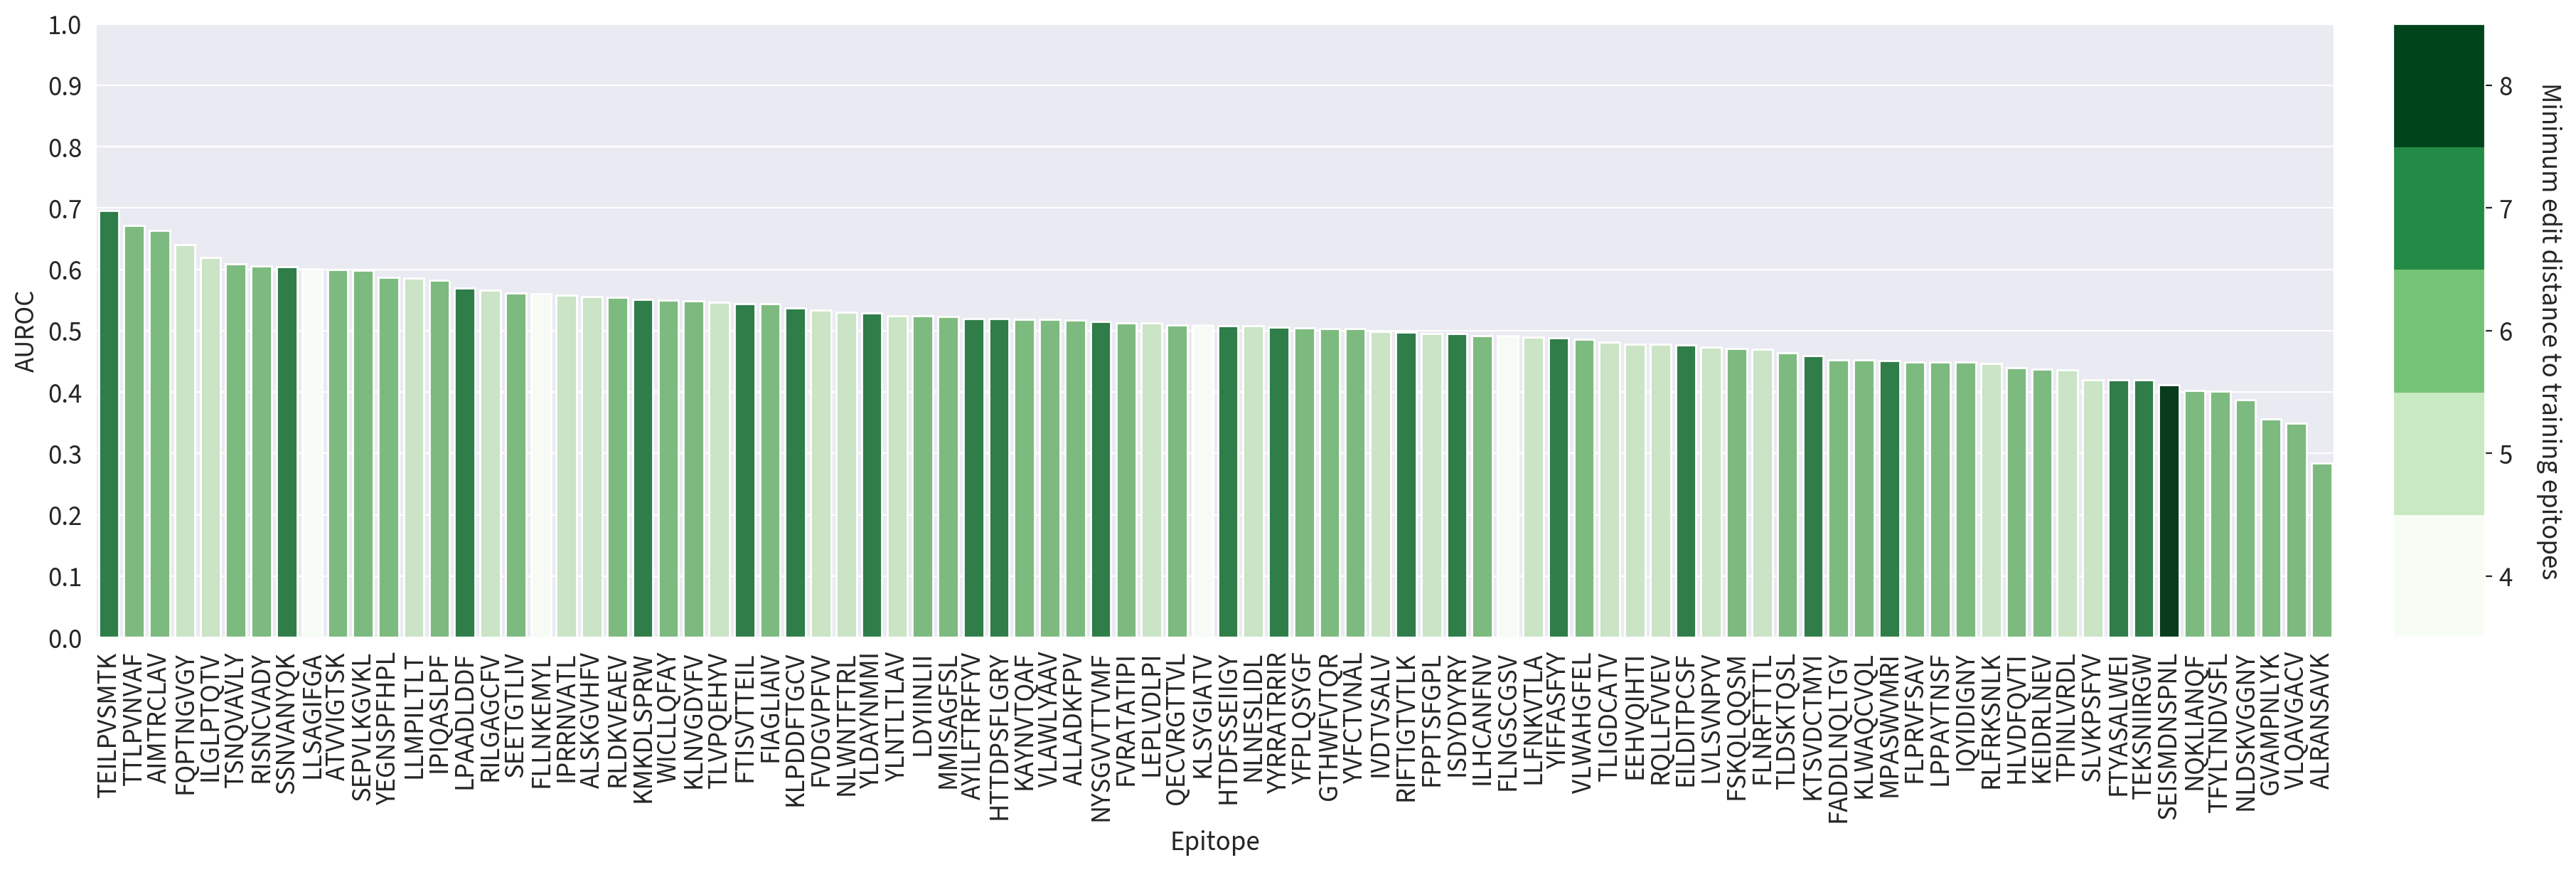

In [16]:
import os

min_obs = 30
min_iterations = 1

eval_df = pd.read_csv(fit_dir / "metrics_per_epitope.csv", sep=',')

# get number of testing data points
eval_df["n"] = eval_df.pos_data + eval_df.neg_data

# minimum number of data points required to include
eval_df = eval_df[eval_df["n"] >= min_obs].reset_index(drop=True)

# create output name
output_path = os.path.join(
    fit_dir,
    "roc_per_epitope-"
    + "min_obs"
    + str(min_obs)
    + "-"
    + str(Path(fit_dir).absolute().name).replace(" ", "-")
    + ".pdf",
)

eval_df = eval_df[
    eval_df.groupby("epitope")["epitope"].transform("count") >= min_iterations
]
hue = None

fig, ax = plt.subplots(
    constrained_layout=True, dpi=200, figsize=(18, 6)
)  # (16, 8))

# set order

order = (
    eval_df.groupby(["epitope"])["roc_auc"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# # colour_palette = sns.color_palette("Dark2")[0]
# # set color
import matplotlib as mpl
dist = "min_dist"
# my_cmap = plt.cm.get_cmap("Greens")
# data_color = eval_df[dist]

# # NOTE: colors are simply passed in their direct order to seaborn, i.e. the order argument is not utilised.
# # consequently the colors should be sorted manually
eval_df["epitope"] = pd.Categorical(eval_df["epitope"], order)
colors = mpl.cm.ScalarMappable(cmap="Greens").to_rgba(
    eval_df.sort_values("epitope")[dist]
)
# sm = mpl.cm.ScalarMappable(
#     cmap=my_cmap, norm=plt.Normalize(min(data_color), max(data_color))
# )
# sm.set_array([])

# cbar = plt.colorbar(sm, ticks=np.arange(eval_df[dist].min(), eval_df[dist].max()+1))
# cbar.set_label(
#     "Minimum edit distance to training epitopes", rotation=270, labelpad=25
# )

# https://stackoverflow.com/questions/53360879/create-a-discrete-colorbar-in-matplotlib
cmap = plt.cm.get_cmap("Greens")
norm = mpl.colors.BoundaryNorm(np.arange(eval_df[dist].min()-.5, eval_df[dist].max()+1.5), cmap.N) 
sm = mpl.cm.ScalarMappable(
    cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ticks=np.arange(eval_df[dist].min(), eval_df[dist].max()+1))
cbar.set_label(
    "Minimum edit distance to training epitopes", rotation=270, labelpad=25
)

g = sns.barplot(
            x="epitope",
            y="roc_auc",
            # hue=hue,
            data=eval_df,
            # color=colour_palette,
            palette=colors,
            order=order,
            # alpha=0.7,
        )

plt.setp(
    ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default",
)

# ax.set(ylim=(eval_df.roc_auc.min() * 0.9, 1))

ax.set_ylabel("AUROC")
ax.set_xlabel("Epitope")

plt.yticks(np.arange(0, 1.1, 0.1))

plt.savefig(output_path, bbox_inches="tight")

# Downsampling comparisons

## Epitope-grouped

In [109]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-epitopegrouped-downcomp-shuffle-map"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

df.loc[df["type"] == 'Interaction map - TRB - epitope-grouped - shuffled negatives - no downsampling', "order"] = 0
df.loc[df["type"] == 'Interaction map - TRB - epitope-grouped - shuffled negatives - moderate downsampling', "order"] = 1
df.loc[df["type"] == 'Interaction map - TRB - epitope-grouped - shuffled negatives - strong downsampling', "order"] = 2

In [110]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

# negref = ['Dual input - TRB - epitope-grouped - reference negatives',
#        'Dual input - TRB - epitope-grouped - reference negatives - decoy']
# shuffle = ['Dual input - TRB - epitope-grouped - shuffled negatives',
#        'Dual input - TRB - epitope-grouped - shuffled negatives - decoy']

In [111]:
df

,auc,iteration,type,order,type-mean-std
0,0.523247,iteration_0,Interaction map - TRB - epitope-grouped - shuf...,1.0,Interaction map - TRB - epitope-grouped - shuf...
1,0.545221,iteration_1,Interaction map - TRB - epitope-grouped - shuf...,1.0,Interaction map - TRB - epitope-grouped - shuf...
2,0.497168,iteration_2,Interaction map - TRB - epitope-grouped - shuf...,1.0,Interaction map - TRB - epitope-grouped - shuf...
3,0.592706,iteration_3,Interaction map - TRB - epitope-grouped - shuf...,1.0,Interaction map - TRB - epitope-grouped - shuf...
4,0.541869,iteration_4,Interaction map - TRB - epitope-grouped - shuf...,1.0,Interaction map - TRB - epitope-grouped - shuf...
5,0.599631,iteration_0,Interaction map - TRB - epitope-grouped - shuf...,0.0,Interaction map - TRB - epitope-grouped - shuf...
6,0.600711,iteration_1,Interaction map - TRB - epitope-grouped - shuf...,0.0,Interaction map - TRB - epitope-grouped - shuf...
7,0.529844,iteration_2,Interaction map - TRB - epitope-grouped - shuf...,0.0,Interaction map - TRB - epitope-grouped - shuf...
8,0.528873,iteration_0,Interaction map - TRB - epitope-grouped - shuf...,2.0,Interaction map - TRB - epitope-grouped - shuf...
9,0.561908,iteration_1,Interaction map - TRB - epitope-grouped - shuf...,2.0,Interaction map - TRB - epitope-grouped - shuf...


'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


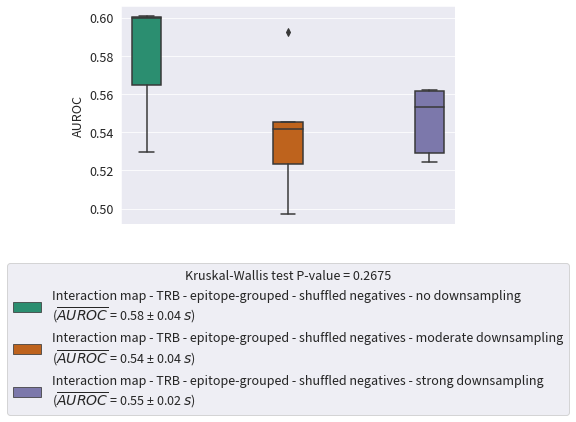

In [112]:
sns_plot = sns.boxplot(
        x="type-mean-std",
        y="auc",
        data=df.sort_values(by=["order"]),
#         order=sorted(df["type-mean-std"].unique()),
        palette=pal,
        hue="type-mean-std",
    )

plt.xlabel(None)
plt.ylabel("AUROC")
sns_plot.set(xticklabels=[])

auroc_lists = [df.loc[df["type"] == i, "auc"] for i in df["type"].unique()]
p = scipy.stats.kruskal(*auroc_lists)[1]

sns_plot.legend(title=f"Kruskal-Wallis test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))


plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-downcomp-shuffle-map-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-downcomp-shuffle-map-roc-boxplot.png", bbox_inches="tight")

## k-fold

In [114]:
directory = PROJECT_ROOT / "models/models-calcua/comparisons/trb-5fold-downcomp-shuffle-map"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

df.loc[df["type"] == 'Interaction map - TRB - shuffled negatives - no downsampling', "order"] = 0
df.loc[df["type"] == 'Interaction map - TRB - shuffled negatives - moderate downsampling', "order"] = 1
df.loc[df["type"] == 'Interaction map - TRB - shuffled negatives - strong downsampling', "order"] = 2

In [115]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

# negref = ['Dual input - TRB - epitope-grouped - reference negatives',
#        'Dual input - TRB - epitope-grouped - reference negatives - decoy']
# shuffle = ['Dual input - TRB - epitope-grouped - shuffled negatives',
#        'Dual input - TRB - epitope-grouped - shuffled negatives - decoy']

In [116]:
df

,auc,iteration,type,order,type-mean-std
0,0.673000,iteration_0,Interaction map - TRB - shuffled negatives - m...,1.0,Interaction map - TRB - shuffled negatives - m...
1,0.661705,iteration_1,Interaction map - TRB - shuffled negatives - m...,1.0,Interaction map - TRB - shuffled negatives - m...
2,0.667118,iteration_10,Interaction map - TRB - shuffled negatives - m...,1.0,Interaction map - TRB - shuffled negatives - m...
3,0.661511,iteration_11,Interaction map - TRB - shuffled negatives - m...,1.0,Interaction map - TRB - shuffled negatives - m...
4,0.649896,iteration_12,Interaction map - TRB - shuffled negatives - m...,1.0,Interaction map - TRB - shuffled negatives - m...
...,...,...,...,...,...
70,0.688614,iteration_5,Interaction map - TRB - shuffled negatives - s...,2.0,Interaction map - TRB - shuffled negatives - s...
71,0.655864,iteration_6,Interaction map - TRB - shuffled negatives - s...,2.0,Interaction map - TRB - shuffled negatives - s...
72,0.678048,iteration_7,Interaction map - TRB - shuffled negatives - s...,2.0,Interaction map - TRB - shuffled negatives - s...
73,0.683314,iteration_8,Interaction map - TRB - shuffled negatives - s...,2.0,Interaction map - TRB - shuffled negatives - s...


'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


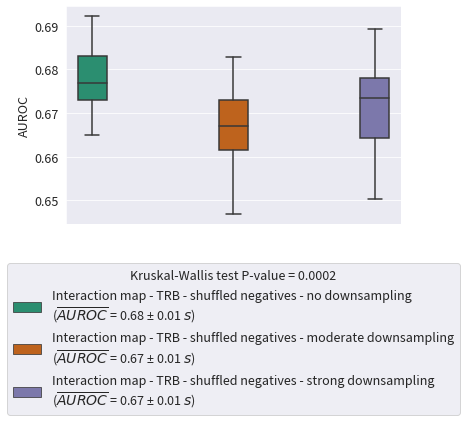

In [117]:
sns_plot = sns.boxplot(
        x="type-mean-std",
        y="auc",
        data=df.sort_values(by=["order"]),
#         order=sorted(df["type-mean-std"].unique()),
        palette=pal,
        hue="type-mean-std",
    )

plt.xlabel(None)
plt.ylabel("AUROC")
sns_plot.set(xticklabels=[])

auroc_lists = [df.loc[df["type"] == i, "auc"] for i in df["type"].unique()]
p = scipy.stats.kruskal(*auroc_lists)[1]

sns_plot.legend(title=f"Kruskal-Wallis test P-value = {round(p,4)}", loc="upper center"1, bbox_to_anchor=(0.5, -0.15))


plt.savefig(PROJECT_ROOT / "reports/figures/trb-5fold-downcomp-shuffle-map-roc-boxplot.pdf", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-5fold-downcomp-shuffle-map-roc-boxplot.png", bbox_inches="tight")

# Position perturbation

## Full model - training example

In [17]:
model_file = PROJECT_ROOT / "/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua/models-full/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001.h5"
samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.98861015
GLFGYPVYV CASRPGLAGGRPEQYF 0.7012986
LGFGYPVYV CASRPGLAGGRPEQYF 0.9648345
LLGGYPVYV CASRPGLAGGRPEQYF 0.74360526
LLFGYPVYV CASRPGLAGGRPEQYF 0.98861015
LLFGGPVYV CASRPGLAGGRPEQYF 0.9011224
LLFGYGVYV CASRPGLAGGRPEQYF 0.98296195
LLFGYPGYV CASRPGLAGGRPEQYF 0.99421644
LLFGYPVGV CASRPGLAGGRPEQYF 0.96960217
LLFGYPVYG CASRPGLAGGRPEQYF 0.98419106
LLFGYPVYV GASRPGLAGGRPEQYF 0.98762393
LLFGYPVYV CGSRPGLAGGRPEQYF 0.9853344
LLFGYPVYV CAGRPGLAGGRPEQYF 0.98511153
LLFGYPVYV CASGPGLAGGRPEQYF 0.95149475
LLFGYPVYV CASRGGLAGGRPEQYF 0.9753092
LLFGYPVYV CASRPGLAGGRPEQYF 0.98861015
LLFGYPVYV CASRPGGAGGRPEQYF 0.94341
LLFGYPVYV CASRPGLGGGRPEQYF 0.9877879
LLFGYPVYV CASRPGLAGGRPEQYF 0.98861015
LLFGYPVYV CASRPGLAGGRPEQYF 0.98861015
LLFGYPVYV CASRPGLAGGGPEQYF 0.9473837
LLFGYPVYV CASRPGLAGGRGEQYF 0.98647225
LLFGYPVYV CASRPGLAGGRPGQYF 0.9641953
LLFGYPVYV CASRPGLAGGRPEGYF 0.9899025
LLFGYPVYV CAS

In [57]:
df_cdr3 = pd.DataFrame({'predictions':  predictions[len("LLFGYPVYV")+1:], 
                        'samples': samples[len("LLFGYPVYV")+1:], 
                        "position": [str(i+1) + " - " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})


In [65]:
df_epitope = pd.DataFrame({'predictions': predictions[1:len("LLFGYPVYV")+1],
                           'samples': samples[1:len("LLFGYPVYV")+1], 
                           "position": [str(i+1) + " - " + str(j) for i,j in enumerate(list("LLFGYPVYV"))]})


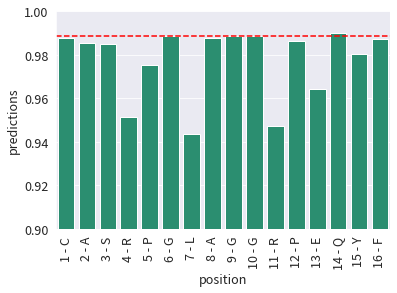

In [59]:
ax = sns.barplot(y="predictions", x="position", data=df_cdr3, color=sns.color_palette("Dark2")[0])
ax.set(ylim=(.9, 1))
# ax.yaxis.set_ticks(np.arange(round(min(predictions)*10*.95)/10, 1, 0.1))
plt.setp(ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax.axhline(predictions[0], ls='--', color="red")

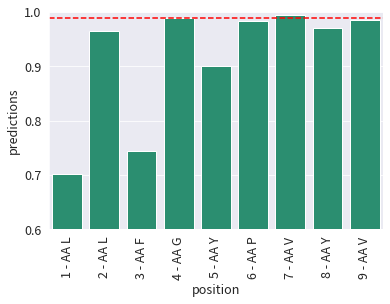

In [63]:
ax = sns.barplot(y="predictions", x="position", data=df_epitope, color=sns.color_palette("Dark2")[0])
ax.set(ylim=(.6, 1))
# ax.yaxis.set_ticks(np.arange(round(min(predictions)*10*.95)/10, 1, 0.1))
plt.setp(ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax.axhline(predictions[0], ls='--', color="red")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


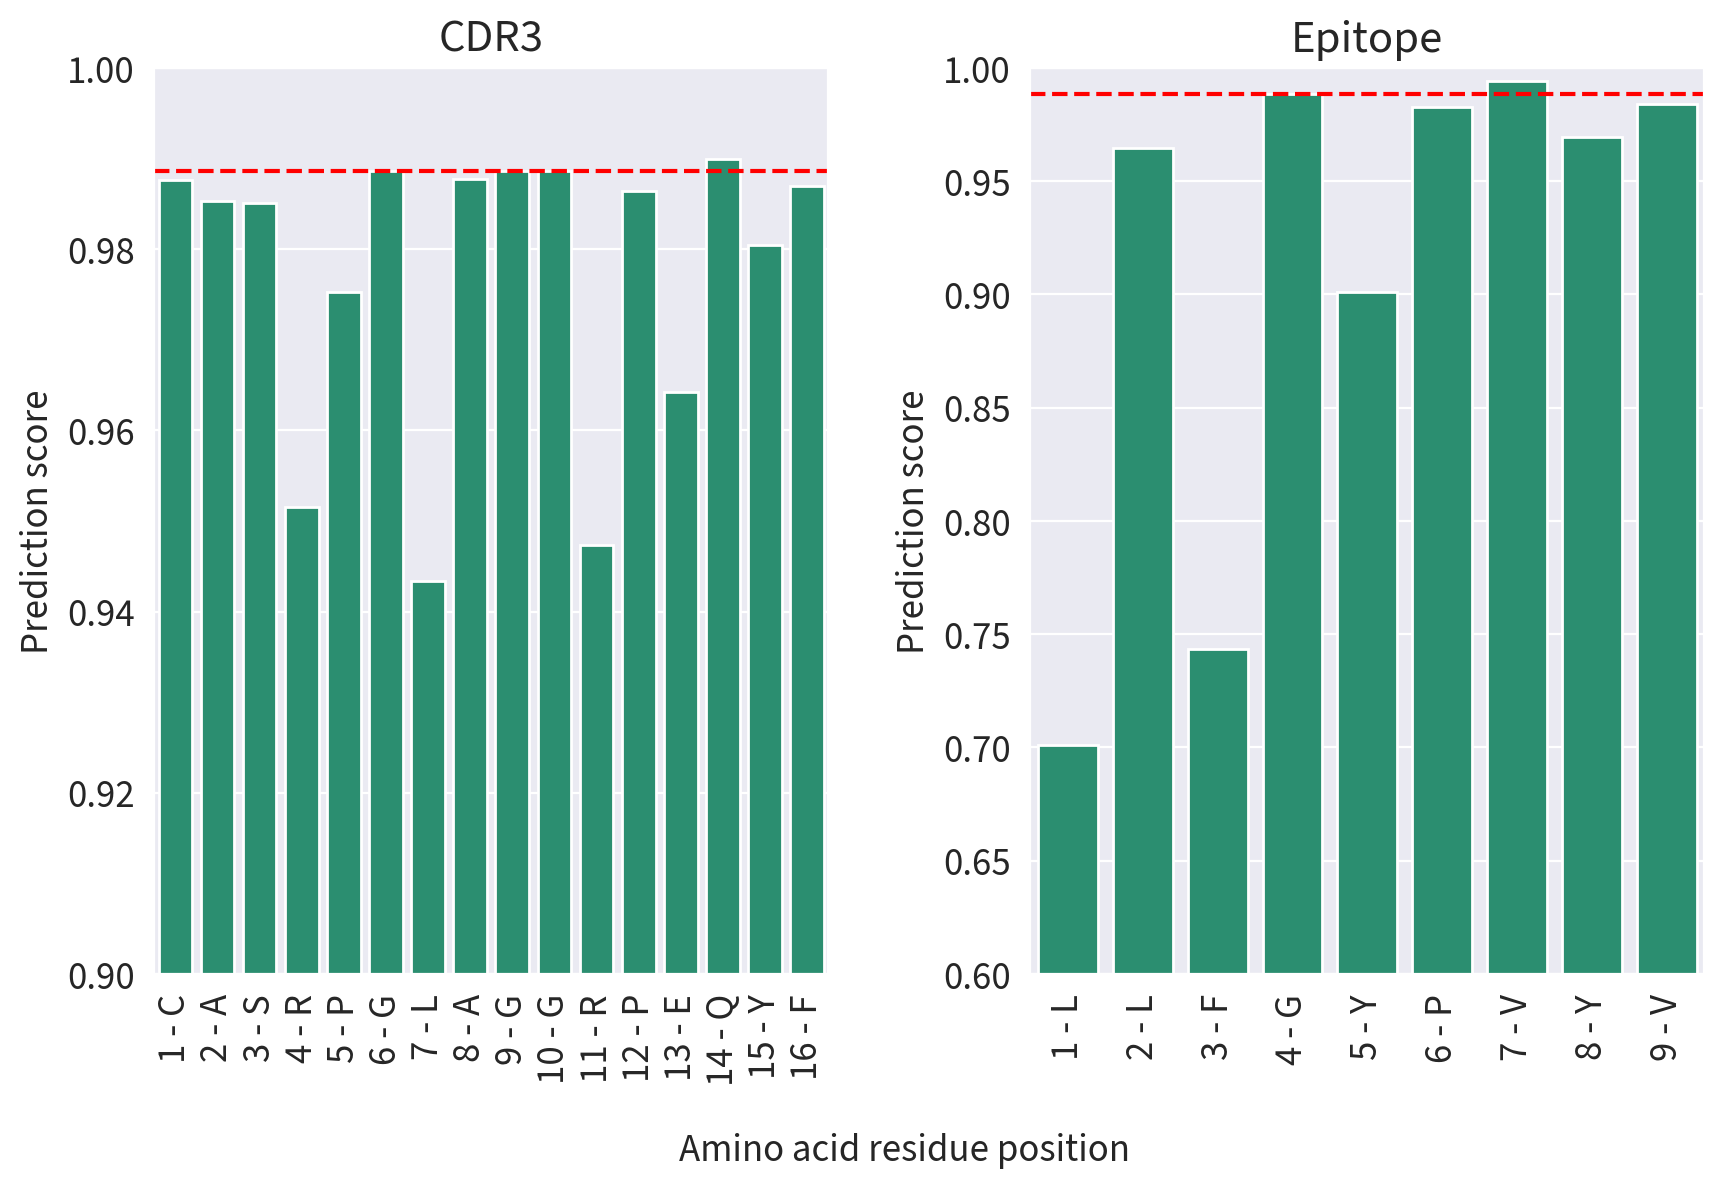

In [104]:
fig, axes = plt.subplots(1,2,sharey=False, sharex=False, figsize=(10, 6), dpi=200)


ax1 = sns.barplot(y="predictions", x="position", data=df_cdr3, color=sns.color_palette("Dark2")[0], ax=axes[0])
ax1.set(ylim=(.9, 1))
plt.setp(ax1.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax1.axhline(predictions[0], ls='--', color="red")

ax2 = sns.barplot(y="predictions", x="position", data=df_epitope, color=sns.color_palette("Dark2")[0], ax=axes[1])
ax2.set(ylim=(.6, 1))
plt.setp(ax2.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax2.axhline(predictions[0], ls='--', color="red")

plt.subplots_adjust(wspace=.3)
# plt.tick_params(labelcolor="none", bottom=False, left=False)
ax1.set_title('CDR3')
ax2.set_title('Epitope')

# ax1.set_xlabel('')
# ax2.set_xlabel('')
plt.setp(axes[:], xlabel="", ylabel="Prediction score")

fig.text(0.5, -0.03, 'Amino acid residue position', ha='center')

plt.savefig(PROJECT_ROOT / "reports/figures/perturbation.pdf", bbox_inches="tight")

In [2]:
model_file = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_4/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.50.h5"
samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
GLFGYPVYV CASRPGLAGGRPEQYF 0.44750583
LGFGYPVYV CASRPGLAGGRPEQYF 0.49353254
LLGGYPVYV CASRPGLAGGRPEQYF 0.49176887
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGGPVYV CASRPGLAGGRPEQYF 0.50342995
LLFGYGVYV CASRPGLAGGRPEQYF 0.51265854
LLFGYPGYV CASRPGLAGGRPEQYF 0.4989922
LLFGYPVGV CASRPGLAGGRPEQYF 0.5082963
LLFGYPVYG CASRPGLAGGRPEQYF 0.52559435
LLFGYPVYV GASRPGLAGGRPEQYF 0.53109086
LLFGYPVYV CGSRPGLAGGRPEQYF 0.5315626
LLFGYPVYV CAGRPGLAGGRPEQYF 0.54058343
LLFGYPVYV CASGPGLAGGRPEQYF 0.5225445
LLFGYPVYV CASRGGLAGGRPEQYF 0.5194867
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGYPVYV CASRPGGAGGRPEQYF 0.5247363
LLFGYPVYV CASRPGLGGGRPEQYF 0.51667297
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGYPVYV CASRPGLAGGGPEQYF 0.50360286
LLFGYPVYV CASRPGLAGGRGEQYF 0.5383662
LLFGYPVYV CASRPGLAGGRPGQYF 0.49150464
LLFGYPVYV CASRPGLAGGRPEGYF 0.48953027
LLFGYPVYV CASRPGLAGGRPE

In [3]:
predictions

array([0.53084   , 0.44750583, 0.49353254, 0.49176887, 0.53084   ,
       0.50342995, 0.51265854, 0.4989922 , 0.5082963 , 0.52559435,
       0.53109086, 0.5315626 , 0.54058343, 0.5225445 , 0.5194867 ,
       0.53084   , 0.5247363 , 0.51667297, 0.53084   , 0.53084   ,
       0.50360286, 0.5383662 , 0.49150464, 0.48953027, 0.5189627 ,
       0.497133  ], dtype=float32)

In [5]:
samples[10:]

[('LLFGYPVYV', 'GASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CGSRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CAGRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASGPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRGGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGGAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLGGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGGPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRGEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPGQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEGYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQGF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYG')]

In [6]:
import seaborn as sns

In [10]:
"GASRPGLAGGRPEQYF".index("G")

0

IndexError: too many indices for array

In [40]:
[str(i) + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]

['0C',
 '1A',
 '2S',
 '3R',
 '4P',
 '5G',
 '6L',
 '7A',
 '8G',
 '9G',
 '10R',
 '11P',
 '12E',
 '13Q',
 '14Y',
 '15F']

In [78]:
df = pd.DataFrame({'predictions': predictions[10:], 'samples': samples[10:], "position": ["position " + str(i+1) + " - " + "AA " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})
# df = df.append({'predictions': predictions[0], 'samples': samples[0], "position": "unchanged"}, ignore_index=True)

In [79]:
#df["position"] = df["samples"].apply(lambda x: x[1].index("G"))

In [80]:
[i for i in range(len("CASRPGLAGGRPEQYF"))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [81]:
df["predictions"]

0     0.531091
1     0.531563
2     0.540583
3     0.522545
4     0.519487
5     0.530840
6     0.524736
7     0.516673
8     0.530840
9     0.530840
10    0.503603
11    0.538366
12    0.491505
13    0.489530
14    0.518963
15    0.497133
Name: predictions, dtype: float32

In [82]:
df["position"]

0      position 1 - AA C
1      position 2 - AA A
2      position 3 - AA S
3      position 4 - AA R
4      position 5 - AA P
5      position 6 - AA G
6      position 7 - AA L
7      position 8 - AA A
8      position 9 - AA G
9     position 10 - AA G
10    position 11 - AA R
11    position 12 - AA P
12    position 13 - AA E
13    position 14 - AA Q
14    position 15 - AA Y
15    position 16 - AA F
Name: position, dtype: object

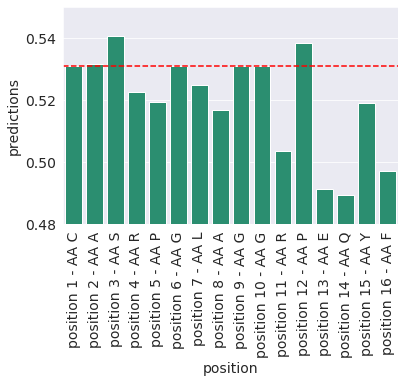

In [83]:
ax = sns.barplot(y="predictions", x="position", data=df, color=sns.color_palette("Dark2")[0])
ax.set(ylim=(0.48, 0.55))
plt.setp(ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax.axhline(predictions[0], ls='--', color="red")

In [104]:
[i for i in enumerate(Path(PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives").glob("**/*epoch30*.h5"))]

[(0,
  PosixPath('/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_0/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.55.h5')),
 (1,
  PosixPath('/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_1/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.57.h5')),
 (2,
  PosixPath('/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_2/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-vala

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
GLFGYPVYV CASRPGLAGGRPEQYF 0.6117452
LGFGYPVYV CASRPGLAGGRPEQYF 0.63502616
LLGGYPVYV CASRPGLAGGRPEQYF 0.6016137
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGGPVYV CASRPGLAGGRPEQYF 0.5796573
LLFGYGVYV CASRPGLAGGRPEQYF 0.6348323
LLFGYPGYV CASRPGLAGGRPEQYF 0.6376696
LLFGYPVGV CASRPGLAGGRPEQYF 0.60104764
LLFGYPVYG CASRPGLAGGRPEQYF 0.6461688
LLFGYPVYV GASRPGLAGGRPEQYF 0.6345018
LLFGYPVYV CGSRPGLAGGRPEQYF 0.6654995
LLFGYPVYV CAGRPGLAGGRPEQYF 0.64449996
LLFGYPVYV CASGPGLAGGRPEQYF 0.61058104
LLFGYPVYV CASRGGLAGGRPEQYF 0.63963634
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGGAGGRPEQYF 0.6223919
LLFGYPVYV CASRPGLGGGRPEQYF 0.64021045
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGGPEQYF 0.55744696
LLFGYPVYV CASRPGLAGGRGEQYF 0.61920875
LLFGYPVYV CASRPGLAGGRPGQYF 0.6098639
LLFGYPVYV CASRPGLAGGRPEGYF 0.64992213
LLFGYPVYV C

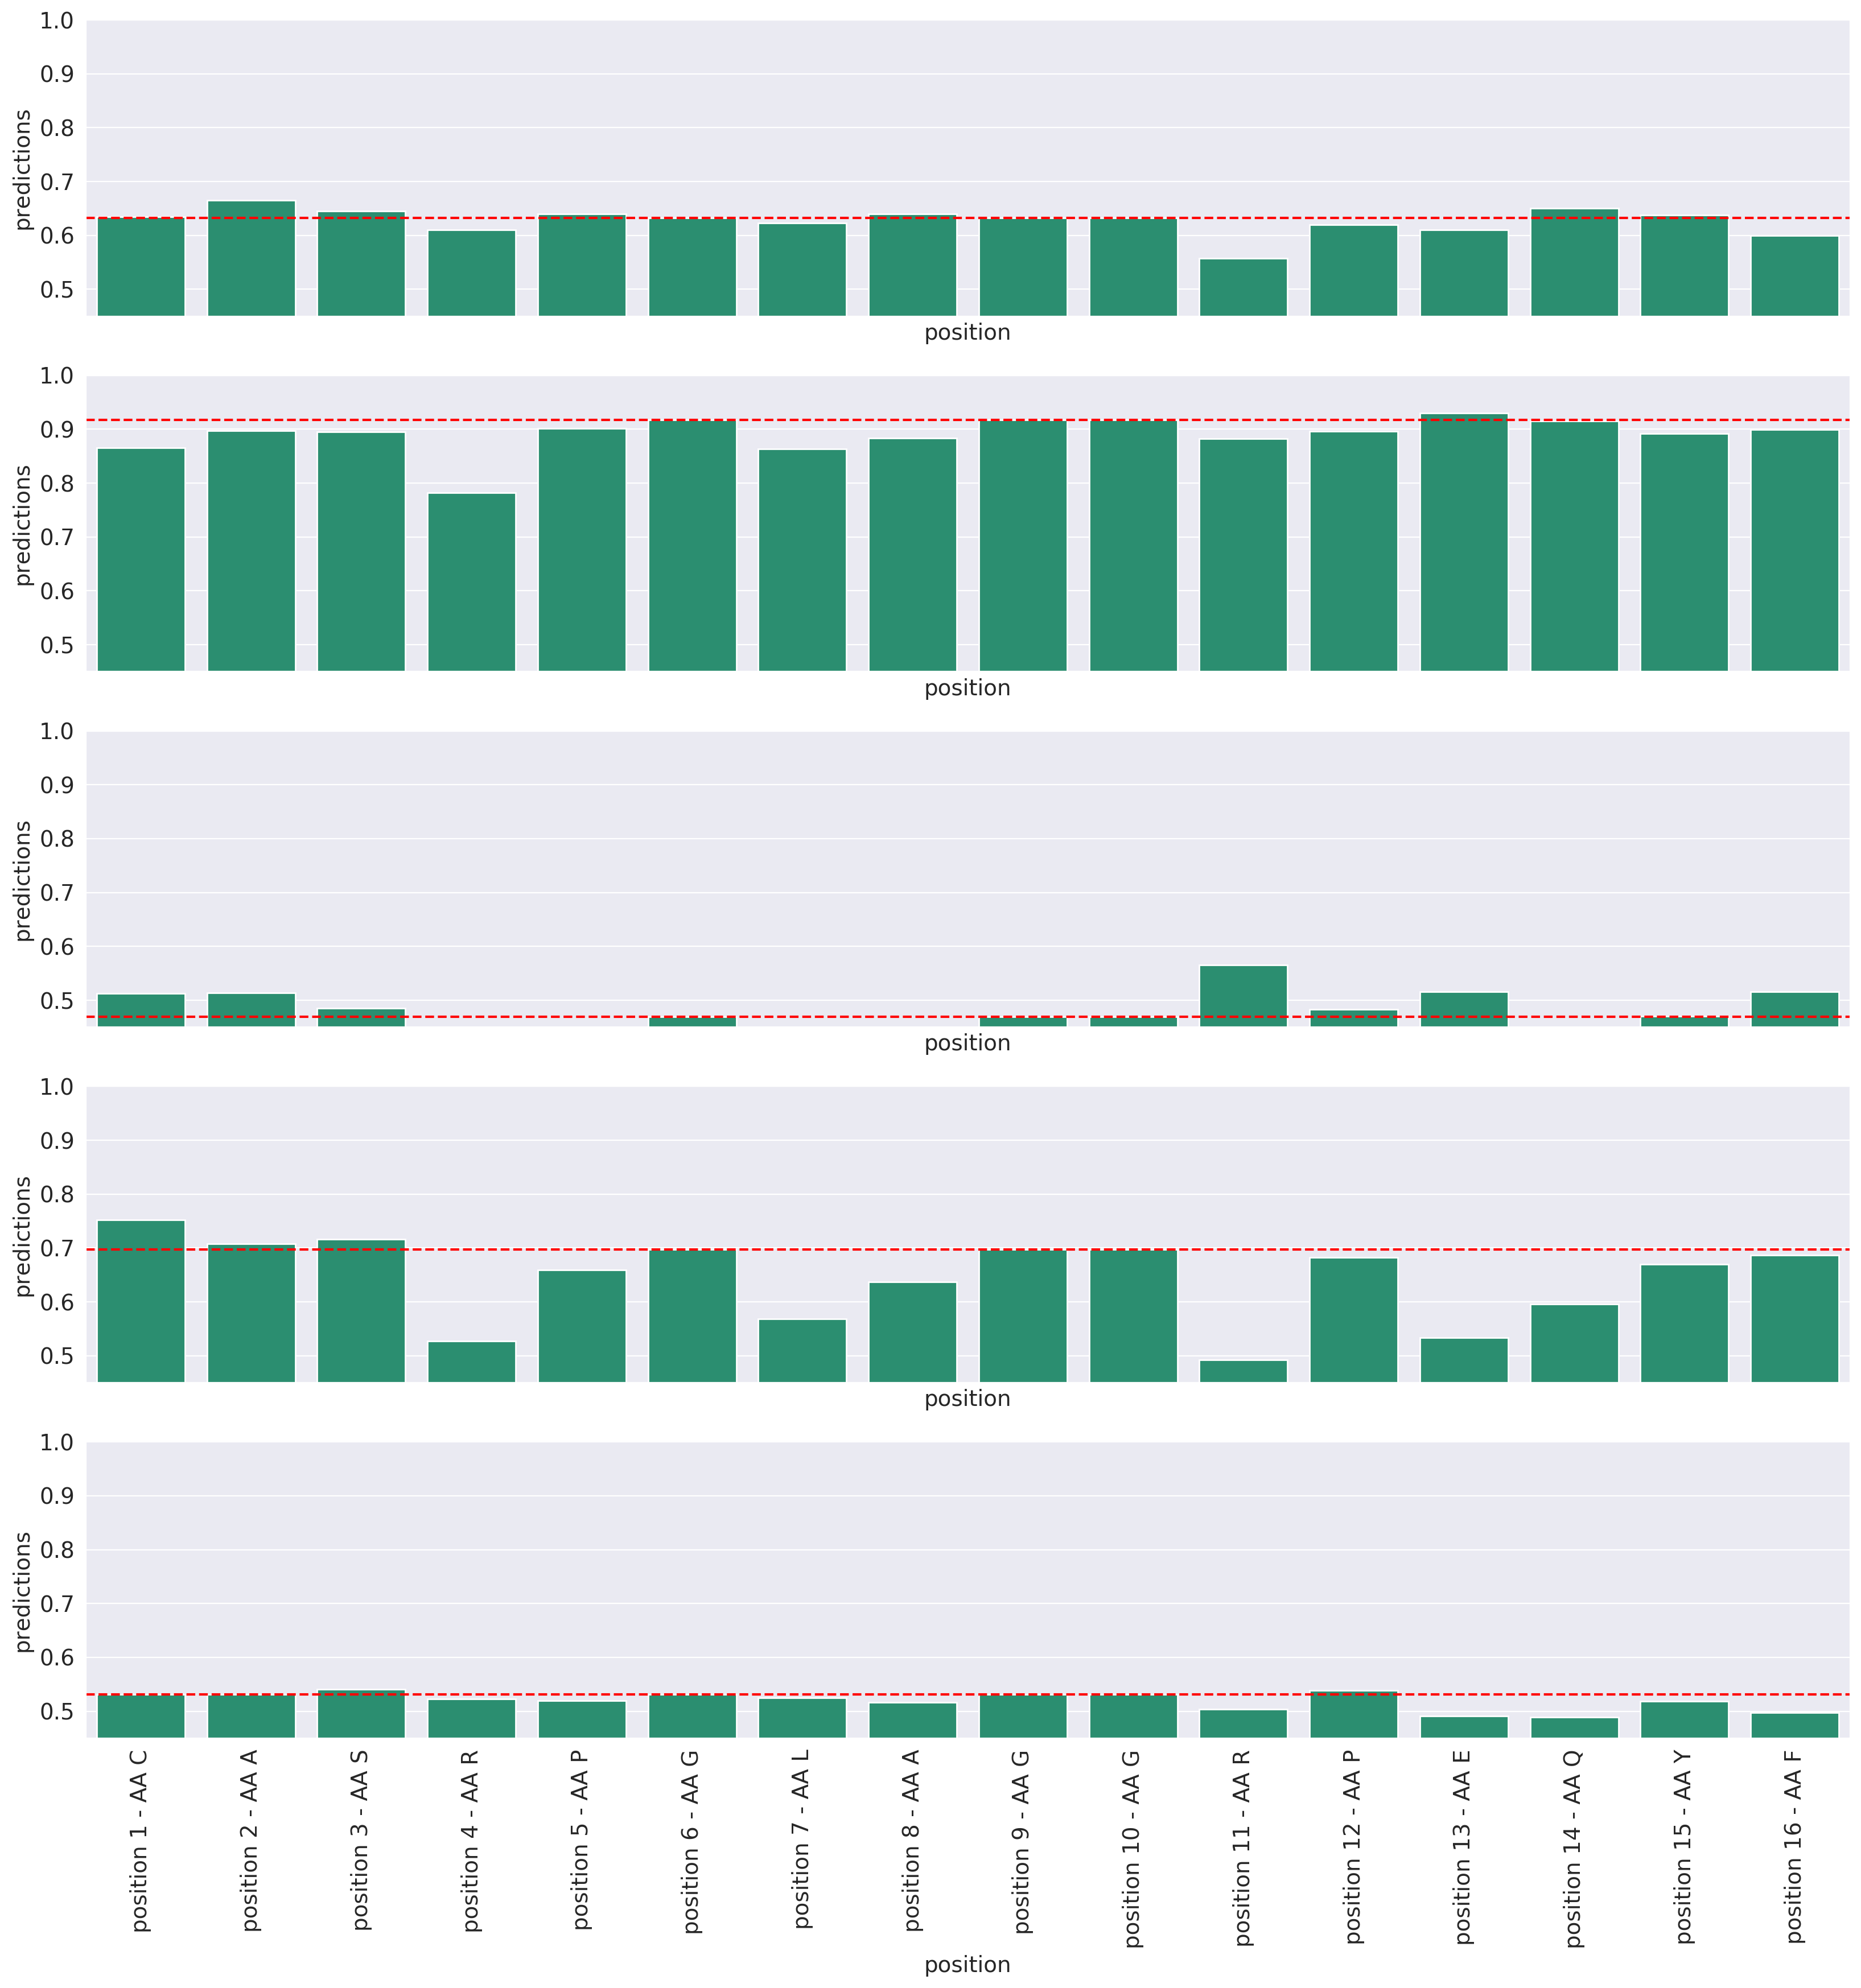

In [106]:
fig, axs = plt.subplots(5, 1, constrained_layout=False, dpi=200, figsize=(20, 20), sharex=True)

for i, model_file in enumerate(Path(PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives").glob("**/*epoch30*.h5")):
    samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")
    df = pd.DataFrame({'predictions': predictions[10:], 'samples': samples[10:], "position": ["position " + str(i+1) + " - " + "AA " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})
    g = sns.barplot(y="predictions", x="position", data=df, color=sns.color_palette("Dark2")[0], ax=axs[i])
    axs[i].set(ylim=(0.45, 1))
#     g.set(xticklabels=[])
#     g.set(xlabel=None)
    axs[i].axhline(predictions[0], ls='--', color="red")
    plt.setp(axs[i].get_xticklabels(), rotation=90, va="top", rotation_mode="default")
plt.show()

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
GLFGYPVYV CASRPGLAGGRPEQYF 0.6117452
LGFGYPVYV CASRPGLAGGRPEQYF 0.63502616
LLGGYPVYV CASRPGLAGGRPEQYF 0.6016137
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGGPVYV CASRPGLAGGRPEQYF 0.5796573
LLFGYGVYV CASRPGLAGGRPEQYF 0.6348323
LLFGYPGYV CASRPGLAGGRPEQYF 0.6376696
LLFGYPVGV CASRPGLAGGRPEQYF 0.60104764
LLFGYPVYG CASRPGLAGGRPEQYF 0.6461688
LLFGYPVYV GASRPGLAGGRPEQYF 0.6345018
LLFGYPVYV CGSRPGLAGGRPEQYF 0.6654995
LLFGYPVYV CAGRPGLAGGRPEQYF 0.64449996
LLFGYPVYV CASGPGLAGGRPEQYF 0.61058104
LLFGYPVYV CASRGGLAGGRPEQYF 0.63963634
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGGAGGRPEQYF 0.6223919
LLFGYPVYV CASRPGLGGGRPEQYF 0.64021045
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGGPEQYF 0.55744696
LLFGYPVYV CASRPGLAGGRGEQYF 0.61920875
LLFGYPVYV CASRPGLAGGRPGQYF 0.6098639
LLFGYPVYV CASRPGLAGGRPEGYF 0.64992213
LLFGYPVYV C

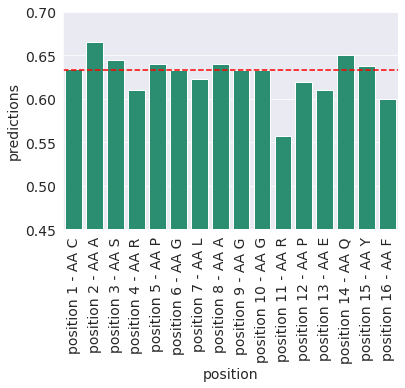

In [85]:
model_file = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_0/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.55.h5"
samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")
df = pd.DataFrame({'predictions': predictions[10:], 'samples': samples[10:], "position": ["position " + str(i+1) + " - " + "AA " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})
ax = sns.barplot(y="predictions", x="position", data=df, color=sns.color_palette("Dark2")[0])
ax.set(ylim=(0.45, 0.70))
plt.setp(ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax.axhline(predictions[0], ls='--', color="red")